In [737]:
import ast
import os
import re
import io
import uuid
import warnings
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway, spearmanr
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate , KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score ,explained_variance_score , mean_absolute_percentage_error
from transformers import BertTokenizer
from functools import reduce
from pickle import TRUE
from collections import Counter
import statistics
from sklearn.linear_model import BayesianRidge
import xgboost as xgb
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
warnings.filterwarnings('ignore')

In [738]:
d1 = pd.read_csv("/content/demos.csv")
d2 = pd.read_csv("/content/dlcs.csv")
d3 = pd.read_csv("/content/info_base_games.csv")
d4 = pd.read_csv("/content/ms2_gamalytic_steam_games.csv")

In [739]:
d1.head()

Unnamed: 0 full_game_appid demo_appid                         name
0           0         2214650    2573370          Rolando Deluxe Demo
1           1         1439980    2573460  Outrunner: Neon Nights Demo
2           2         2412240    2572840     Bubble Ghost Remake Demo
3           3         2448830    2572240           Time Handlers Demo
4           4         2379590    2570800    Hope's Final Defense Demo

In [740]:
d2.head()

base_appid dlc_appid                                             name
0    1786750   2568660                    家出王女 - 全年齢版ストーリー&グラフィック追加 DLC
1    1981700   2563730                           Jacob's Quest - Voyage
2    2009450   2552980  Invector: Rhythm Galaxy - Latin Power Song Pack
3    1133420   2550750         Hero or Villain: Genesis — Supercharged!
4    2533950   2551000            Hot And Lovely ：Uniform - adult patch

In [741]:
d3.head()

appid                      name metacritic  steam_achievements  \
0  2574000            Femboy Burgers        NaN                True   
1  2574120  PPA Pickleball Tour 2025        NaN                True   
2  2573200             Squeaky Squad        NaN                True   
3  2573440             Paradox Metal        NaN                True   
4  2569520    Naturpark Lillebælt VR        NaN                True   

   steam_trading_cards  workshop_support                     genres  \
0                 True              True              Casual, Indie   
1                 True              True  Indie, Simulation, Sports   
2                 True              True   Action, Adventure, Indie   
3                 True              True       Action, Early Access   
4                 True              True          Action, Adventure   

  achievements_total  release_date          supported_platforms  
0                NaN   Oct 9, 2023  ['windows', 'mac', 'linux']  
1                 18  Jul 16, 2024  ['windows', 'mac', 'linux']  
2                 27  Mar 29, 2024  ['windows', 'mac', 'linux']  
3                NaN   Coming soon  ['windows', 'mac', 'linux']  
4                NaN  Sep 18, 2023  ['windows', 'mac', 'linux']

In [742]:
d4.head()

steamId  price copiesSold publisherClass  reviewScore  aiContent
0      730    0.0   Platinum            AAA           87        NaN
1      570    0.0   Platinum            AAA           82        NaN
2   578080    0.0   Platinum            AAA           59        NaN
3      440    0.0   Platinum            AAA           90        NaN
4  1172470    0.0   Platinum            AAA           67        NaN

In [743]:
d1.dtypes

Unnamed: 0          int64
full_game_appid    object
demo_appid         object
name               object
dtype: object

In [744]:
d2.dtypes

base_appid    object
dlc_appid     object
name          object
dtype: object

In [745]:
d3.dtypes

appid                  object
name                   object
metacritic             object
steam_achievements       bool
steam_trading_cards      bool
workshop_support         bool
genres                 object
achievements_total     object
release_date           object
supported_platforms    object
dtype: object

In [746]:
d4.dtypes

steamId             int64
price             float64
copiesSold         object
publisherClass     object
reviewScore         int64
aiContent         float64
dtype: object

In [747]:
d1.describe()

Unnamed: 0
count  15449.000000
mean    7728.131594
std     4463.182468
min        0.000000
25%     3864.000000
50%     7727.000000
75%    11591.000000
max    15462.000000

In [748]:
d2.describe()

base_appid dlc_appid                                     name
count        5445      5445                                     5445
unique       5445      5445                                     5443
top       3064420   3491510  Dungeon Full Dive - True Supporter Dice
freq            1         1                                        2

In [749]:
d3.describe()

appid      name metacritic steam_achievements steam_trading_cards  \
count     99167     99149       3019              99167               99167   
unique    99166     95004        170                  2                   2   
top     1811260  Delirium         80              False               False   
freq          2         5         81              50128               82285   

       workshop_support                    genres achievements_total  \
count             99167                     94389              38115   
unique                2                      2699                695   
top               False  Action, Adventure, Indie                 10   
freq              86138                      4971                937   

       release_date supported_platforms  
count         98861               99167  
unique         4788                   7  
top     Coming soon         ['windows']  
freq          12109               69850

In [750]:
d4.describe()

steamId         price   reviewScore  aiContent
count  9.333800e+04  93338.000000  93338.000000        0.0
mean   1.681656e+06      7.958794     71.915768        NaN
std    9.105393e+05     16.010048     28.273871        NaN
min    1.000000e+01      0.000000      0.000000        NaN
25%    9.102975e+05      1.990000     60.000000        NaN
50%    1.605920e+06      4.990000     80.000000        NaN
75%    2.414232e+06      9.990000     93.000000        NaN
max    3.596260e+06   1900.000000    100.000000        NaN

# Drop Columns That Has Large Value From Missing Values greater Than 80%

In [751]:
threshold = 80

In [752]:
# fisrt csv file
for column in d1.columns:
    null_percentage = (d1[column].isnull().sum() / len(d1)) * 100
    print(f"Column {column}: {null_percentage:.2f}% null values")

    if null_percentage > threshold:
        d1 = d1.drop(column, axis=1)
        print(f"Dropped column {column} (exceeded {threshold}% null values)")

Column Unnamed: 0: 0.00% null values
Column full_game_appid: 0.00% null values
Column demo_appid: 0.00% null values
Column name: 0.01% null values


In [753]:
# second csv file
for column in d2.columns:
    null_percentage = (d2[column].isnull().sum() / len(d2)) * 100
    print(f"Column {column}: {null_percentage:.2f}% null values")

    if null_percentage > threshold:
        d2 = d2.drop(column, axis=1)
        print(f"Dropped column {column} (exceeded {threshold}% null values)")

Column base_appid: 0.00% null values
Column dlc_appid: 0.00% null values
Column name: 0.00% null values


In [754]:
# third csv file
for column in d3.columns:
    null_percentage = (d3[column].isnull().sum() / len(d3)) * 100
    print(f"Column {column}: {null_percentage:.2f}% null values")

    if null_percentage > threshold:
        d3 = d3.drop(column, axis=1)
        print(f"Dropped column {column} (exceeded {threshold}% null values)")

Column appid: 0.00% null values
Column name: 0.02% null values
Column metacritic: 96.96% null values
Dropped column metacritic (exceeded 80% null values)
Column steam_achievements: 0.00% null values
Column steam_trading_cards: 0.00% null values
Column workshop_support: 0.00% null values
Column genres: 4.82% null values
Column achievements_total: 61.56% null values
Column release_date: 0.31% null values
Column supported_platforms: 0.00% null values


In [755]:
# fourth csv file
for column in d4.columns:
    null_percentage = (d4[column].isnull().sum() / len(d4)) * 100
    print(f"Column {column}: {null_percentage:.2f}% null values")

    if null_percentage > threshold:
        d4 = d4.drop(column, axis=1)
        print(f"Dropped column {column} (exceeded {threshold}% null values)")

Column steamId: 0.00% null values
Column price: 0.00% null values
Column copiesSold: 0.00% null values
Column publisherClass: 0.00% null values
Column reviewScore: 0.00% null values
Column aiContent: 100.00% null values
Dropped column aiContent (exceeded 80% null values)


# Drop unnecessary Columns

In [756]:
d1.drop(['demo_appid'] , axis = 1 , inplace = True)
d2.drop(['dlc_appid'] , axis = 1 , inplace = True)
d1.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

# Merge the 4 CSV files in One File

In [757]:
output_file = "/content/merged_output.csv"

d1 = d1.rename(columns={"full_game_appid": "ID"})
d2 = d2.rename(columns={"base_appid": "ID"})
d3 = d3.rename(columns={"appid": "ID"})
d4 = d4.rename(columns={"steamId": "ID"})

d1['ID'] = d1['ID'].astype(str)
d2['ID'] = d2['ID'].astype(str)
d3['ID'] = d3['ID'].astype(str)
d4['ID'] = d4['ID'].astype(str)


if not all('ID' in df.columns for df in [d1, d2, d3, d4]):
    raise ValueError("One or more files are missing the 'ID' column after renaming")


print("ID dtypes:", d1['ID'].dtype, d2['ID'].dtype, d3['ID'].dtype, d4['ID'].dtype)


merged_df = d4.merge(d1, on='ID', how='outer', suffixes=('_d4', '_d1'))
merged_df = merged_df.merge(d2, on='ID', how='outer', suffixes=('_prev', '_d2'))
merged_df = merged_df.merge(d3, on='ID', how='outer', suffixes=('_prev', '_d3'))


print("Rows in merged_df:", len(merged_df))
print("Columns in merged_df:", merged_df.columns)


os.makedirs(os.path.dirname(output_file), exist_ok=True)
print("Saving to:", output_file)

merged_df.to_csv(output_file, index=False)
print(f"Successfully merged files into {output_file}")
print("File exists after save:", os.path.exists(output_file))

ID dtypes: object object object object
Rows in merged_df: 126589
Columns in merged_df: Index(['ID', 'price', 'copiesSold', 'publisherClass', 'reviewScore',
       'name_prev', 'name_d2', 'name', 'steam_achievements',
       'steam_trading_cards', 'workshop_support', 'genres',
       'achievements_total', 'release_date', 'supported_platforms'],
      dtype='object')
Saving to: /content/merged_output.csv
Successfully merged files into /content/merged_output.csv
File exists after save: True


# Read Merged Data

In [758]:
df = pd.read_csv("/content/merged_output.csv")

In [759]:
df.head()

ID  price copiesSold publisherClass  reviewScore       name_prev  \
0       10   9.99   Platinum            AAA         97.0             NaN   
1  1000000   9.99     Silver          Indie         82.0  ASCENXION DEMO   
2  1000010  19.99   Platinum             AA         86.0             NaN   
3  1000020    NaN        NaN            NaN          NaN             NaN   
4  1000030  19.99   Platinum          Indie         91.0             NaN   

                             name_d2                         name  \
0                                NaN               Counter-Strike   
1                                NaN                    ASCENXION   
2  Crown Trick - Requiem of Elements                  Crown Trick   
3                                NaN             Organ Corruption   
4                                NaN  Cook, Serve, Delicious! 3?!   

  steam_achievements steam_trading_cards workshop_support  \
0              False               False            False   
1               True               False            False   
2               True                True            False   
3               True               False            False   
4               True                True            False   

                                genres achievements_total  release_date  \
0                               Action                NaN   Nov 1, 2000   
1             Action, Adventure, Indie               34.0  May 14, 2021   
2      Adventure, Indie, RPG, Strategy               48.0  Oct 16, 2020   
3            Action, Indie, Simulation                NaN   Coming soon   
4  Action, Indie, Simulation, Strategy               57.0  Oct 14, 2020   

           supported_platforms  
0  ['windows', 'mac', 'linux']  
1                  ['windows']  
2                  ['windows']  
3                  ['windows']  
4           ['windows', 'mac']

In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126589 entries, 0 to 126588
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   126589 non-null  object 
 1   price                94857 non-null   float64
 2   copiesSold           94857 non-null   object 
 3   publisherClass       94857 non-null   object 
 4   reviewScore          94857 non-null   float64
 5   name_prev            15928 non-null   object 
 6   name_d2              5474 non-null    object 
 7   name                 99149 non-null   object 
 8   steam_achievements   99167 non-null   object 
 9   steam_trading_cards  99167 non-null   object 
 10  workshop_support     99167 non-null   object 
 11  genres               94389 non-null   object 
 12  achievements_total   38115 non-null   object 
 13  release_date         98861 non-null   object 
 14  supported_platforms  99167 non-null   object 
dtypes: float64(2), ob

In [761]:
df.describe()

price   reviewScore
count  94857.000000  94857.000000
mean       7.935873     71.837271
std       16.001967     28.475016
min        0.000000      0.000000
25%        1.890000     60.000000
50%        4.990000     80.000000
75%        9.990000     93.000000
max     1900.000000    100.000000

# Check if there no duplicates

In [762]:
if df['ID'].duplicated().any():
    print(f" {df['ID'].duplicated().sum()} duplicate IDs found in merged DataFrame.")

 3443 duplicate IDs found in merged DataFrame.


# Drop The Duplicates

In [763]:
df = df.drop_duplicates(subset='ID', keep='first')

In [764]:
if df['ID'].duplicated().any():
    print(f" {df['ID'].duplicated().sum()} duplicate IDs found in merged DataFrame.")

# Drop unnecessary Columns From Merged file

In [765]:
df = df.drop(['ID', 'name'], axis=1)

# Drop The Columns That Has Large Percentage of Nulls

In [766]:
for column in df.columns:
    null_percentage = (df[column].isnull().sum() / len(df)) * 100
    print(f"Column {column}: {null_percentage:.2f}% null values")

    if null_percentage > threshold:
        df = df.drop(column, axis=1)
        print(f"Dropped column {column} (exceeded {threshold}% null values)")

Column price: 24.21% null values
Column copiesSold: 24.21% null values
Column publisherClass: 24.21% null values
Column reviewScore: 24.21% null values
Column name_prev: 87.46% null values
Dropped column name_prev (exceeded 80% null values)
Column name_d2: 95.58% null values
Dropped column name_d2 (exceeded 80% null values)
Column steam_achievements: 22.27% null values
Column steam_trading_cards: 22.27% null values
Column workshop_support: 22.27% null values
Column genres: 25.91% null values
Column achievements_total: 69.58% null values
Column release_date: 22.51% null values
Column supported_platforms: 22.27% null values


In [767]:
df.head()

price copiesSold publisherClass  reviewScore steam_achievements  \
0   9.99   Platinum            AAA         97.0              False   
1   9.99     Silver          Indie         82.0               True   
2  19.99   Platinum             AA         86.0               True   
3    NaN        NaN            NaN          NaN               True   
4  19.99   Platinum          Indie         91.0               True   

  steam_trading_cards workshop_support                               genres  \
0               False            False                               Action   
1               False            False             Action, Adventure, Indie   
2                True            False      Adventure, Indie, RPG, Strategy   
3               False            False            Action, Indie, Simulation   
4                True            False  Action, Indie, Simulation, Strategy   

  achievements_total  release_date          supported_platforms  
0                NaN   Nov 1, 2000  ['windows', 'mac', 'linux']  
1               34.0  May 14, 2021                  ['windows']  
2               48.0  Oct 16, 2020                  ['windows']  
3                NaN   Coming soon                  ['windows']  
4               57.0  Oct 14, 2020           ['windows', 'mac']

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123146 entries, 0 to 126588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                93338 non-null  float64
 1   copiesSold           93338 non-null  object 
 2   publisherClass       93338 non-null  object 
 3   reviewScore          93338 non-null  float64
 4   steam_achievements   95724 non-null  object 
 5   steam_trading_cards  95724 non-null  object 
 6   workshop_support     95724 non-null  object 
 7   genres               91245 non-null  object 
 8   achievements_total   37460 non-null  object 
 9   release_date         95421 non-null  object 
 10  supported_platforms  95724 non-null  object 
dtypes: float64(2), object(9)
memory usage: 11.3+ MB


In [769]:
df.describe()

price   reviewScore
count  93338.000000  93338.000000
mean       7.958794     71.915768
std       16.010048     28.273871
min        0.000000      0.000000
25%        1.990000     60.000000
50%        4.990000     80.000000
75%        9.990000     93.000000
max     1900.000000    100.000000

In [770]:
df.dtypes

price                  float64
copiesSold              object
publisherClass          object
reviewScore            float64
steam_achievements      object
steam_trading_cards     object
workshop_support        object
genres                  object
achievements_total      object
release_date            object
supported_platforms     object
dtype: object

# Droping records which contains value with the same name of the column name

# Collect These Columns

In [771]:
def find_columns_with_matching_values(df):
    matching_columns = []
    for column in df.columns:
        if any(df[column].astype(str) == str(column)):
            matching_columns.append(column)

    return matching_columns

train_matching_columns = find_columns_with_matching_values(df)
train_matching_columns

['genres', 'achievements_total', 'release_date']

In [772]:
for column in train_matching_columns:
    df.loc[df[column].astype(str) == str(column), column] = np.nan

Validate The Step

In [773]:
def find_columns_with_matching_values(df):
    matching_columns = []
    for column in df.columns:
        if any(df[column].astype(str) == str(column)):
            matching_columns.append(column)

    return matching_columns
train_matching_columns = find_columns_with_matching_values(df)
train_matching_columns

[]

# Split Data To Train and Test

In [774]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Read splited Data

In [775]:
train = pd.read_csv("/content/train_data.csv")
test  = pd.read_csv("/content/test_data.csv")

In [776]:
train.head()

price copiesSold publisherClass  reviewScore steam_achievements  \
0   1.99     Bronze       Hobbyist         38.0              False   
1   4.99     Bronze       Hobbyist        100.0               True   
2    NaN        NaN            NaN          NaN                NaN   
3  14.99     Bronze       Hobbyist        100.0               True   
4    NaN        NaN            NaN          NaN               True   

  steam_trading_cards workshop_support                             genres  \
0               False            False                      Casual, Indie   
1               False            False  Action, Casual, Indie, Simulation   
2                 NaN              NaN                                NaN   
3               False            False                              Indie   
4               False            False                 Action, Indie, RPG   

   achievements_total  release_date   supported_platforms  
0                 NaN  Jun 12, 2018           ['windows']  
1                10.0  May 17, 2024           ['windows']  
2                 NaN           NaN                   NaN  
3                 7.0   Apr 2, 2021           ['windows']  
4                 NaN   Coming soon  ['windows', 'linux']

# Drop Columns That has Large Number Of Missing Values In Train and Test

In [777]:
for column in train.columns:
    null_percentage = (train[column].isnull().sum() / len(train)) * 100
    print(f"Column {column}: {null_percentage:.2f}% null values")

    if null_percentage > threshold:
        train = train.drop(column, axis=1)
        print(f"Dropped column {column} (exceeded {threshold}% null values)")

Column price: 24.37% null values
Column copiesSold: 24.37% null values
Column publisherClass: 24.37% null values
Column reviewScore: 24.37% null values
Column steam_achievements: 22.24% null values
Column steam_trading_cards: 22.24% null values
Column workshop_support: 22.24% null values
Column genres: 25.90% null values
Column achievements_total: 69.56% null values
Column release_date: 22.49% null values
Column supported_platforms: 22.24% null values


In [778]:
for column in test.columns:
    tenull_percentage = (test[column].isnull().sum() / len(test)) * 100
    print(f"Column {column}: {tenull_percentage:.2f}% null values")

    if tenull_percentage > threshold:
        test = test.drop(column, axis=1)
        print(f"Dropped column {column} (exceeded {threshold}% null values)")

Column price: 23.53% null values
Column copiesSold: 23.53% null values
Column publisherClass: 23.53% null values
Column reviewScore: 23.53% null values
Column steam_achievements: 22.38% null values
Column steam_trading_cards: 22.38% null values
Column workshop_support: 22.38% null values
Column genres: 25.94% null values
Column achievements_total: 69.68% null values
Column release_date: 22.62% null values
Column supported_platforms: 22.38% null values


# Collect The Original Numerical Columns

In [779]:
train_numerical_columns = train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
print(train_numerical_columns)

test_numerical_columns = test.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
print(test_numerical_columns)

['price', 'reviewScore', 'achievements_total']
['price', 'reviewScore', 'achievements_total']


# Make Visualization For The Numerical Data

##For Train Data

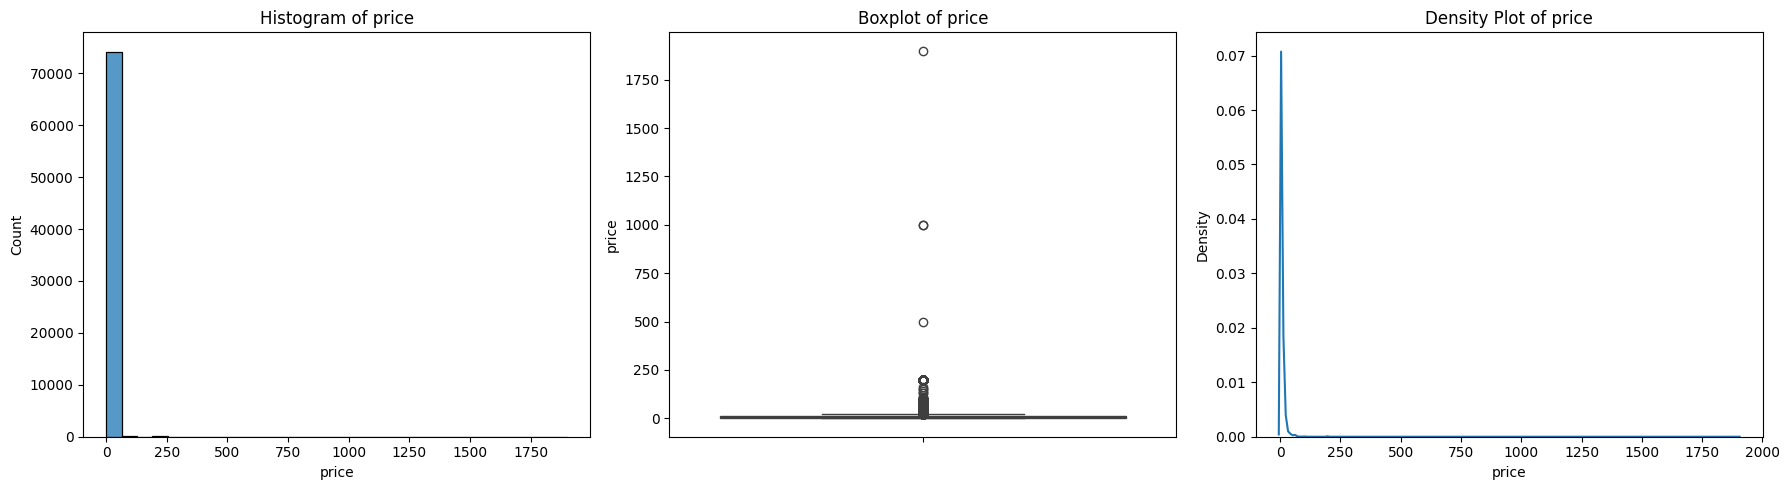

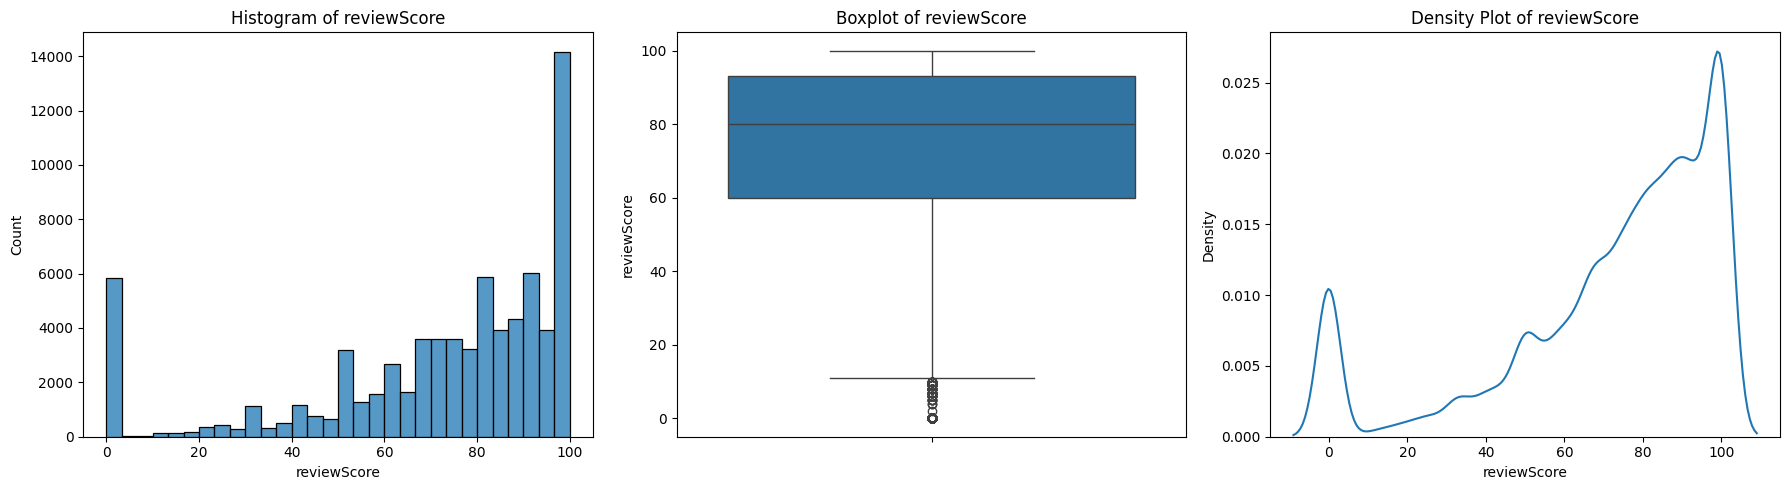

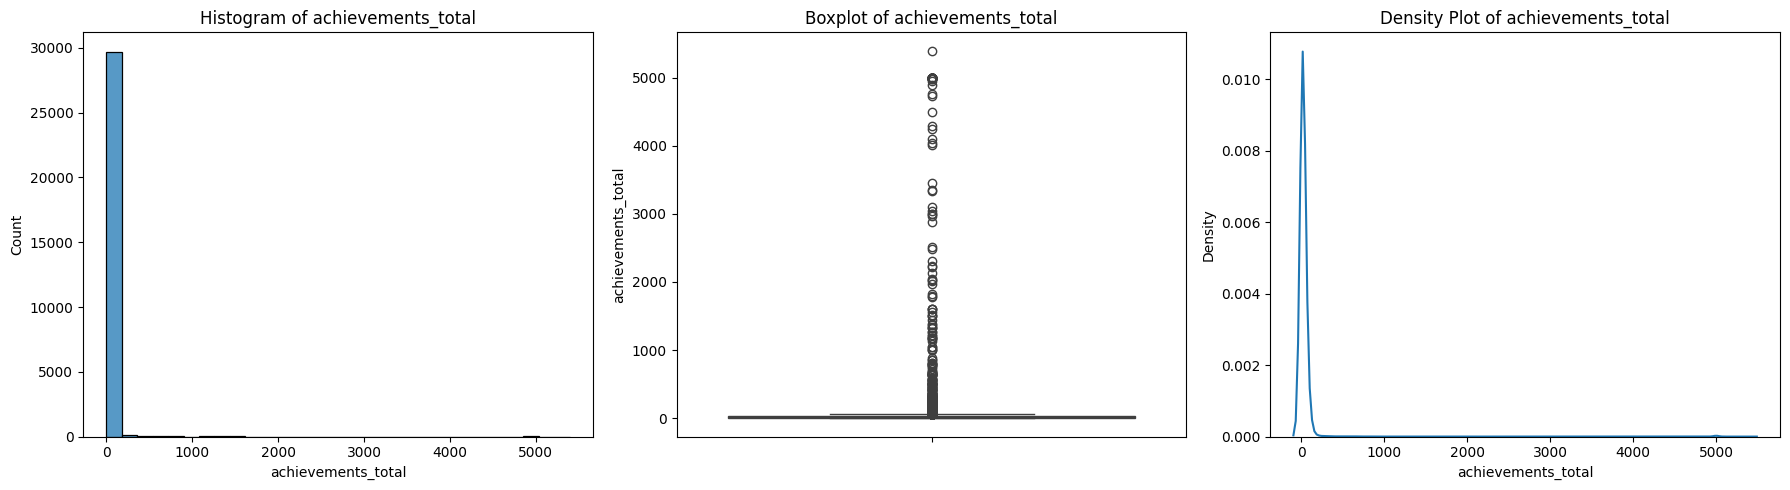

In [780]:
for col in train_numerical_columns:
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

  sns.histplot(train[col].dropna(), bins=30, ax=ax1)
  ax1.set_title(f"Histogram of {col}")
  ax1.set_xlabel(col)
  ax1.set_ylabel("Count")

  sns.boxplot(y=train[col], ax=ax2)
  ax2.set_title(f"Boxplot of {col}")
  ax2.set_ylabel(col)

  sns.kdeplot(train[col].dropna(), ax=ax3)
  ax3.set_title(f"Density Plot of {col}")
  ax3.set_xlabel(col)
  ax3.set_ylabel("Density")

  plt.tight_layout()
  plt.show()

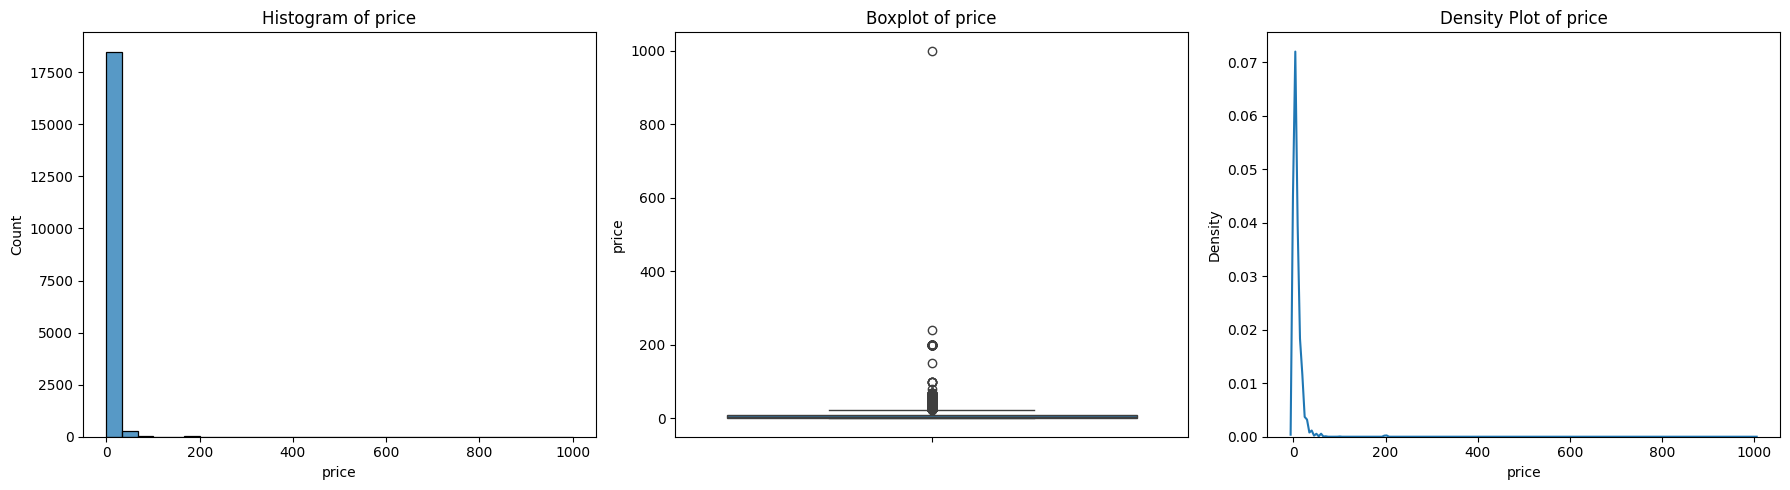

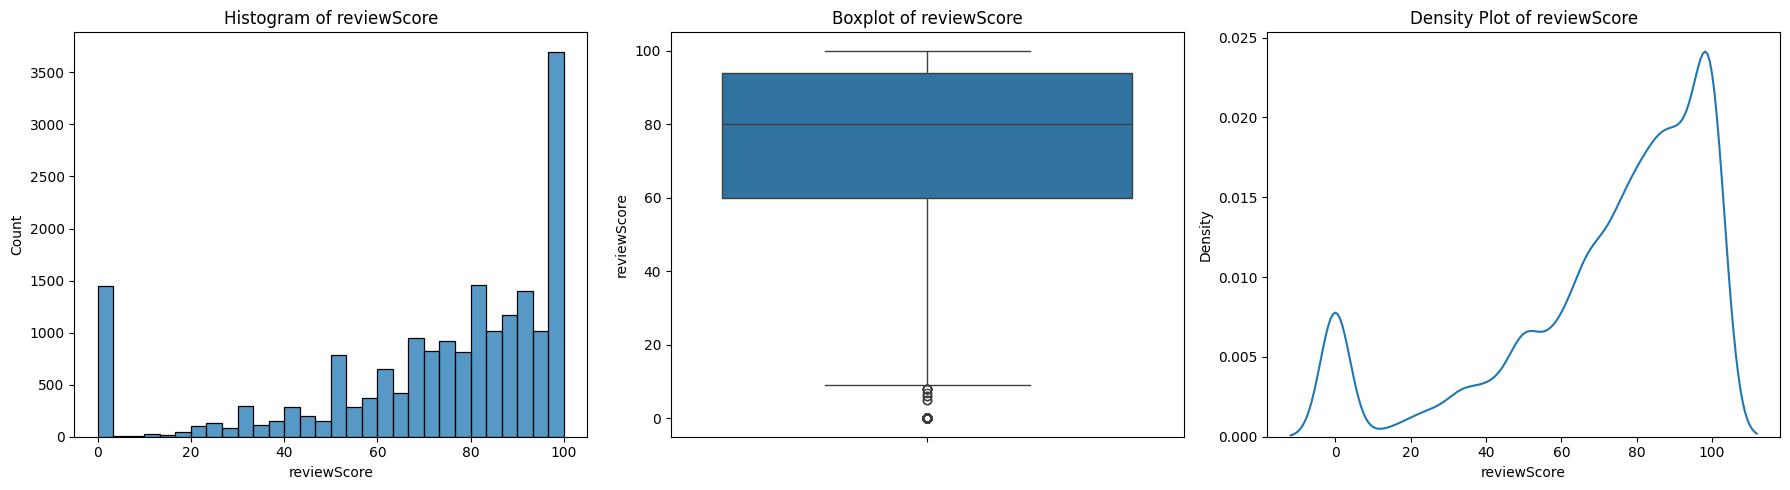

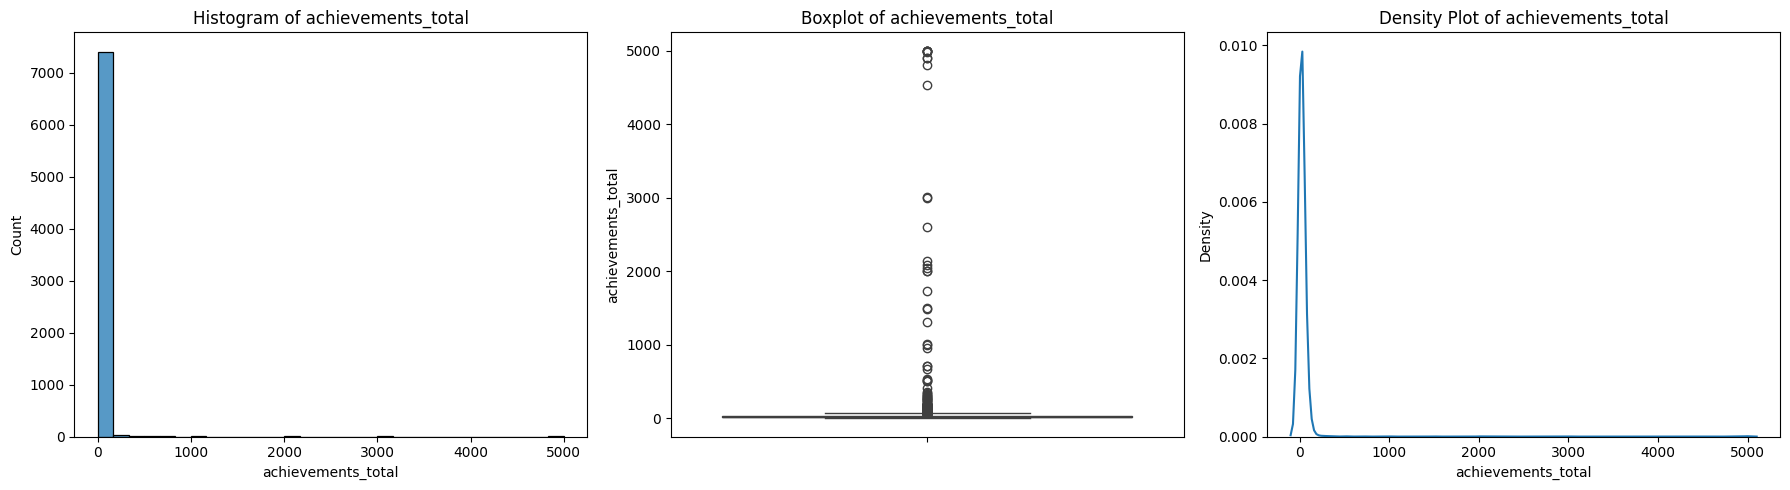

In [781]:
for col in test_numerical_columns:
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

  sns.histplot(test[col].dropna(), bins=30, ax=ax1)
  ax1.set_title(f"Histogram of {col}")
  ax1.set_xlabel(col)
  ax1.set_ylabel("Count")
  sns.boxplot(y=test[col], ax=ax2)
  ax2.set_title(f"Boxplot of {col}")
  ax2.set_ylabel(col)
  sns.kdeplot(test[col].dropna(), ax=ax3)
  ax3.set_title(f"Density Plot of {col}")
  ax3.set_xlabel(col)
  ax3.set_ylabel("Density")

  plt.tight_layout()
  plt.show()

# Handel With Numerical data

## Display The Percentage Of Nulls

In [782]:
for column in train_numerical_columns :
    tranull_percentage = (train[column].isnull().sum() / len(train)) * 100
    print(f"Column {column}: {tranull_percentage:.2f}% null values")

Column price: 24.37% null values
Column reviewScore: 24.37% null values
Column achievements_total: 69.56% null values


In [783]:
for column in test_numerical_columns:
    tesnull_percentage = (test[column].isnull().sum() / len(test)) * 100
    print(f"Column {column}: {tesnull_percentage:.2f}% null values")

Column price: 23.53% null values
Column reviewScore: 23.53% null values
Column achievements_total: 69.68% null values


# Replace The Missing Values with Median | Mean According To The skewness

In [784]:
skew_threshold = 0.5

In [785]:
for col in train_numerical_columns:
  if col in train.columns:
    if train[col].skew() > skew_threshold:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(train[col].median(), inplace=True)
    else:
        train[col].fillna(train[col].mean(), inplace=True)
        test[col].fillna(train[col].mean(), inplace=True)
  else:
    print(f"Warning: Column {col} not found in DataFrame")

# Validate This Step

In [786]:
for column in train_numerical_columns :
    tranull_percentage = (train[column].isnull().sum() / len(train)) * 100
    print(f"Column {column}: {tranull_percentage:.2f}% null values")

Column price: 0.00% null values
Column reviewScore: 0.00% null values
Column achievements_total: 0.00% null values


In [787]:
for column in test_numerical_columns:
    tesnull_percentage = (test[column].isnull().sum() / len(test)) * 100
    print(f"Column {column}: {tesnull_percentage:.2f}% null values")

Column price: 0.00% null values
Column reviewScore: 0.00% null values
Column achievements_total: 0.00% null values


# Make Statistical Analysis After Handle With Numerical

In [788]:
train.describe()

price   reviewScore  achievements_total
count  98516.000000  98516.000000        98516.000000
mean       7.272078     71.879094           24.794622
std       14.248595     24.584976          136.801220
min        0.000000      0.000000            0.000000
25%        2.990000     68.000000           18.000000
50%        4.990000     71.879094           18.000000
75%        7.990000     89.000000           18.000000
max     1900.000000    100.000000         5394.000000

In [789]:
test.describe()

price   reviewScore  achievements_total
count  24630.000000  24630.000000        24630.000000
mean       7.112619     72.018077           23.538043
std       12.937165     24.736059          111.147184
min        0.000000      0.000000            0.000000
25%        1.990000     67.000000           18.000000
50%        4.990000     71.879094           18.000000
75%        7.990000     89.000000           18.000000
max      999.980000    100.000000         5000.000000

# Handle Outliers in Numerical Data

In [790]:
# Method 1: IQR-based outlier handling (train and test)
def handle_outliers_iqr(train_df, test_df, column):
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = train_df[column].median()
    train_df[column] = np.where(train_df[column] < lower_bound, lower_bound, train_df[column])
    train_df[column] = np.where(train_df[column] > upper_bound, upper_bound, train_df[column])
    test_df[column] = np.where(test_df[column] < lower_bound, lower_bound, test_df[column])
    test_df[column] = np.where(test_df[column] > upper_bound, upper_bound, test_df[column])

    return train_df, test_df

In [791]:
for col in train_numerical_columns:
  if col in train.columns:
    train, test = handle_outliers_iqr(train.copy(), test.copy(), col)
    print("Training data after IQR-based outlier handling:")
    print(train[col].describe())
    print("\nTest data after IQR-based outlier handling:")
    print(test[col].describe())

Training data after IQR-based outlier handling:
count    98516.000000
mean         5.909531
std          4.629598
min          0.000000
25%          2.990000
50%          4.990000
75%          7.990000
max         15.490000
Name: price, dtype: float64

Test data after IQR-based outlier handling:
count    24630.000000
mean         5.875659
std          4.640212
min          0.000000
25%          1.990000
50%          4.990000
75%          7.990000
max         15.490000
Name: price, dtype: float64
Training data after IQR-based outlier handling:
count    98516.000000
mean        74.338288
std         18.463764
min         36.500000
25%         68.000000
50%         71.879094
75%         89.000000
max        100.000000
Name: reviewScore, dtype: float64

Test data after IQR-based outlier handling:
count    24630.000000
mean        74.470005
std         18.681166
min         36.500000
25%         67.000000
50%         71.879094
75%         89.000000
max        100.000000
Name: reviewScore, d

In [792]:
# def handle_outliers_zscore(train_df, test_df, column, threshold=3):
#     mean = train_df[column].mean()
#     std = train_df[column].std()
#     train_z_scores = np.abs((train_df[column] - mean) / std)
#     test_z_scores = np.abs((test_df[column] - mean) / std)
#     median_value = train_df[column].median()
#     train_df[column] = np.where(train_z_scores > threshold, median_value, train_df[column])
#     test_df[column] = np.where(test_z_scores > threshold, median_value, test_df[column])
#     return train_df, test_df

In [793]:
# for col in train_numerical_columns:
#   if col in train.columns:
#     train, test = handle_outliers_zscore(train.copy(), test.copy(), col)
#     print("\nTraining data after Z-score-based outlier handling:")
#     print(train_df_zscore['values'].describe())
#     print("\nTest data after Z-score-based outlier handling:")
#     print(test_df_zscore['values'].describe())

# Handeling with the Date Data

## Display the unique values to remove any another value not a date

In [794]:
for it in train['release_date'].unique(): print(it)

Jun 12, 2018
May 17, 2024
nan
Apr 2, 2021
Coming soon
Sep 27, 2021
To be announced
May 7, 2021
Sep 2, 2024
Feb 24, 2021
Jun 11, 2024
Apr 2, 2019
Aug 11, 2020
Apr-25
Feb 7, 2020
Dec 1, 2017
Jun 27, 2024
May 19, 2019
Jul-25
Jun 9, 2018
Oct 17, 2018
Nov 28, 2019
May 6, 2021
Nov 4, 2022
Sep 18, 2020
Mar 14, 2019
Apr 27, 2023
Oct 9, 2019
Sep 30, 2021
Jul 23, 2021
May 28, 2024
Feb 2, 2025
Jul 21, 2023
Oct 18, 2011
Dec 23, 2021
Aug 24, 2012
Oct 22, 2019
Aug 7, 2023
Apr 3, 2018
Q1 2025
Apr 20, 2018
Feb 21, 2023
Mar 4, 2025
Sep 25, 2024
Jan 25, 2023
Apr 10, 2022
Aug 12, 2023
Jan 29, 2008
Oct 21, 2024
Dec 7, 2018
Oct 14, 2009
Mar 26, 2015
Oct 6, 2021
Sep 20, 2019
Jan 10, 2019
Jul 26, 2024
Jun 21, 2022
Oct 31, 2024
Feb 28, 2025
Oct 24, 2021
Dec 2, 2021
Nov 30, 2020
Mar 25, 2022
Mar 24, 2019
Oct 25, 2019
Jan 4, 2024
May 18, 2020
Jun 28, 2021
Jan 31, 2019
Mar 10, 2022
Nov 23, 2021
2025
Sep 7, 2020
Apr 8, 2019
Jan 4, 2019
Oct 16, 2023
Jan 6, 2022
Sep 29, 2021
Jun 4, 2021
Sep 29, 2008
Nov 11, 2021
Ma

In [795]:
for it in test['release_date'].unique(): print(it)

Jan 22, 2019
Jan 16, 2015
Jan 22, 2023
Jun 2, 2015
Mar 10, 2022
Nov 4, 2024
Jun 11, 2019
nan
May 3, 2023
Sep 29, 2017
Jul 5, 2019
Feb 15, 2019
Jul 21, 2020
Apr 5, 2018
Jun 15, 2020
Jan 21, 2022
Aug 12, 2021
2025
Dec 12, 2013
Dec 13, 2024
Q4 2025
Dec 3, 2024
Q2 2025
Mar 4, 2021
Oct 5, 2023
To be announced
Apr 17, 2024
Apr 7, 2024
Jul 13, 2022
Jan 7, 2022
Sep 14, 2024
Sep 22, 2020
May 29, 2024
Nov 29, 2018
Feb 26, 2020
Jun 25, 2020
Jul 24, 2019
Feb 20, 2021
Aug 16, 2024
Dec 25, 2024
Jan 24, 2024
Sep 19, 2017
Jul 23, 2019
Coming soon
2026
May 2, 2023
Dec 17, 2018
Oct 1, 2021
Apr 19, 2017
Feb 24, 2009
Q1 2025
Mar 28, 2022
Oct 31, 2018
Oct 14, 2018
Mar 18, 2014
May-25
Feb 1, 2018
Feb 28, 2024
Dec 29, 2023
Nov 8, 2013
Jun 7, 2024
Jan 28, 2024
Sep 29, 2023
Sep 25, 2024
Sep 7, 2021
Sep 23, 2015
Dec 19, 2020
Oct 15, 2019
Mar 30, 2021
May 28, 2024
Jul 7, 2014
Nov 23, 2018
Dec 3, 2023
Sep 24, 2024
Dec 17, 2020
Aug 1, 2024
May 6, 2024
Sep 5, 2019
Sep 21, 2021
Oct 22, 2013
Jul 26, 2017
Sep 13, 2018

# Remove the string values and replace them with empty value

In [796]:
train['release_date'] = train['release_date'].replace(['Coming soon', 'To be announced'], '')
test['release_date'] = test['release_date'].replace(['Coming soon', 'To be announced'], '')

In [797]:
#In Train Data
found = False
for cell in train['release_date']:
  if cell in(['Coming soon', 'To be announced']):
    found = True
    break
print(found)

False


In [798]:
#In Test Data
found = False
for cell in test['release_date']:
  if cell in(['Coming soon', 'To be announced']):
    found = True
    break
print(found)

False


# Handle With Future Dates

In [799]:
def remove_future_dates(cell):
    result = cell
    if pd.isna(cell):
        return result
    try:
        cell_str = str(cell).strip()
        if re.fullmatch(r'^[A-Za-z]{3} \d{1,2}, \d{4}$', cell_str):
            cell_date = datetime.strptime(cell_str, '%b %d, %Y')
            if cell_date > pd.Timestamp("2025-12-31"):
                result = ""
            else:
                result = cell_date.strftime('%b %d, %Y')
    except (ValueError, TypeError):
        pass
    return result

In [800]:
for i, row in train.iterrows():
    cell = row['release_date']
    new_cell = remove_future_dates(cell)
    train.at[i, 'release_date'] = new_cell

In [801]:
for i, row in test.iterrows():
    cell = row['release_date']
    new_cell = remove_future_dates(cell)
    test.at[i, 'release_date'] = new_cell

# Valiudate This step

In [802]:
def check_no_future(cell):
    result = cell
    counter = 0
    if pd.isna(cell):
        return result
    try:
        cell_str = str(cell).strip()
        if re.fullmatch(r'^[A-Za-z]{3} \d{1,2}, \d{4}$', cell_str):
            cell_date = datetime.strptime(cell_str, '%b %d, %Y')
            if cell_date > pd.Timestamp("2025-12-31"):
              result = "Future Exist"
    except (ValueError, TypeError):
        pass
    return result

In [803]:
counter = 0
for i,row in train.iterrows():
    cell = row['release_date']
    new_cell = check_no_future(cell)
    if new_cell == "Future Exist":
      counter +=1
print(counter)

0


In [804]:
counter1 = 0
for i,row in test.iterrows():
    cell = row['release_date']
    new_cell = check_no_future(cell)
    if new_cell == "Future Exist":
      counter1 +=1
print(counter1)

0


# Calculate the Number of Cells has "Q" + number to handel it in the date columns

In [805]:
pattern = r'Q\d \d{4}'

In [806]:
count = train['release_date'].str.contains(pattern, regex=True).sum()
print("Count of values starting with 'Q' + number:", count)

count1 = test['release_date'].str.contains(pattern, regex=True).sum()
print("Count of values starting with 'Q' + number:", count1)

Count of values starting with 'Q' + number: 1416
Count of values starting with 'Q' + number: 336


# Remove the Substring that = "Q" + number

In [807]:
regex_pattern = r'Q\d (\d{4})'

train['release_date'] = train['release_date'].replace(to_replace=regex_pattern, value=r'\g<1>', regex=True)
test['release_date'] = test['release_date'].replace(to_replace=regex_pattern, value=r'\g<1>', regex=True)

# Validate the substring that = "Q" + number is has been removed from all cells

In [808]:
count = train['release_date'].str.contains(pattern, regex=True).sum()
print("Count of values starting with 'Q' + number:", count)

count2 = test['release_date'].str.contains(pattern, regex=True).sum()
print("Count of values starting with 'Q' + number:", count2)

Count of values starting with 'Q' + number: 0
Count of values starting with 'Q' + number: 0


# Check The correct fromat of the date

In [809]:
def is_mmm_dd_yyyy(value):
    if isinstance(value, str):
        pattern = r'^[A-Za-z]{3}\s[1-2]?[0-9],\s[0-9]{4}$'
        if re.match(pattern, value):
            try:
                datetime.strptime(value, '%b %d, %Y')
                return True
            except ValueError:
                return False
    return False

In [810]:
train['release_date']

0        Jun 12, 2018
1        May 17, 2024
2                 NaN
3        Apr 02, 2021
4                    
             ...     
98511    Mar 31, 2021
98512             NaN
98513    Mar 05, 2019
98514    Sep 05, 2020
98515                
Name: release_date, Length: 98516, dtype: object

In [811]:
result = train['release_date'].apply(is_mmm_dd_yyyy)
print(result)

0         True
1         True
2        False
3        False
4        False
         ...  
98511    False
98512    False
98513    False
98514    False
98515    False
Name: release_date, Length: 98516, dtype: bool


In [812]:
test['release_date']

0        Jan 22, 2019
1        Jan 16, 2015
2        Jan 22, 2023
3        Jun 02, 2015
4        Mar 10, 2022
             ...     
24625    Apr 04, 2019
24626    Jul 17, 2023
24627    Jul 26, 2018
24628    May 29, 2014
24629    Jul 05, 2020
Name: release_date, Length: 24630, dtype: object

In [813]:
result1 = test['release_date'].apply(is_mmm_dd_yyyy)
print(result1)

0         True
1         True
2         True
3        False
4         True
         ...  
24625    False
24626     True
24627     True
24628     True
24629    False
Name: release_date, Length: 24630, dtype: bool


In [814]:
date_pattern = '^[A-Za-z]{3} \d{1,2}, \d{4}$'

In [815]:
valid_dates = []
for cell in train['release_date']:
    if isinstance(cell, str) and re.match(date_pattern, cell):
        valid_dates.append(cell)
print("Valid date values:")
print(valid_dates)

Valid date values:
['Jun 12, 2018', 'May 17, 2024', 'Apr 02, 2021', 'Sep 27, 2021', 'May 07, 2021', 'Sep 02, 2024', 'Feb 24, 2021', 'Jun 11, 2024', 'Apr 02, 2019', 'Aug 11, 2020', 'Feb 07, 2020', 'May 17, 2024', 'Dec 01, 2017', 'Jun 27, 2024', 'May 19, 2019', 'Jun 09, 2018', 'Oct 17, 2018', 'Nov 28, 2019', 'May 06, 2021', 'Nov 04, 2022', 'Sep 18, 2020', 'Mar 14, 2019', 'Apr 27, 2023', 'Oct 09, 2019', 'Sep 30, 2021', 'Jul 23, 2021', 'May 28, 2024', 'Feb 02, 2025', 'Jul 21, 2023', 'Oct 18, 2011', 'Dec 23, 2021', 'Aug 24, 2012', 'Oct 22, 2019', 'Aug 07, 2023', 'Apr 03, 2018', 'Apr 20, 2018', 'Feb 21, 2023', 'Mar 04, 2025', 'Sep 25, 2024', 'Jan 25, 2023', 'Apr 10, 2022', 'Aug 12, 2023', 'Jan 29, 2008', 'Oct 21, 2024', 'Dec 07, 2018', 'Oct 14, 2009', 'Mar 26, 2015', 'Oct 06, 2021', 'Sep 20, 2019', 'Jan 10, 2019', 'Jul 26, 2024', 'Jun 21, 2022', 'Oct 31, 2024', 'Feb 28, 2025', 'Oct 24, 2021', 'Dec 02, 2021', 'Nov 30, 2020', 'Mar 25, 2022', 'Mar 24, 2019', 'Oct 25, 2019', 'Jan 04, 2024', 'May

In [816]:
date_counts = Counter(valid_dates)
mode_date_value = date_counts.most_common(1)[0][0]
print("Mode (most common date):", mode_date_value)

Mode (most common date): Aug 01, 2024


In [817]:
train_null_percentage = (train['release_date'].isnull().sum() / len(train)) * 100
print(f"Column 'release_date': {train_null_percentage:.2f}% null values")

test_null_percentage = (test['release_date'].isnull().sum() / len(test)) * 100
print(f"Column 'release_date':: {test_null_percentage:.2f}% null values")

Column 'release_date': 22.49% null values
Column 'release_date':: 22.62% null values


In [818]:
import pandas as pd
import re
from datetime import datetime

def replace_missing_date(mode_date, cell):
    if pd.isna(cell) or str(cell).strip() == '':
        return mode_date

    cell = str(cell).strip()
    mode_date_dt = datetime.strptime(mode_date, "%b %d, %Y")
    if re.fullmatch(r'^(?:[1-9]|[12]\d|3[01])$', cell):
        return mode_date_dt.strftime("%b ") + f"{int(cell):02d}" + ", " + mode_date_dt.strftime("%Y")
    elif re.fullmatch(r'^\d{4}$', cell):
        return mode_date_dt.strftime("%b ") + mode_date_dt.strftime("%d").lstrip('0') + ", " + cell
    elif re.fullmatch(r'^(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)$', cell):
        return cell + " " + mode_date_dt.strftime("%d").lstrip('0') + ", " + mode_date_dt.strftime("%Y")
    elif re.fullmatch(r'^(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec), \d{4}$', cell):
        return cell.split(", ")[0] + " " + mode_date_dt.strftime("%d").lstrip('0') + ", " + cell.split(", ")[1]
    elif re.fullmatch(r'^(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) (?:[1-9]|[12]\d|3[01])$', cell):
        month, day = cell.split(" ")
        return month + " " + f"{int(day):02d}" + ", " + mode_date_dt.strftime("%Y")
    elif re.fullmatch(r'^(?:[1-9]|[12]\d|3[01]), \d{4}$', cell):
        day = cell.split(", ")[0]
        return mode_date_dt.strftime("%b ") + f"{int(day):02d}" + ", " + cell.split(", ")[1]
    elif re.fullmatch(r'^(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) (?:[1-9]|[12]\d|3[01]), \d{4}$', cell):
        try:
            parsed_date = datetime.strptime(cell, "%b %d, %Y")
            return parsed_date.strftime("%b %d, %Y")
        except ValueError:
            return mode_date
    else:
        return mode_date

In [819]:
train_date = mode_date_value
for i, row in train.iterrows():
    cell = row['release_date']
    new_cell = replace_missing_date(train_date , cell)
    train.at[i, 'release_date'] = new_cell

In [820]:
test_date = mode_date_value
for i, row in test.iterrows():
    cell = row['release_date']
    new_cell = replace_missing_date(test_date , cell)
    test.at[i, 'release_date'] = new_cell

# Validate the previous step

In [821]:
train_null_percentage = (train['release_date'].isnull().sum() / len(train)) * 100
print(f"In Train Data --> Column {'release_date'}: {train_null_percentage:.2f}% null values")

test_null_percentage = (test['release_date'].isnull().sum() / len(test)) * 100
print(f"In Test Data --> Column {'release_date'}: {test_null_percentage:.2f}% null values")

In Train Data --> Column release_date: 0.00% null values
In Test Data --> Column release_date: 0.00% null values


In [822]:
def count_mmm_dd_yyyy(df):
  counter = 0;
  for cell in df['release_date']:
    if isinstance(cell, str):
        pattern = r'^[A-Za-z]{3} \d{1,2}, \d{4}$'
        if re.match(pattern, cell):
          counter +=1
        elif re.match(pattern, cell) == False:
          print(cell)
        else:
          print("another")
  return counter

In [823]:
train_result = count_mmm_dd_yyyy(train)
train_records = len(train['release_date'])
print(train_result)
print(train_records)
if train_result == train_records:
  print("Yes,all records in the correct format")
else:
  print("No,there exist records in the wrong format")

98516
98516
Yes,all records in the correct format


In [824]:
test_result = count_mmm_dd_yyyy(test)
test_records = len(test['release_date'])
print(test_result)
print(test_records)
if test_result == test_records:
  print("Yes,all records in the correct format")
else:
  print("No,there exist records in the wrong format")

24630
24630
Yes,all records in the correct format


# Make Visualization For Date Data

##Make This For Train Data

Statistical Summary:
Total records: 98516
NaN records: 0
Empty string records: 0
Valid date records: 98516
Invalid records: 0
Date range: 1969-12-31 00:00:00 to 2032-08-01 00:00:00
Mode date: Aug 01, 2024 (Count: 52878)


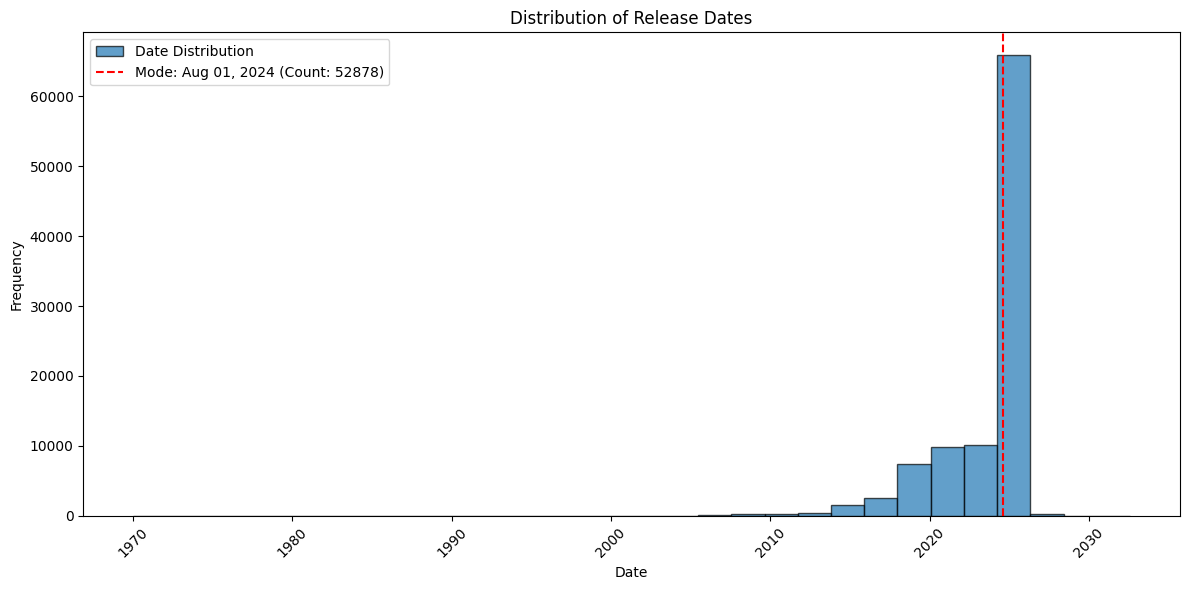

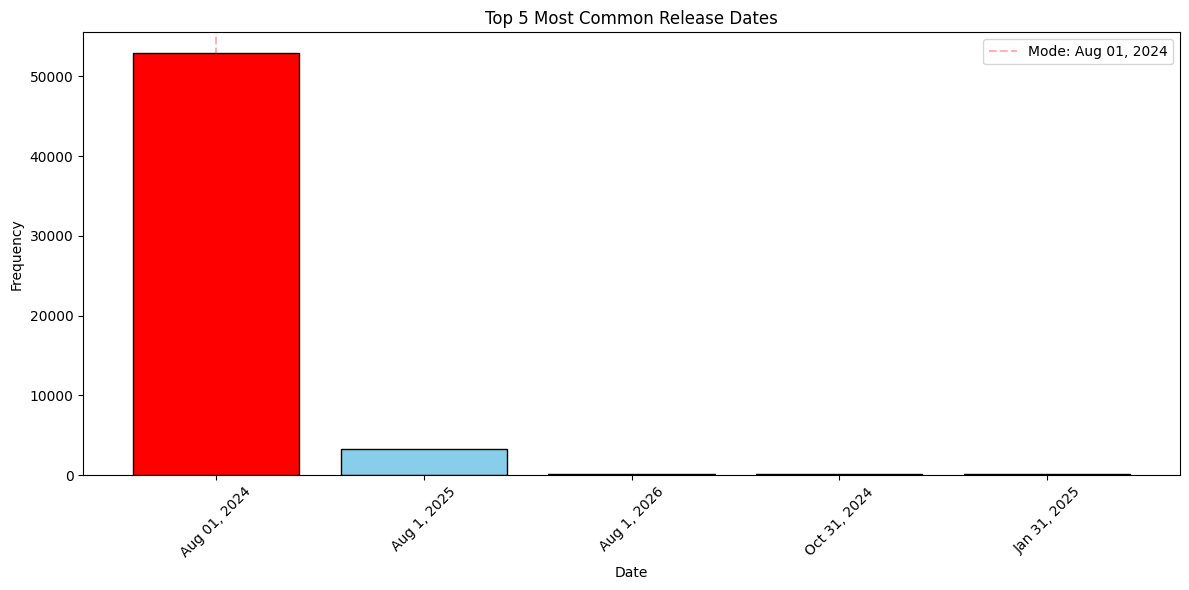

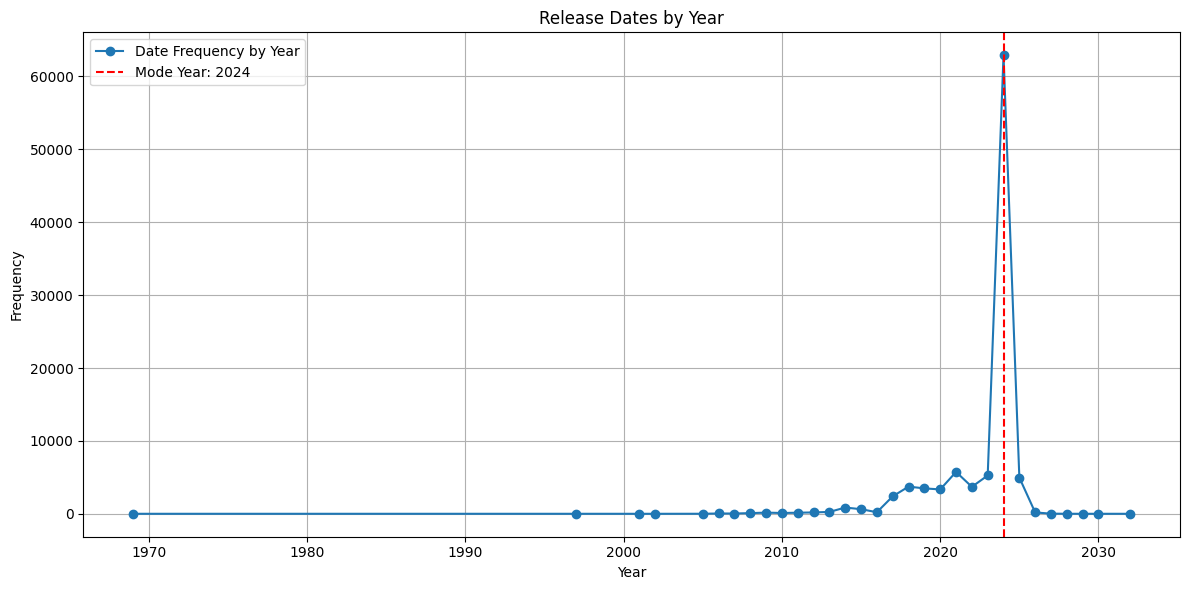

In [825]:
valid_dates = train['release_date'][train['release_date'].str.match(r'^[A-Za-z]{3} \d{1,2}, \d{4}$', na=False)]
dates_dt = pd.to_datetime(valid_dates, format='%b %d, %Y', errors='coerce')

mode_date = valid_dates.mode()[0] if not valid_dates.empty else None
mode_count = valid_dates.value_counts().max() if mode_date else 0
mode_dt = pd.to_datetime(mode_date, format='%b %d, %Y', errors='coerce') if mode_date else None

total_records = len(train)
nan_count = train['release_date'].isna().sum()
empty_count = (train['release_date'] == '').sum()
valid_count = valid_dates.shape[0]
invalid_count = total_records - nan_count - empty_count - valid_count

print("Statistical Summary:")
print(f"Total records: {total_records}")
print(f"NaN records: {nan_count}")
print(f"Empty string records: {empty_count}")
print(f"Valid date records: {valid_count}")
print(f"Invalid records: {invalid_count}")
if not dates_dt.empty:
    print(f"Date range: {dates_dt.min()} to {dates_dt.max()}")
if mode_date:
    print(f"Mode date: {mode_date} (Count: {mode_count})")

plt.figure(figsize=(12, 6))
if not dates_dt.empty:
    plt.hist(dates_dt, bins=30, edgecolor='black', alpha=0.7, label='Date Distribution')
    if mode_dt:
        plt.axvline(mode_dt, color='red', linestyle='--', label=f'Mode: {mode_date} (Count: {mode_count})')
plt.title('Distribution of Release Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_n = 5
date_counts = Counter(valid_dates)
top_dates = date_counts.most_common(top_n)
dates, counts = zip(*top_dates) if top_dates else ([], [])
colors = ['red' if date == mode_date else 'skyblue' for date in dates]

plt.figure(figsize=(12, 6))
plt.bar(dates, counts, color=colors, edgecolor='black')
plt.title(f'Top {top_n} Most Common Release Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
if mode_date and mode_date in dates:
    plt.axvline(x=dates.index(mode_date), color='red', linestyle='--', alpha=0.3, label=f'Mode: {mode_date}')
plt.legend()
plt.tight_layout()
plt.show()

if not dates_dt.empty:
    yearly_counts = dates_dt.dt.year.value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_counts.index, yearly_counts.values, marker='o', label='Date Frequency by Year')
    if mode_dt:
        plt.axvline(mode_dt.year, color='red', linestyle='--', label=f'Mode Year: {mode_dt.year}')
    plt.title('Release Dates by Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Make it for Test data

Statistical Summary for Test Data:
Total records: 24630
NaN records: 0
Empty string records: 0
Valid date records: 24630
Invalid records: 0
Date range: 1998-11-19 00:00:00 to 2028-08-01 00:00:00
Mode date: Aug 01, 2024 (Count: 13302)


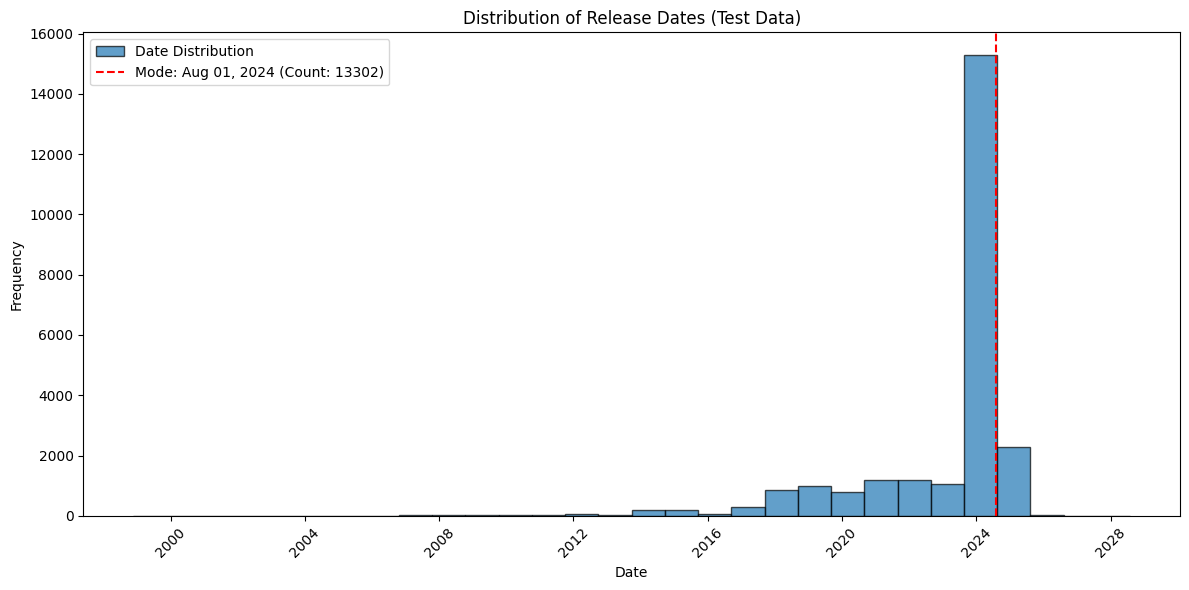

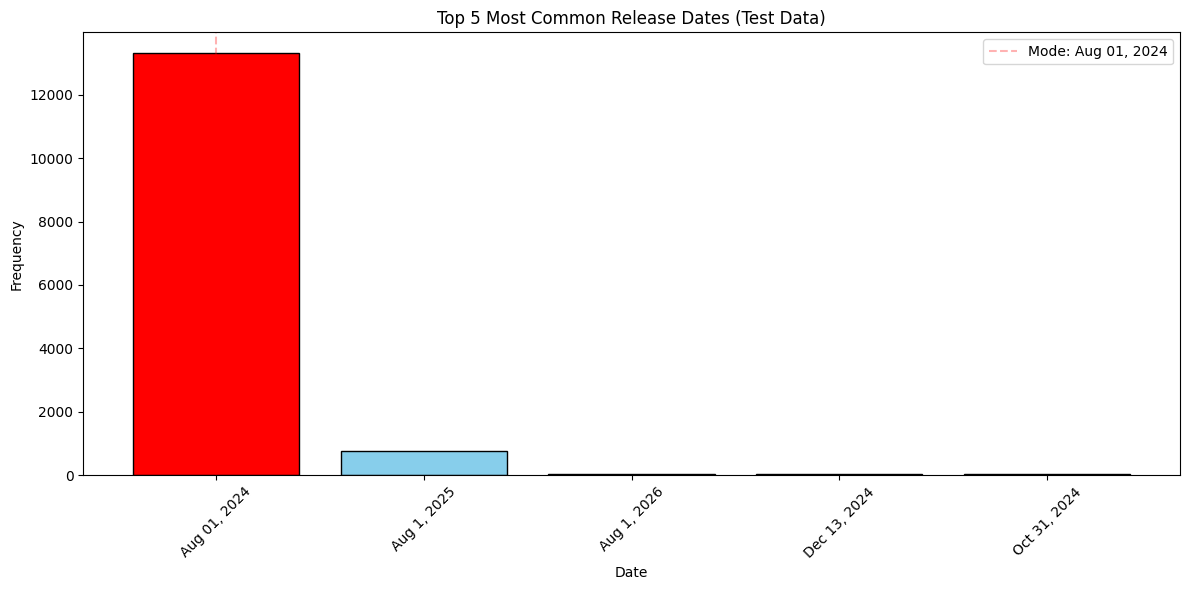

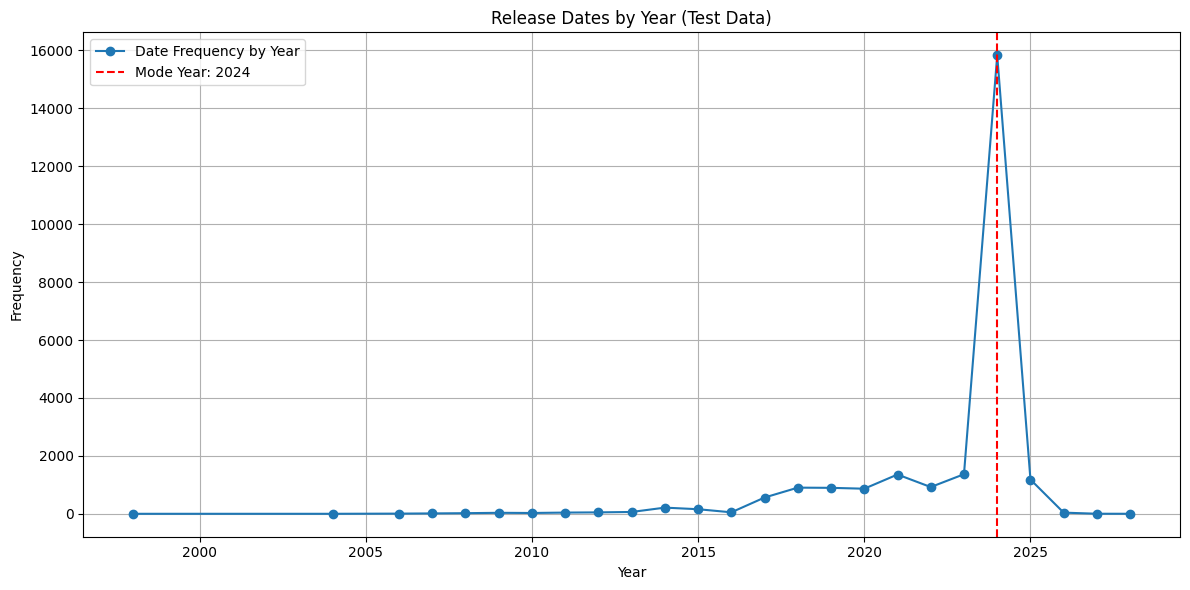

In [826]:
valid_dates = test['release_date'][test['release_date'].str.match(r'^[A-Za-z]{3} \d{1,2}, \d{4}$', na=False)]
dates_dt = pd.to_datetime(valid_dates, format='%b %d, %Y', errors='coerce')

mode_date = valid_dates.mode()[0] if not valid_dates.empty else None
mode_count = valid_dates.value_counts().max() if mode_date else 0
mode_dt = pd.to_datetime(mode_date, format='%b %d, %Y', errors='coerce') if mode_date else None

total_records = len(test)
nan_count = test['release_date'].isna().sum()
empty_count = (test['release_date'] == '').sum()
valid_count = valid_dates.shape[0]
invalid_count = total_records - nan_count - empty_count - valid_count

print("Statistical Summary for Test Data:")
print(f"Total records: {total_records}")
print(f"NaN records: {nan_count}")
print(f"Empty string records: {empty_count}")
print(f"Valid date records: {valid_count}")
print(f"Invalid records: {invalid_count}")
if not dates_dt.empty:
    print(f"Date range: {dates_dt.min()} to {dates_dt.max()}")
if mode_date:
    print(f"Mode date: {mode_date} (Count: {mode_count})")

plt.figure(figsize=(12, 6))
if not dates_dt.empty:
    plt.hist(dates_dt, bins=30, edgecolor='black', alpha=0.7, label='Date Distribution')
    if mode_dt:
        plt.axvline(mode_dt, color='red', linestyle='--', label=f'Mode: {mode_date} (Count: {mode_count})')
plt.title('Distribution of Release Dates (Test Data)')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_n = 5
date_counts = Counter(valid_dates)
top_dates = date_counts.most_common(top_n)
dates, counts = zip(*top_dates) if top_dates else ([], [])
colors = ['red' if date == mode_date else 'skyblue' for date in dates]

plt.figure(figsize=(12, 6))
plt.bar(dates, counts, color=colors, edgecolor='black')
plt.title(f'Top {top_n} Most Common Release Dates (Test Data)')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
if mode_date and mode_date in dates:
    plt.axvline(x=dates.index(mode_date), color='red', linestyle='--', alpha=0.3, label=f'Mode: {mode_date}')
plt.legend()
plt.tight_layout()
plt.show()

if not dates_dt.empty:
    yearly_counts = dates_dt.dt.year.value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_counts.index, yearly_counts.values, marker='o', label='Date Frequency by Year')
    if mode_dt:
        plt.axvline(mode_dt.year, color='red', linestyle='--', label=f'Mode Year: {mode_dt.year}')
    plt.title('Release Dates by Year (Test Data)')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [827]:
train.dtypes

price                  float64
copiesSold              object
publisherClass          object
reviewScore            float64
steam_achievements      object
steam_trading_cards     object
workshop_support        object
genres                  object
achievements_total     float64
release_date            object
supported_platforms     object
dtype: object

In [828]:
test.dtypes

price                  float64
copiesSold              object
publisherClass          object
reviewScore            float64
steam_achievements      object
steam_trading_cards     object
workshop_support        object
genres                  object
achievements_total     float64
release_date            object
supported_platforms     object
dtype: object

In [829]:
train['release_date'] = pd.to_datetime(train['release_date'], format='%b %d, %Y', errors='coerce')
test['release_date'] = pd.to_datetime(test['release_date'], format='%b %d, %Y', errors='coerce')

# Validate the DateType of Column release_date

In [830]:
train.dtypes

price                         float64
copiesSold                     object
publisherClass                 object
reviewScore                   float64
steam_achievements             object
steam_trading_cards            object
workshop_support               object
genres                         object
achievements_total            float64
release_date           datetime64[ns]
supported_platforms            object
dtype: object

In [831]:
test.dtypes

price                         float64
copiesSold                     object
publisherClass                 object
reviewScore                   float64
steam_achievements             object
steam_trading_cards            object
workshop_support               object
genres                         object
achievements_total            float64
release_date           datetime64[ns]
supported_platforms            object
dtype: object

In [832]:
train['release_date'] = pd.to_datetime(train['release_date'], format='%b %d, %Y', errors='coerce')
test['release_date'] = pd.to_datetime(test['release_date'], format='%b %d, %Y', errors='coerce')

mode_date = train['release_date'].mode()[0]
train['release_date'].fillna(mode_date, inplace=True)
test['release_date'].fillna(mode_date, inplace=True)

# Convert Date To Numerical Data

In [833]:
train['timestamp'] = train['release_date'].astype('int64')
test['timestamp'] = test['release_date'].astype('int64')

train['days_since_start'] = (train['release_date'] - train['release_date'].min()).dt.days
test['days_since_start'] = (test['release_date'] - test['release_date'].min()).dt.days

In [834]:
train.dtypes

price                         float64
copiesSold                     object
publisherClass                 object
reviewScore                   float64
steam_achievements             object
steam_trading_cards            object
workshop_support               object
genres                         object
achievements_total            float64
release_date           datetime64[ns]
supported_platforms            object
timestamp                       int64
days_since_start                int64
dtype: object

In [835]:
test.dtypes

price                         float64
copiesSold                     object
publisherClass                 object
reviewScore                   float64
steam_achievements             object
steam_trading_cards            object
workshop_support               object
genres                         object
achievements_total            float64
release_date           datetime64[ns]
supported_platforms            object
timestamp                       int64
days_since_start                int64
dtype: object

In [836]:
train.drop('release_date', axis=1, inplace=True)
test.drop('release_date', axis=1, inplace=True)

In [837]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98516 entries, 0 to 98515
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                98516 non-null  float64
 1   copiesSold           74504 non-null  object 
 2   publisherClass       74504 non-null  object 
 3   reviewScore          98516 non-null  float64
 4   steam_achievements   76606 non-null  object 
 5   steam_trading_cards  76606 non-null  object 
 6   workshop_support     76606 non-null  object 
 7   genres               73004 non-null  object 
 8   achievements_total   98516 non-null  float64
 9   supported_platforms  76606 non-null  object 
 10  timestamp            98516 non-null  int64  
 11  days_since_start     98516 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


In [838]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24630 entries, 0 to 24629
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                24630 non-null  float64
 1   copiesSold           18834 non-null  object 
 2   publisherClass       18834 non-null  object 
 3   reviewScore          24630 non-null  float64
 4   steam_achievements   19118 non-null  object 
 5   steam_trading_cards  19118 non-null  object 
 6   workshop_support     19118 non-null  object 
 7   genres               18240 non-null  object 
 8   achievements_total   24630 non-null  float64
 9   supported_platforms  19118 non-null  object 
 10  timestamp            24630 non-null  int64  
 11  days_since_start     24630 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 2.3+ MB


In [839]:
colm = ['timestamp', 'days_since_start']

# Display The Nulls Values After Add This Columns

In [840]:
for col in colm:
  train_per = (train[col].isnull().sum() / len(train)) * 100
  print(f"Column release_date: {train_per:.2f}% null values")

  test_per = (test[col].isnull().sum() / len(test)) * 100
  print(f"Column release_date: {test_per:.2f}% null values")

Column release_date: 0.00% null values
Column release_date: 0.00% null values
Column release_date: 0.00% null values
Column release_date: 0.00% null values


In [841]:
for col in colm:
  train_numerical_columns.append(col)

In [842]:
for col in train_numerical_columns:
  if col in train.columns:
    if train[col].skew() > skew_threshold:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(train[col].median(), inplace=True)
    else:
        train[col].fillna(train[col].mean(), inplace=True)
        test[col].fillna(train[col].mean(), inplace=True)
  else:
    print(f"Warning: Column {col} not found in DataFrame")

# Validate This Step

In [843]:
for col in train_numerical_columns:
  train_per = (train[col].isnull().sum() / len(train)) * 100
  print(f"Column {col}: {train_per:.2f}% null values")

  test_per = (test[col].isnull().sum() / len(test)) * 100
  print(f"Column release_date: {test_per:.2f}% null values")

Column price: 0.00% null values
Column release_date: 0.00% null values
Column reviewScore: 0.00% null values
Column release_date: 0.00% null values
Column achievements_total: 0.00% null values
Column release_date: 0.00% null values
Column timestamp: 0.00% null values
Column release_date: 0.00% null values
Column days_since_start: 0.00% null values
Column release_date: 0.00% null values


# Make Statistical Analysis After Handle With Dates

In [844]:
train.describe()

price   reviewScore  achievements_total     timestamp  \
count  98516.000000  98516.000000             98516.0  9.851600e+04   
mean       5.909531     74.338288                18.0  1.681594e+18   
std        4.629598     18.463764                 0.0  8.236475e+16   
min        0.000000     36.500000                18.0 -8.640000e+13   
25%        2.990000     68.000000                18.0  1.665706e+18   
50%        4.990000     71.879094                18.0  1.722470e+18   
75%        7.990000     89.000000                18.0  1.722470e+18   
max       15.490000    100.000000                18.0  1.974931e+18   

       days_since_start  
count      98516.000000  
mean       19463.893357  
std          953.295724  
min            0.000000  
25%        19280.000000  
50%        19937.000000  
75%        19937.000000  
max        22859.000000

In [845]:
test.describe()

price   reviewScore  achievements_total     timestamp  \
count  24630.000000  24630.000000             24630.0  2.463000e+04   
mean       5.875659     74.470005                18.0  1.681996e+18   
std        4.640212     18.681166                 0.0  8.160975e+16   
min        0.000000     36.500000                18.0  9.114336e+17   
25%        1.990000     67.000000                18.0  1.668730e+18   
50%        4.990000     71.879094                18.0  1.722470e+18   
75%        7.990000     89.000000                18.0  1.722470e+18   
max       15.490000    100.000000                18.0  1.848701e+18   

       days_since_start  
count      24630.000000  
mean        8918.549168  
std          944.557326  
min            0.000000  
25%         8765.000000  
50%         9387.000000  
75%         9387.000000  
max        10848.000000

# Handle The Boolean Data

## Collect Boolean columns



In [846]:
Boolean_columns = []

for col in train.columns:
    if train[col].apply(lambda x: isinstance(x, bool)).any():
        Boolean_columns.append(col)

print("Boolean columns in train Data:", Boolean_columns)

Boolean columns in train Data: ['steam_achievements', 'steam_trading_cards', 'workshop_support']


In [847]:
Boolean_columns1 = []

for col in test.columns:
    if test[col].apply(lambda x: isinstance(x, bool)).any():
        Boolean_columns1.append(col)

print("Boolean columns in test Data:", Boolean_columns1)

Boolean columns in test Data: ['steam_achievements', 'steam_trading_cards', 'workshop_support']


# Make Visualization For Boolean Data

## Make it For Train Data

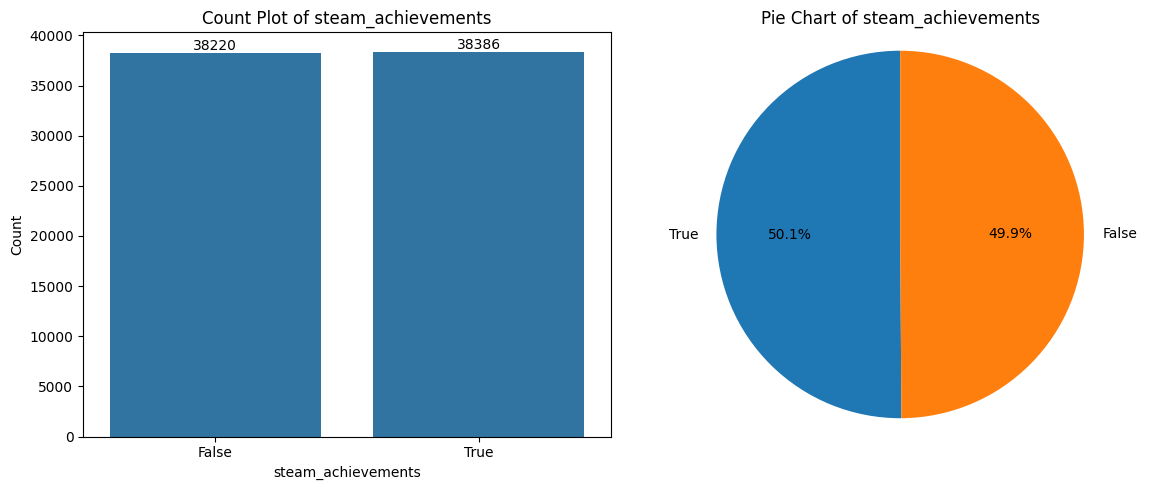

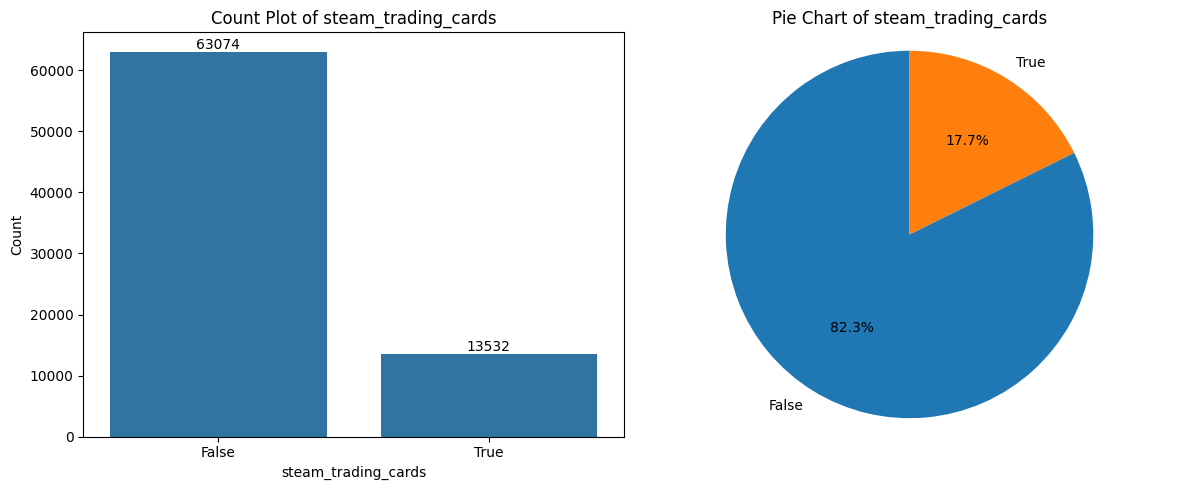

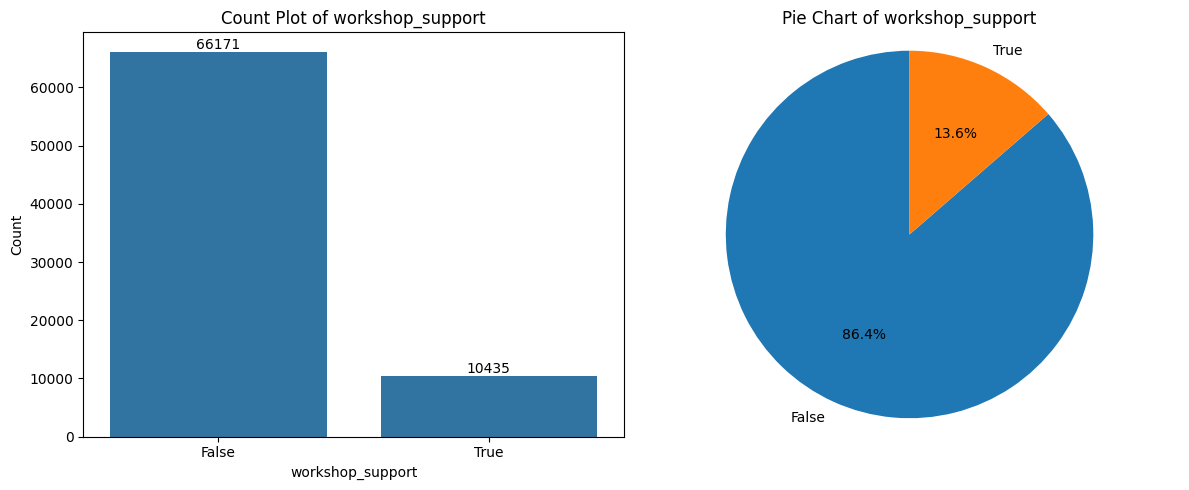

In [848]:
for col in Boolean_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

  sns.countplot(x=train[col], ax=ax1)
  ax1.set_title(f"Count Plot of {col}")
  ax1.set_xlabel(col)
  ax1.set_ylabel("Count")

  for p in ax1.patches:
      ax1.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

  value_counts = train[col].value_counts()
  ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
  ax2.set_title(f"Pie Chart of {col}")

  ax2.axis('equal')

  plt.tight_layout()
  plt.show()

## Make it For Test Data

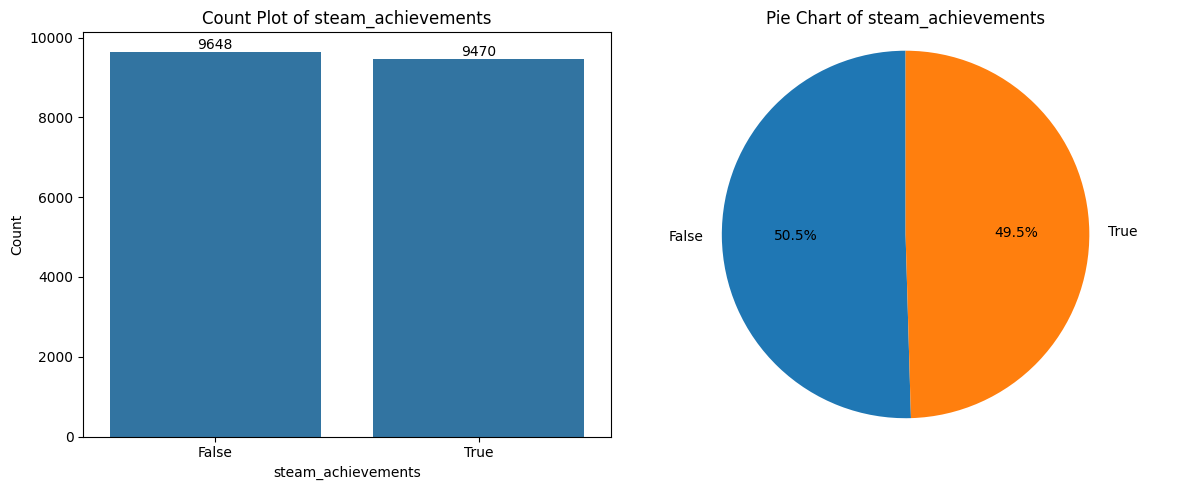

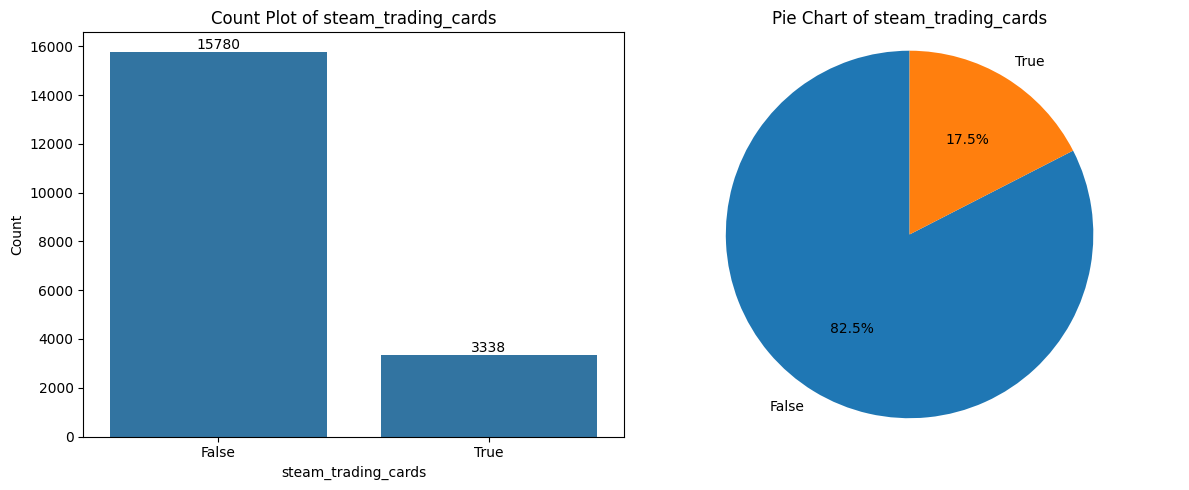

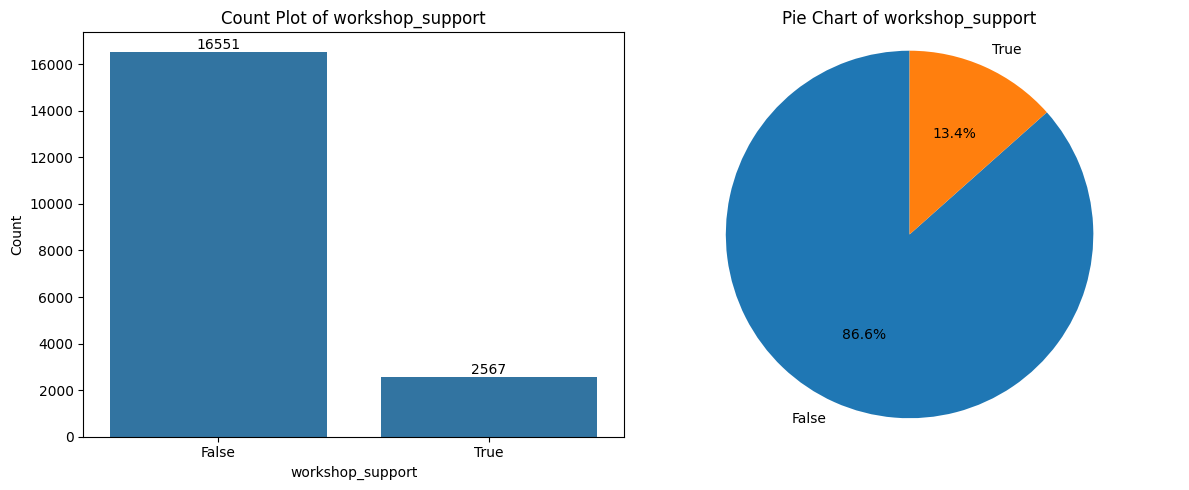

In [849]:
for col in Boolean_columns1:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

  sns.countplot(x=test[col], ax=ax1)
  ax1.set_title(f"Count Plot of {col}")
  ax1.set_xlabel(col)
  ax1.set_ylabel("Count")

  for p in ax1.patches:
      ax1.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

  value_counts = test[col].value_counts()
  ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
  ax2.set_title(f"Pie Chart of {col}")

  ax2.axis('equal')

  plt.tight_layout()
  plt.show()

# View Percentage of Nulls in Boolean Columns

In [850]:
#In Train Data
for col in Boolean_columns:
  tr_null_percentage = (train[col].isnull().sum() / len(train)) * 100
  print(f"In Train Data --> Column {col}: {tr_null_percentage:.2f}% null values")

In Train Data --> Column steam_achievements: 22.24% null values
In Train Data --> Column steam_trading_cards: 22.24% null values
In Train Data --> Column workshop_support: 22.24% null values


In [851]:
#In Test Data
for col in Boolean_columns1:
  te_null_percentage = (test[col].isnull().sum() / len(test)) * 100
  print(f"In Test Data --> Column {col}: {te_null_percentage:.2f}% null values")

In Test Data --> Column steam_achievements: 22.38% null values
In Test Data --> Column steam_trading_cards: 22.38% null values
In Test Data --> Column workshop_support: 22.38% null values


# Handle the Missing Values in Boolean Data

## Replace Them with False

In [852]:
# #In Train Data
# for col in Boolean_columns:
#     if col in train.columns:
#         train[col] = train[col].fillna(False)

# #In Test Data
# for col in Boolean_columns1:
#     if col in test.columns:
#         test[col] = test[col].fillna(False)

## Replace Them with True

In [853]:
# #In Train Data
# for col in Boolean_columns:
#     if col in train.columns:
#         train[col] = train[col].fillna(True)

# #In Test Data
# for col in Boolean_columns1:
#     if col in test.columns:
#         test[col] = test[col].fillna(True)

## Replace Them with Mode

In [854]:
#In Train Data
for col in Boolean_columns:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].mode()[0])

#In Test Data
for col in Boolean_columns1:
    if col in test.columns:
        test[col] = test[col].fillna(train[col].mode()[0])

# Check There No Missing Values

In [855]:
#In Train Data
for col in Boolean_columns:
  tr_null_percentage = (train[col].isnull().sum() / len(train)) * 100
  print(f"In Train Data --> Column {col}: {tr_null_percentage:.2f}% null values")

In Train Data --> Column steam_achievements: 0.00% null values
In Train Data --> Column steam_trading_cards: 0.00% null values
In Train Data --> Column workshop_support: 0.00% null values


In [856]:
#In Test Data
for col in Boolean_columns1:
  te_null_percentage = (test[col].isnull().sum() / len(test)) * 100
  print(f"In Test Data --> Column {col}: {te_null_percentage:.2f}% null values")

In Test Data --> Column steam_achievements: 0.00% null values
In Test Data --> Column steam_trading_cards: 0.00% null values
In Test Data --> Column workshop_support: 0.00% null values


# Encoding The Boolean Data

## *  True ---> 1
## *  False ---> 0



In [857]:
#In Train Data
for col in Boolean_columns:
    if col in train.columns:
        train[col] = train[col].astype(int)

In [858]:
#In Test Data
for col in Boolean_columns1:
    if col in test.columns:
        test[col] = test[col].astype(int)

Validate This Step

In [859]:
for col in Boolean_columns:
  print(train[col].head(10))

0    0
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    1
Name: steam_achievements, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: steam_trading_cards, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: workshop_support, dtype: int64


In [860]:
train.dtypes

price                  float64
copiesSold              object
publisherClass          object
reviewScore            float64
steam_achievements       int64
steam_trading_cards      int64
workshop_support         int64
genres                  object
achievements_total     float64
supported_platforms     object
timestamp                int64
days_since_start         int64
dtype: object

In [861]:
for col in Boolean_columns1:
  print(test[col].head(10))

0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    1
Name: steam_achievements, dtype: int64
0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: steam_trading_cards, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: workshop_support, dtype: int64


In [862]:
test.dtypes

price                  float64
copiesSold              object
publisherClass          object
reviewScore            float64
steam_achievements       int64
steam_trading_cards      int64
workshop_support         int64
genres                  object
achievements_total     float64
supported_platforms     object
timestamp                int64
days_since_start         int64
dtype: object

# Make Statistical Analysis After Handle With Booleans

In [863]:
train.describe()

price   reviewScore  steam_achievements  steam_trading_cards  \
count  98516.000000  98516.000000        98516.000000         98516.000000   
mean       5.909531     74.338288            0.612043             0.137358   
std        4.629598     18.463764            0.487287             0.344227   
min        0.000000     36.500000            0.000000             0.000000   
25%        2.990000     68.000000            0.000000             0.000000   
50%        4.990000     71.879094            1.000000             0.000000   
75%        7.990000     89.000000            1.000000             0.000000   
max       15.490000    100.000000            1.000000             1.000000   

       workshop_support  achievements_total     timestamp  days_since_start  
count      98516.000000             98516.0  9.851600e+04      98516.000000  
mean           0.105922                18.0  1.681594e+18      19463.893357  
std            0.307739                 0.0  8.236475e+16        953.295724  
min            0.000000                18.0 -8.640000e+13          0.000000  
25%            0.000000                18.0  1.665706e+18      19280.000000  
50%            0.000000                18.0  1.722470e+18      19937.000000  
75%            0.000000                18.0  1.722470e+18      19937.000000  
max            1.000000                18.0  1.974931e+18      22859.000000

In [864]:
test.describe()

price   reviewScore  steam_achievements  steam_trading_cards  \
count  24630.000000  24630.000000        24630.000000         24630.000000   
mean       5.875659     74.470005            0.608283             0.135526   
std        4.640212     18.681166            0.488144             0.342291   
min        0.000000     36.500000            0.000000             0.000000   
25%        1.990000     67.000000            0.000000             0.000000   
50%        4.990000     71.879094            1.000000             0.000000   
75%        7.990000     89.000000            1.000000             0.000000   
max       15.490000    100.000000            1.000000             1.000000   

       workshop_support  achievements_total     timestamp  days_since_start  
count      24630.000000             24630.0  2.463000e+04      24630.000000  
mean           0.104222                18.0  1.681996e+18       8918.549168  
std            0.305555                 0.0  8.160975e+16        944.557326  
min            0.000000                18.0  9.114336e+17          0.000000  
25%            0.000000                18.0  1.668730e+18       8765.000000  
50%            0.000000                18.0  1.722470e+18       9387.000000  
75%            0.000000                18.0  1.722470e+18       9387.000000  
max            1.000000                18.0  1.848701e+18      10848.000000

# Handle With Categorical Data

## Collect Them in List

In [865]:
def get_categorical_columns(df, threshold=10):
    categorical_columns = []
    for col in df.columns:
        if not np.issubdtype(df[col].dtype, np.datetime64):
            if df[col].dtype == 'object':
                categorical_columns.append(col)
    return categorical_columns

In [866]:
categorical_columns = get_categorical_columns(train, threshold=10)
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['copiesSold', 'publisherClass', 'genres', 'supported_platforms']


In [867]:
categorical_columns1 = get_categorical_columns(test, threshold=10)
print("Categorical Columns:", categorical_columns1)

Categorical Columns: ['copiesSold', 'publisherClass', 'genres', 'supported_platforms']


# Make Visualization for Categorical data

## Make it for Train

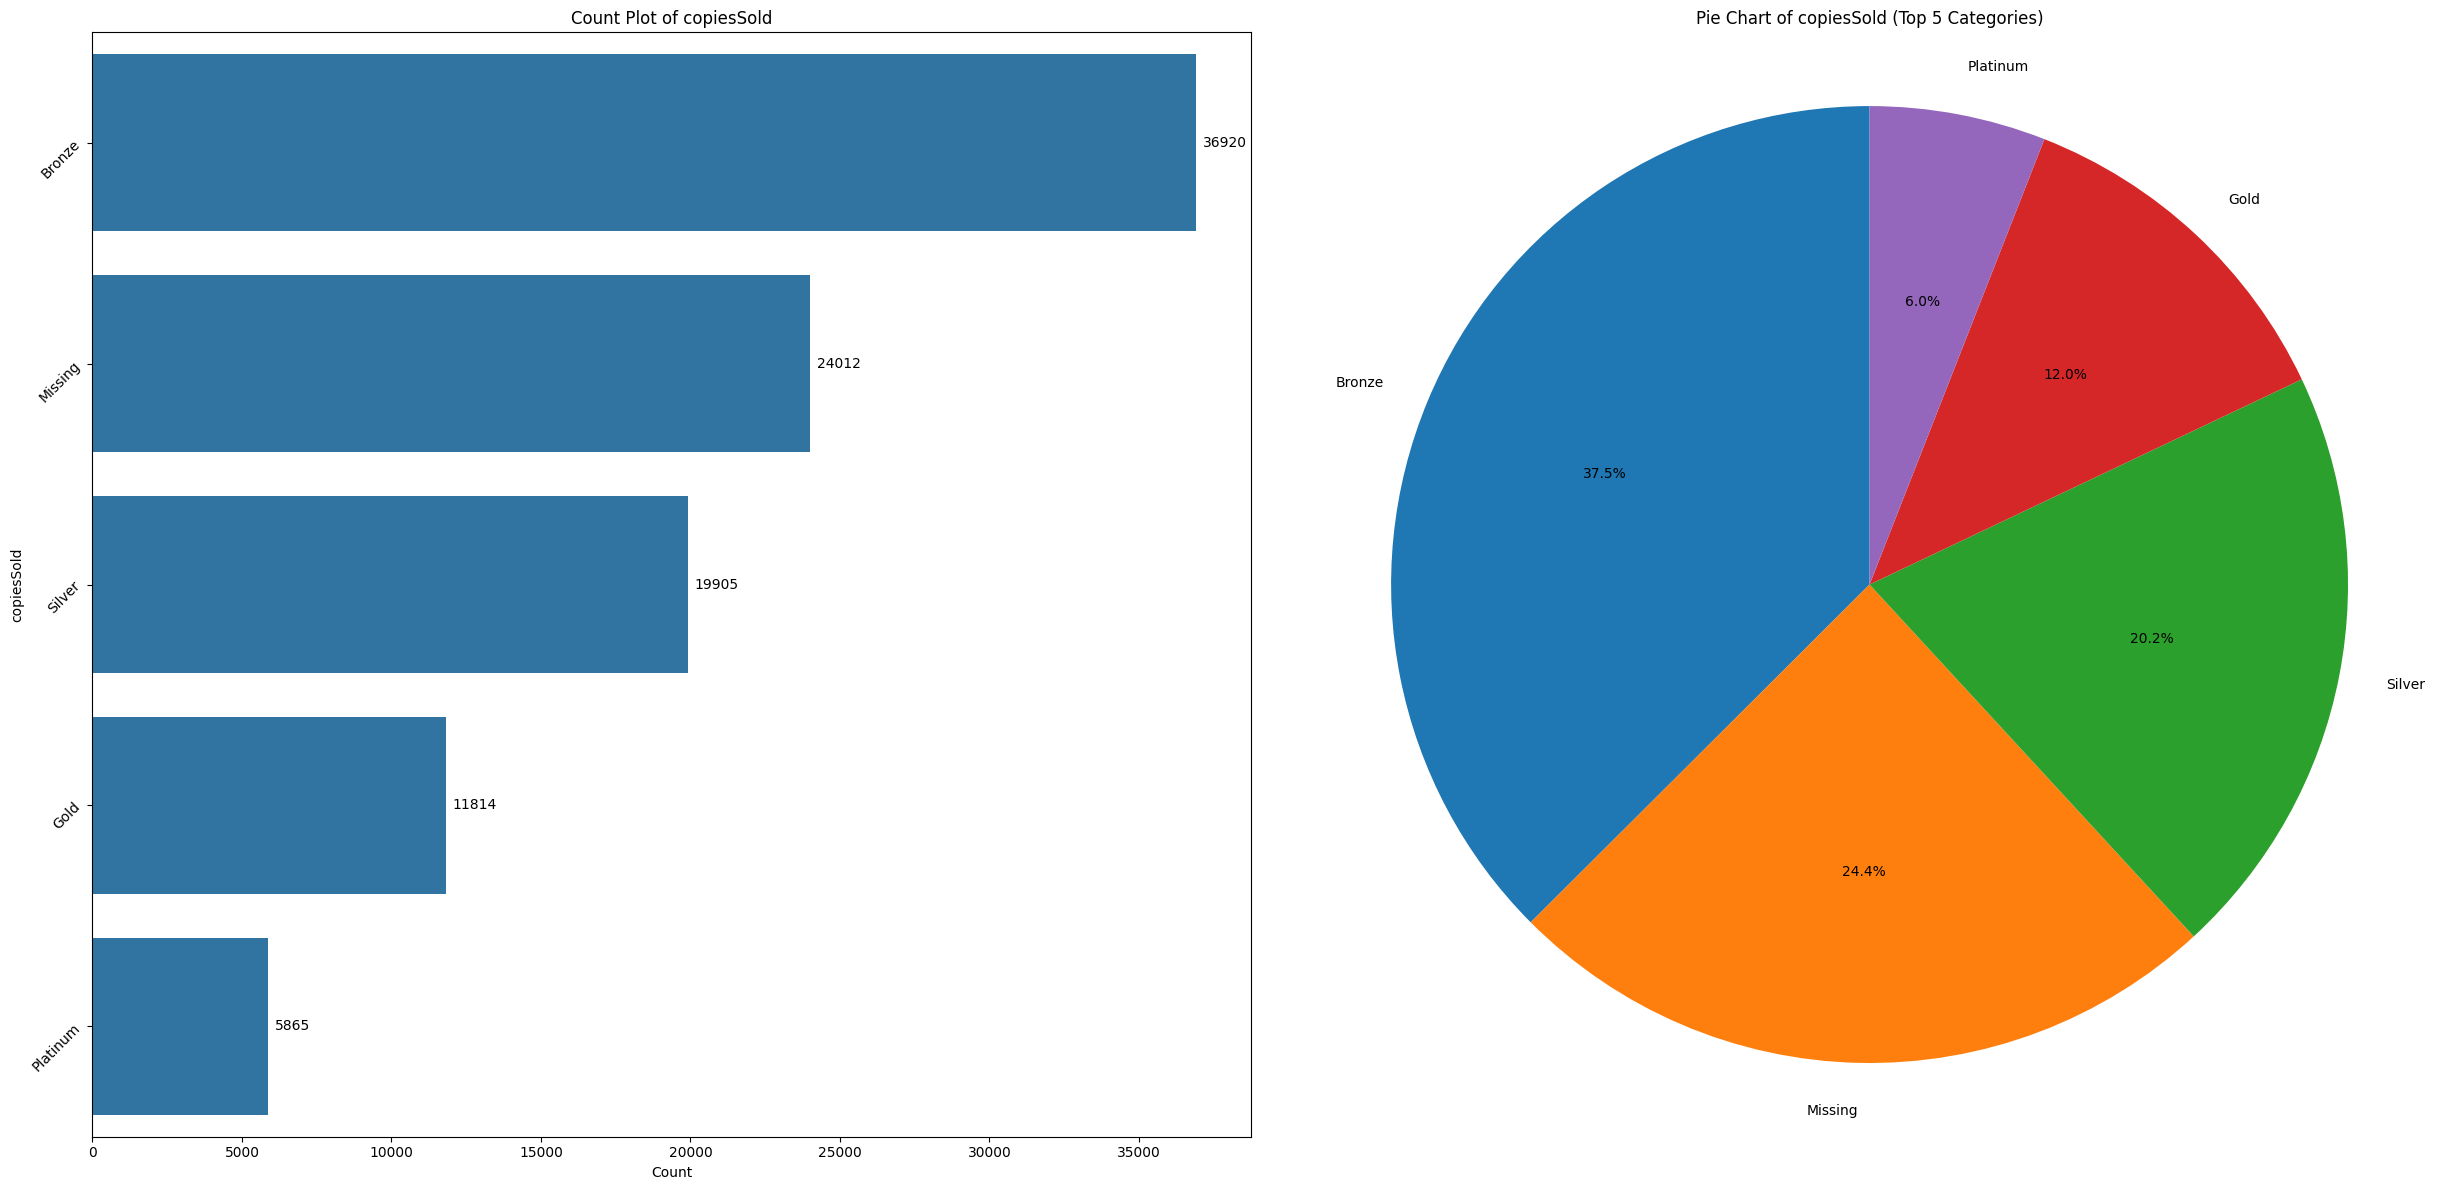

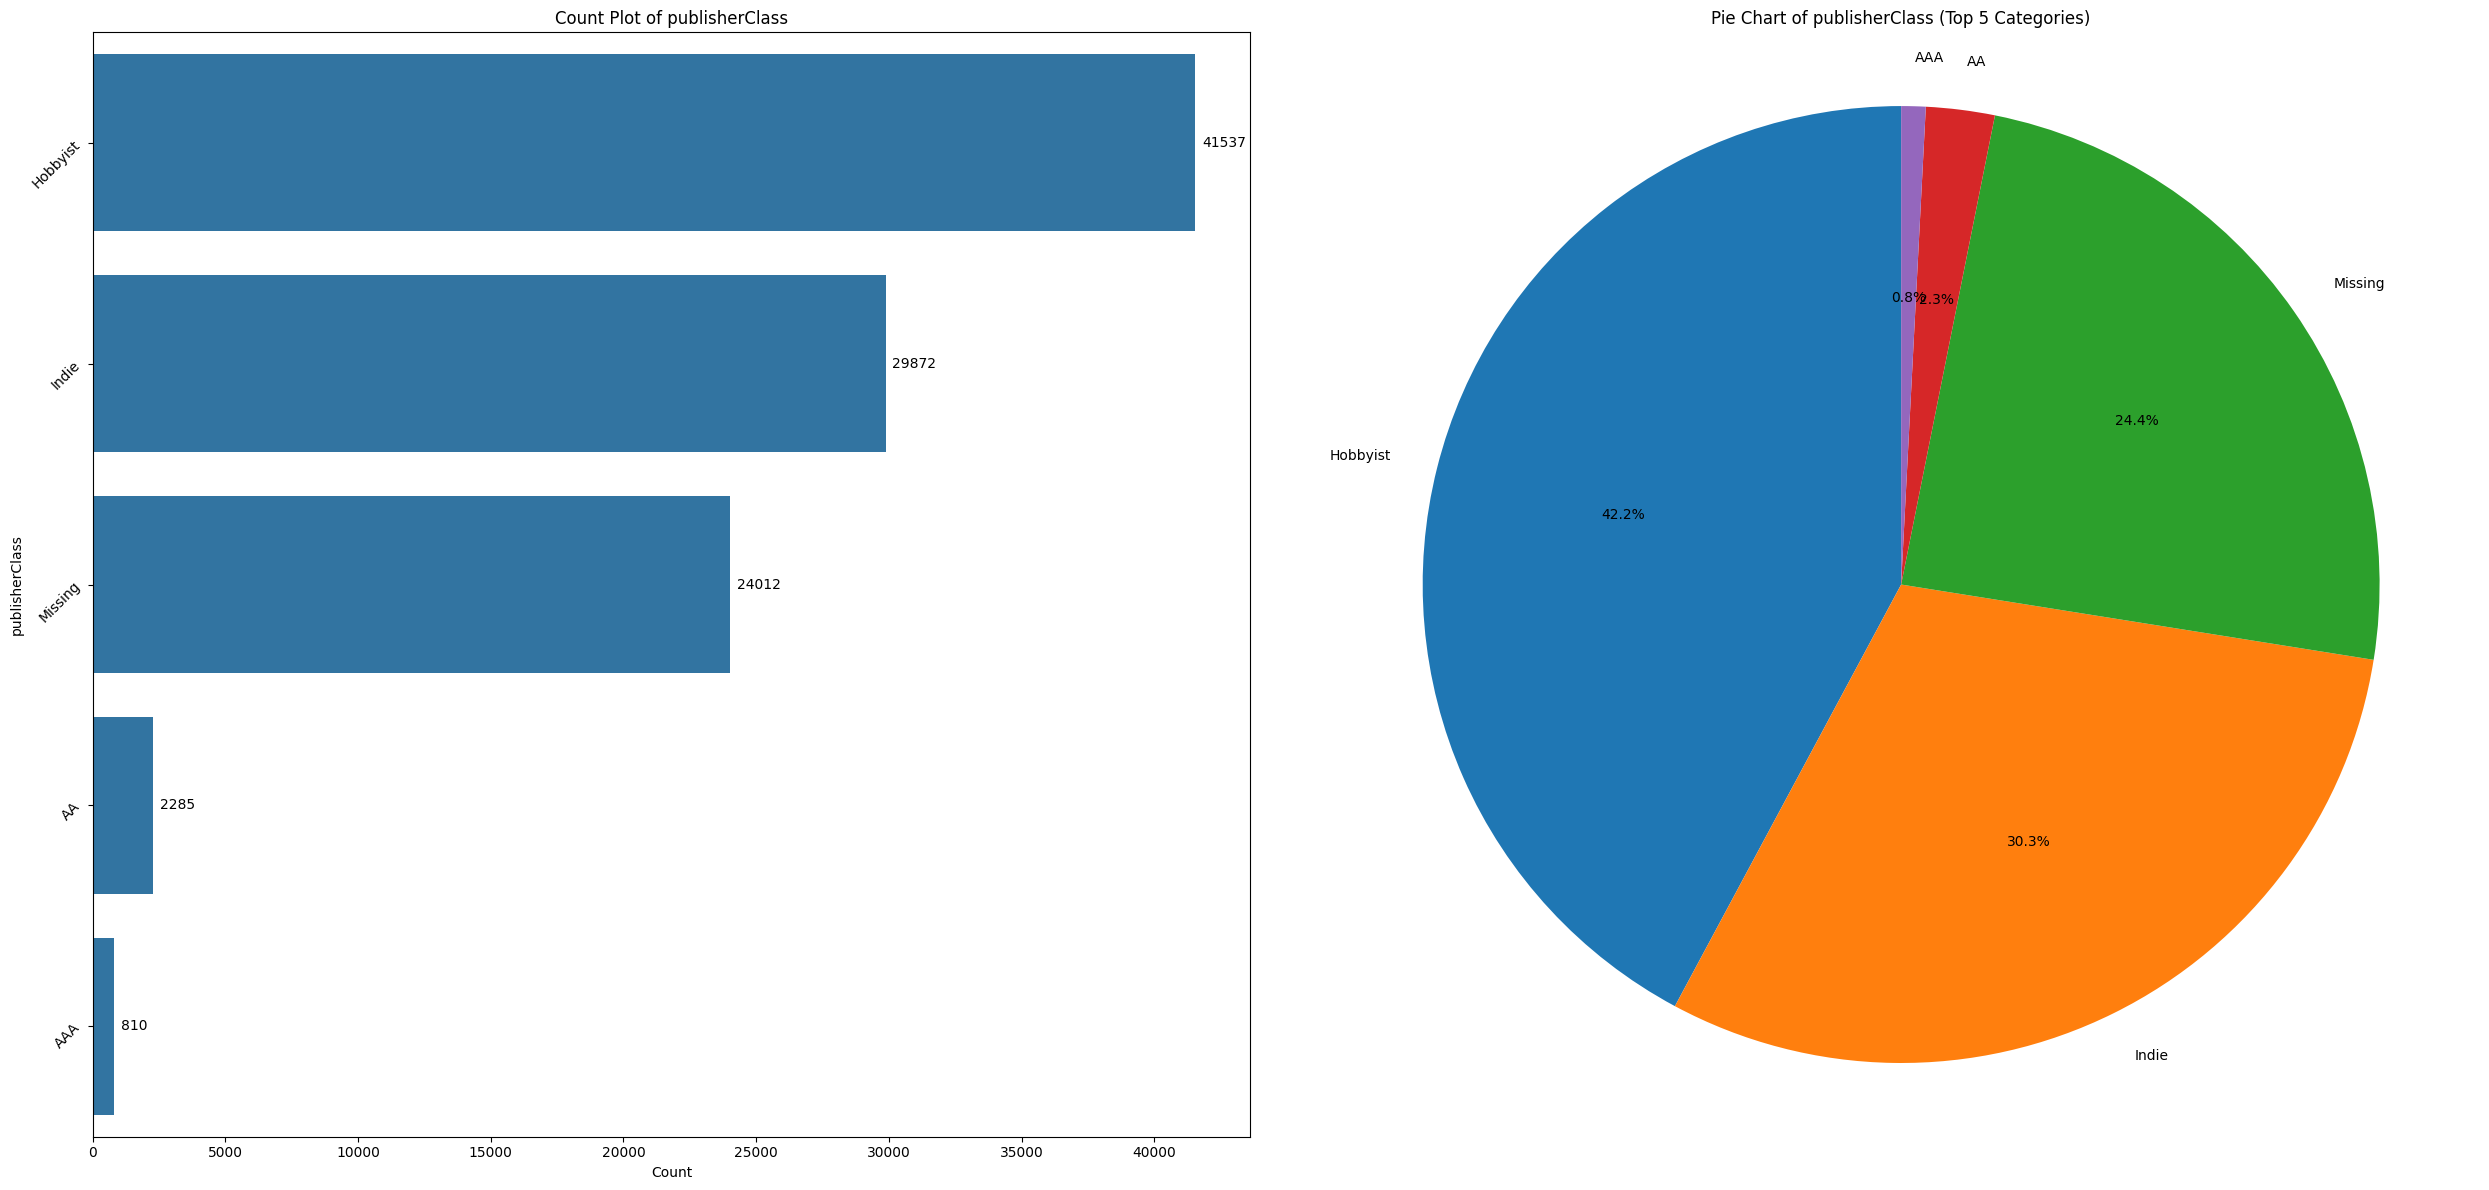

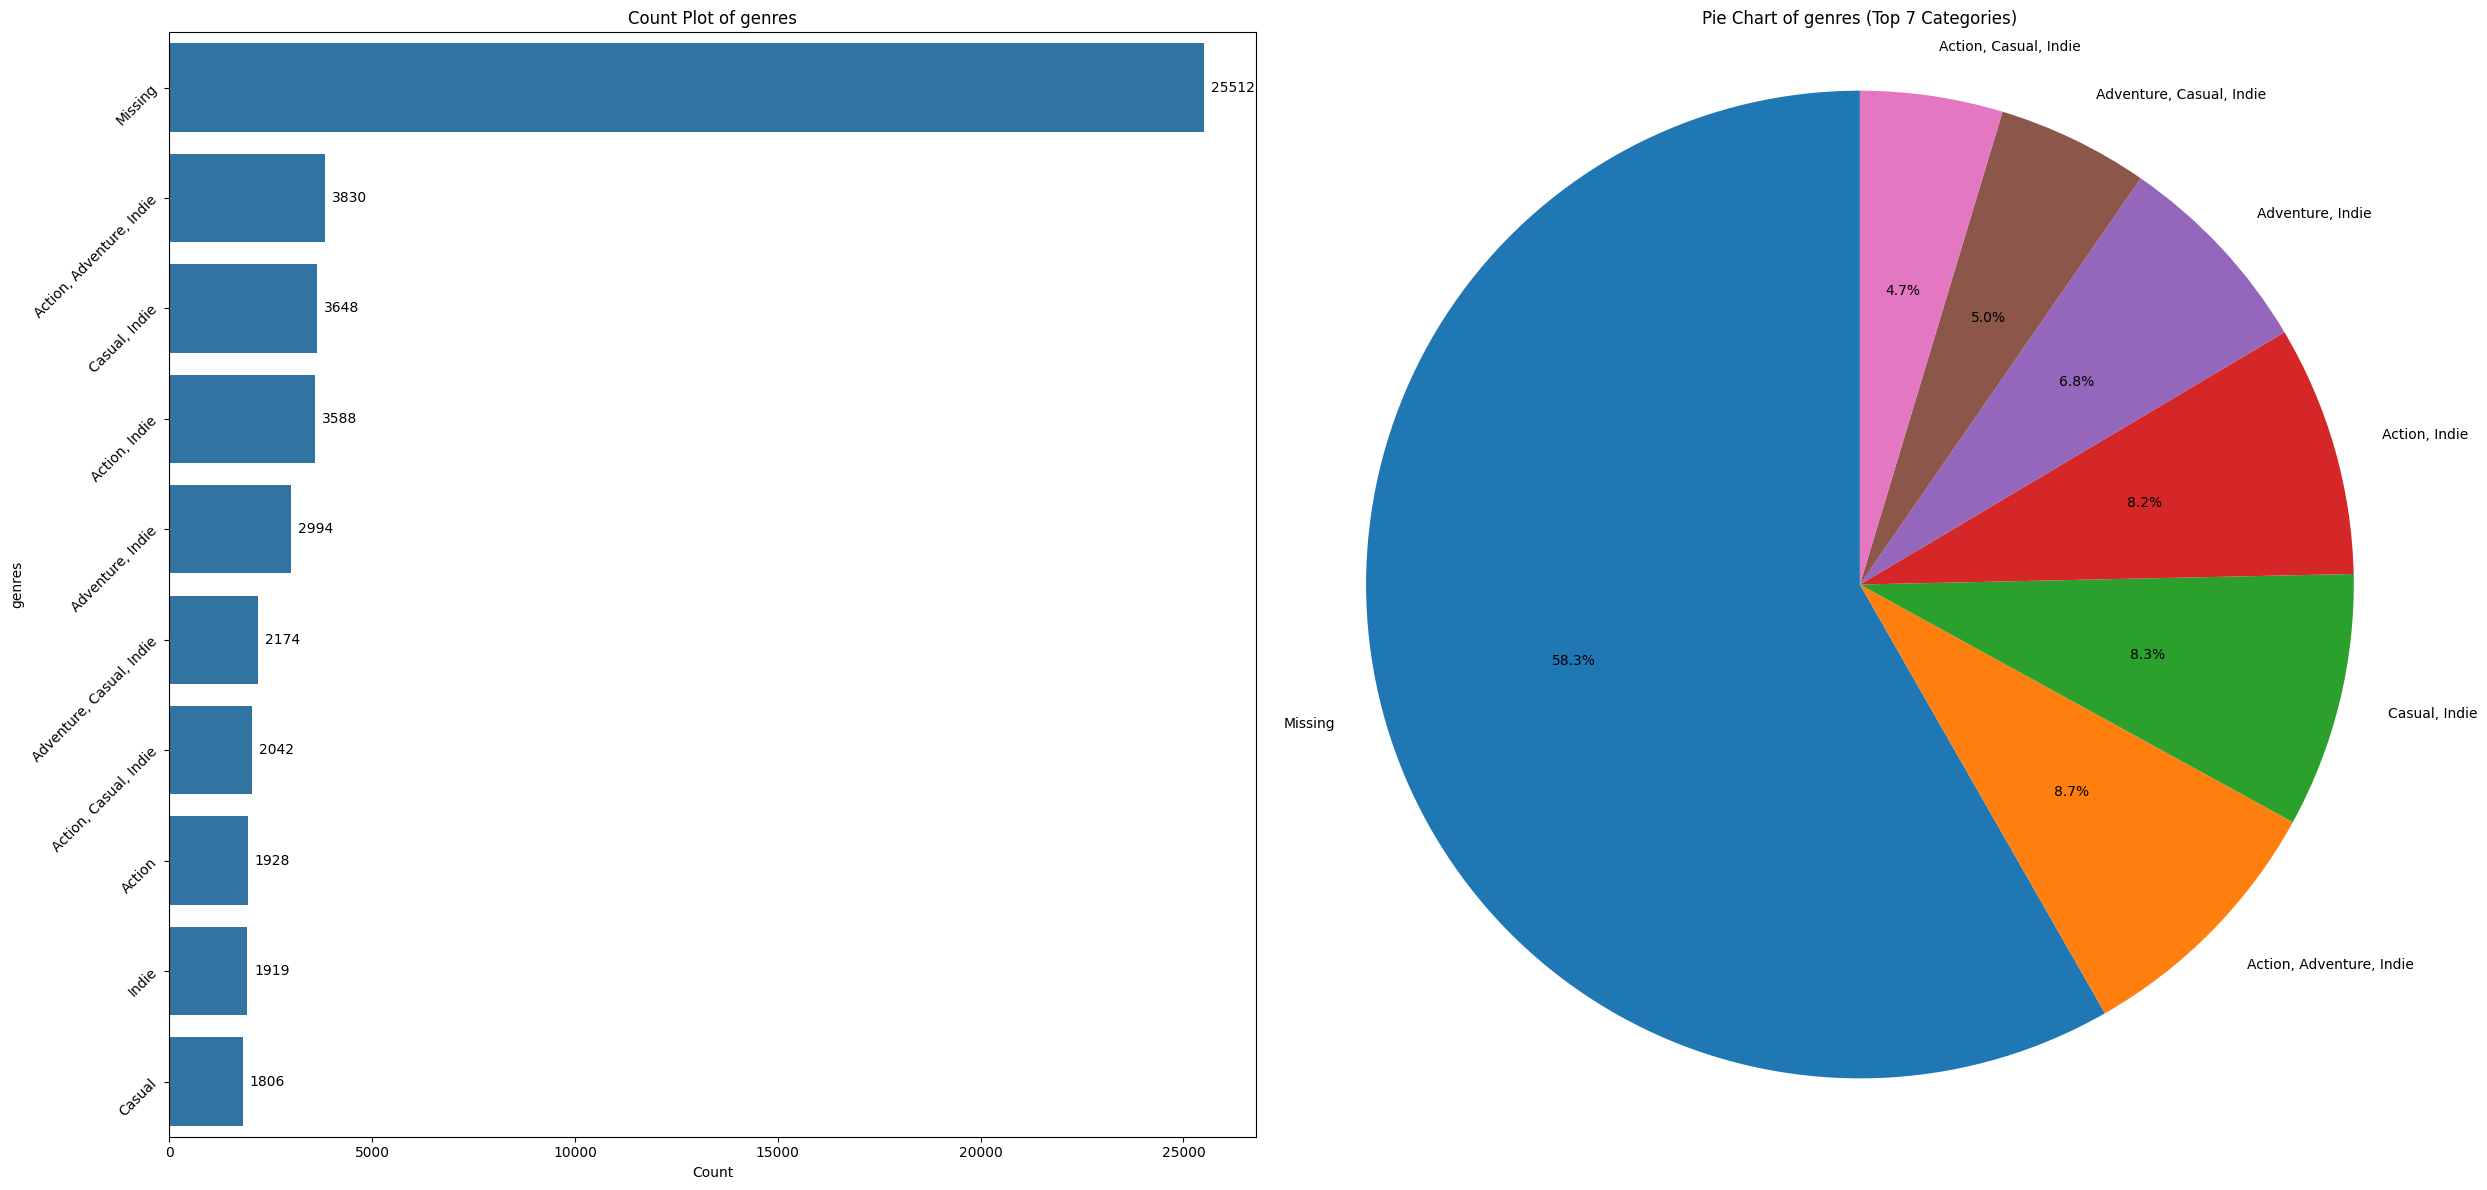

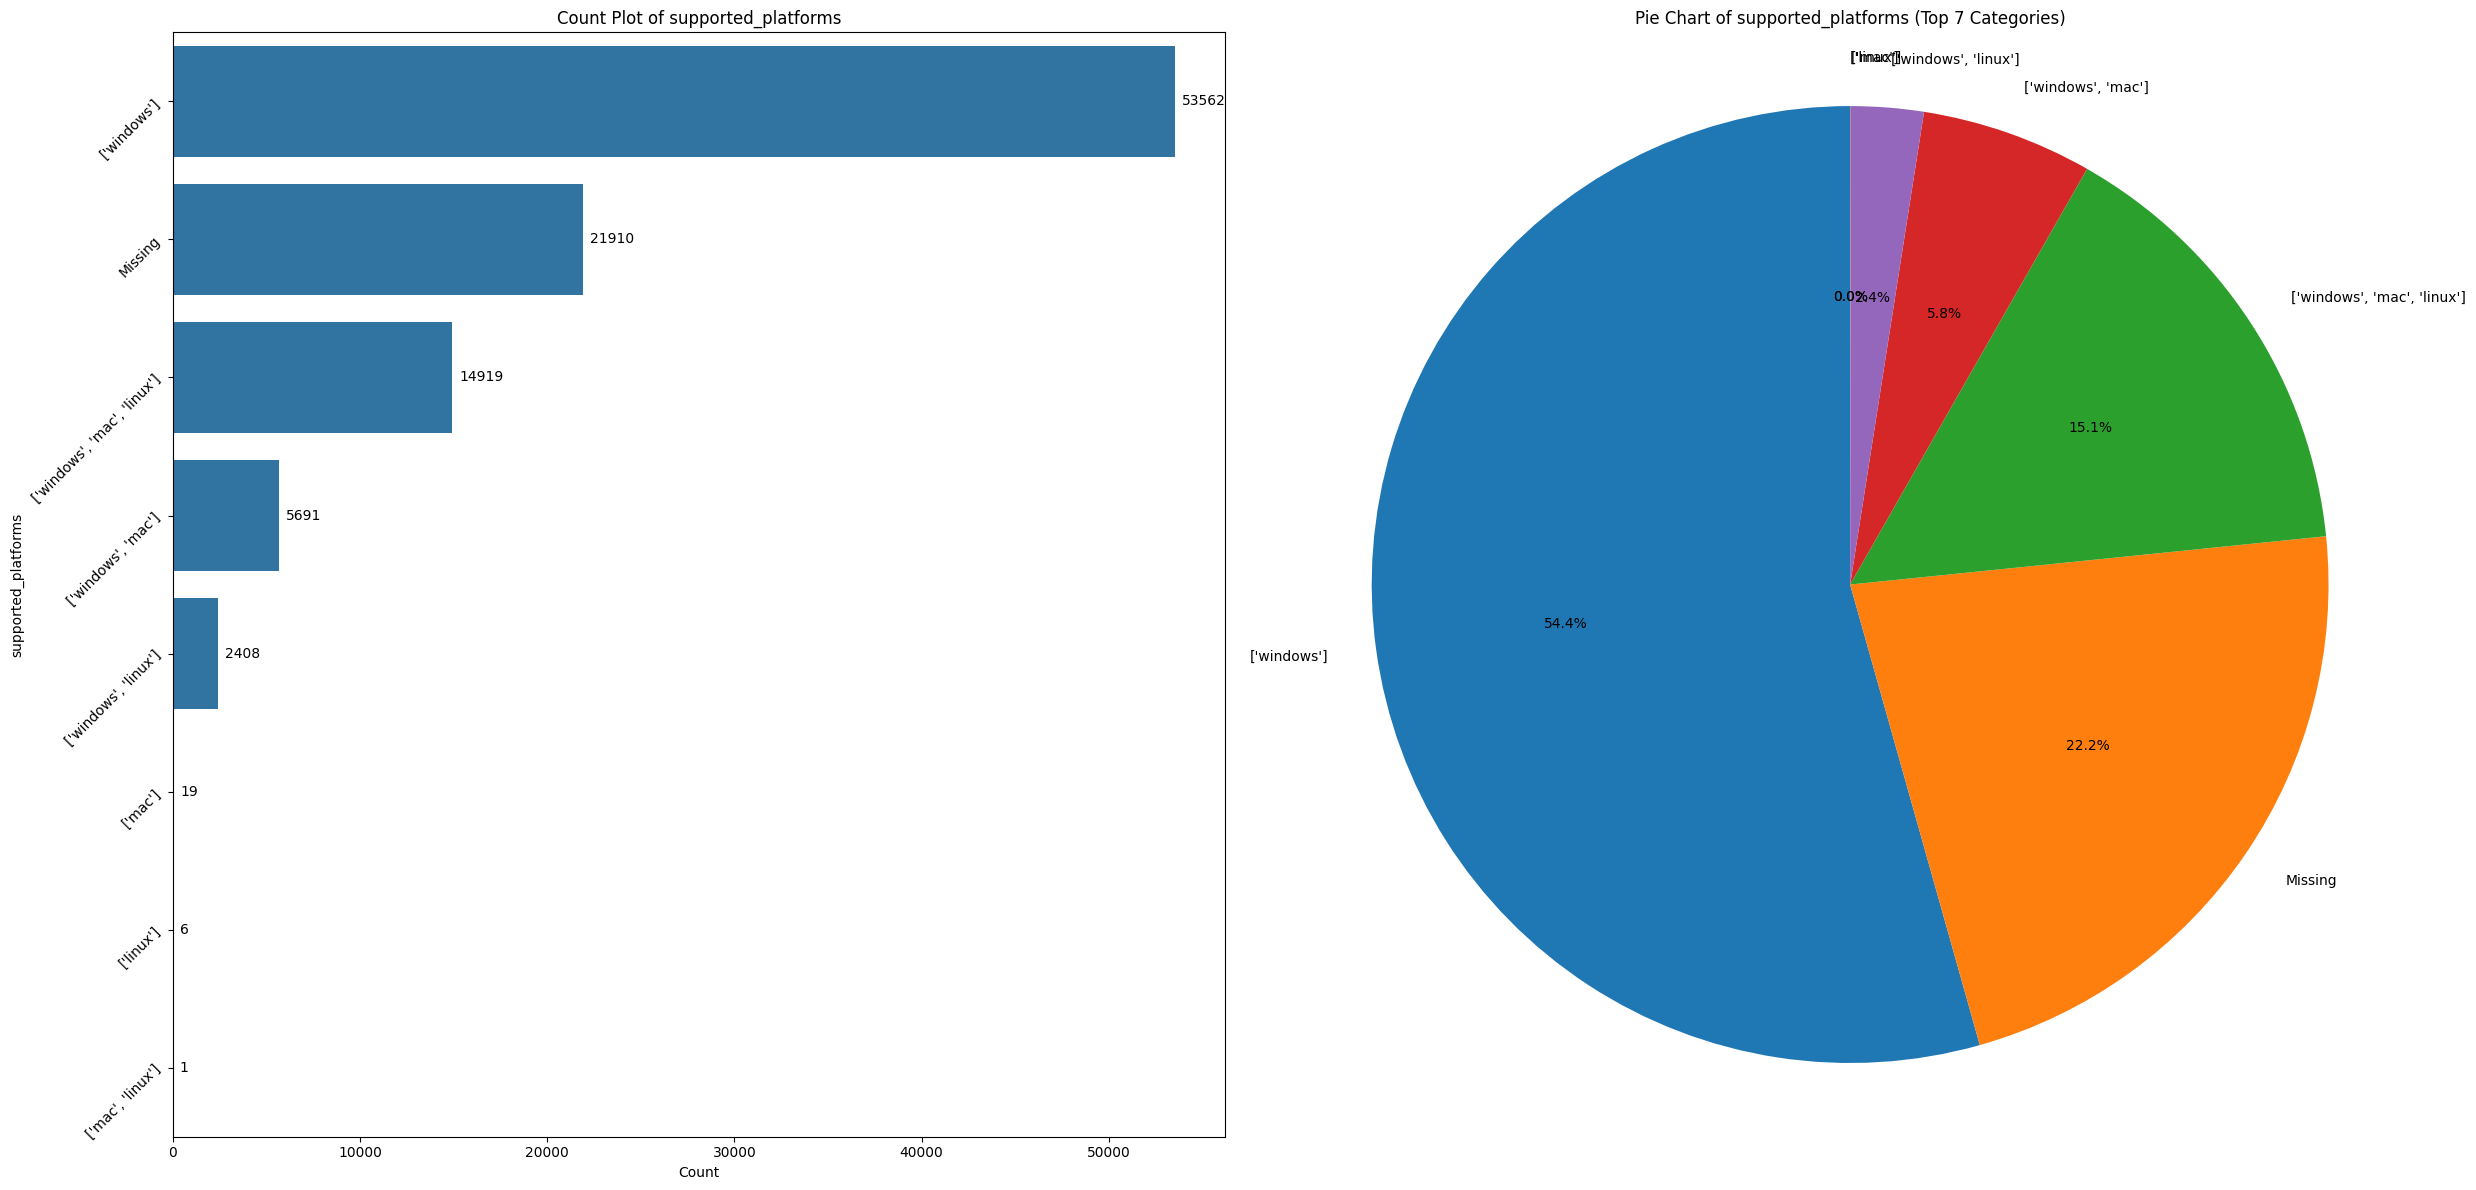

In [868]:
for col in categorical_columns:
    col_data = train[col]
    temp_series = col_data.fillna('Missing')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))
    temp_counts = temp_series.value_counts().head(10)
    sns.countplot(y=temp_series, ax=ax1, order=temp_counts.index)
    ax1.set_title(f"Count Plot of {col}")
    ax1.set_xlabel("Count")
    ax1.set_ylabel(col)
    ax1.tick_params(axis='y', rotation=45)
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', xytext=(5, 0), textcoords='offset points')

    value_counts = temp_series.value_counts().head(7)
    ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f"Pie Chart of {col} (Top {len(value_counts)} Categories)")
    ax2.axis('equal')

    plt.tight_layout()
    plt.show()

# Make it For Test

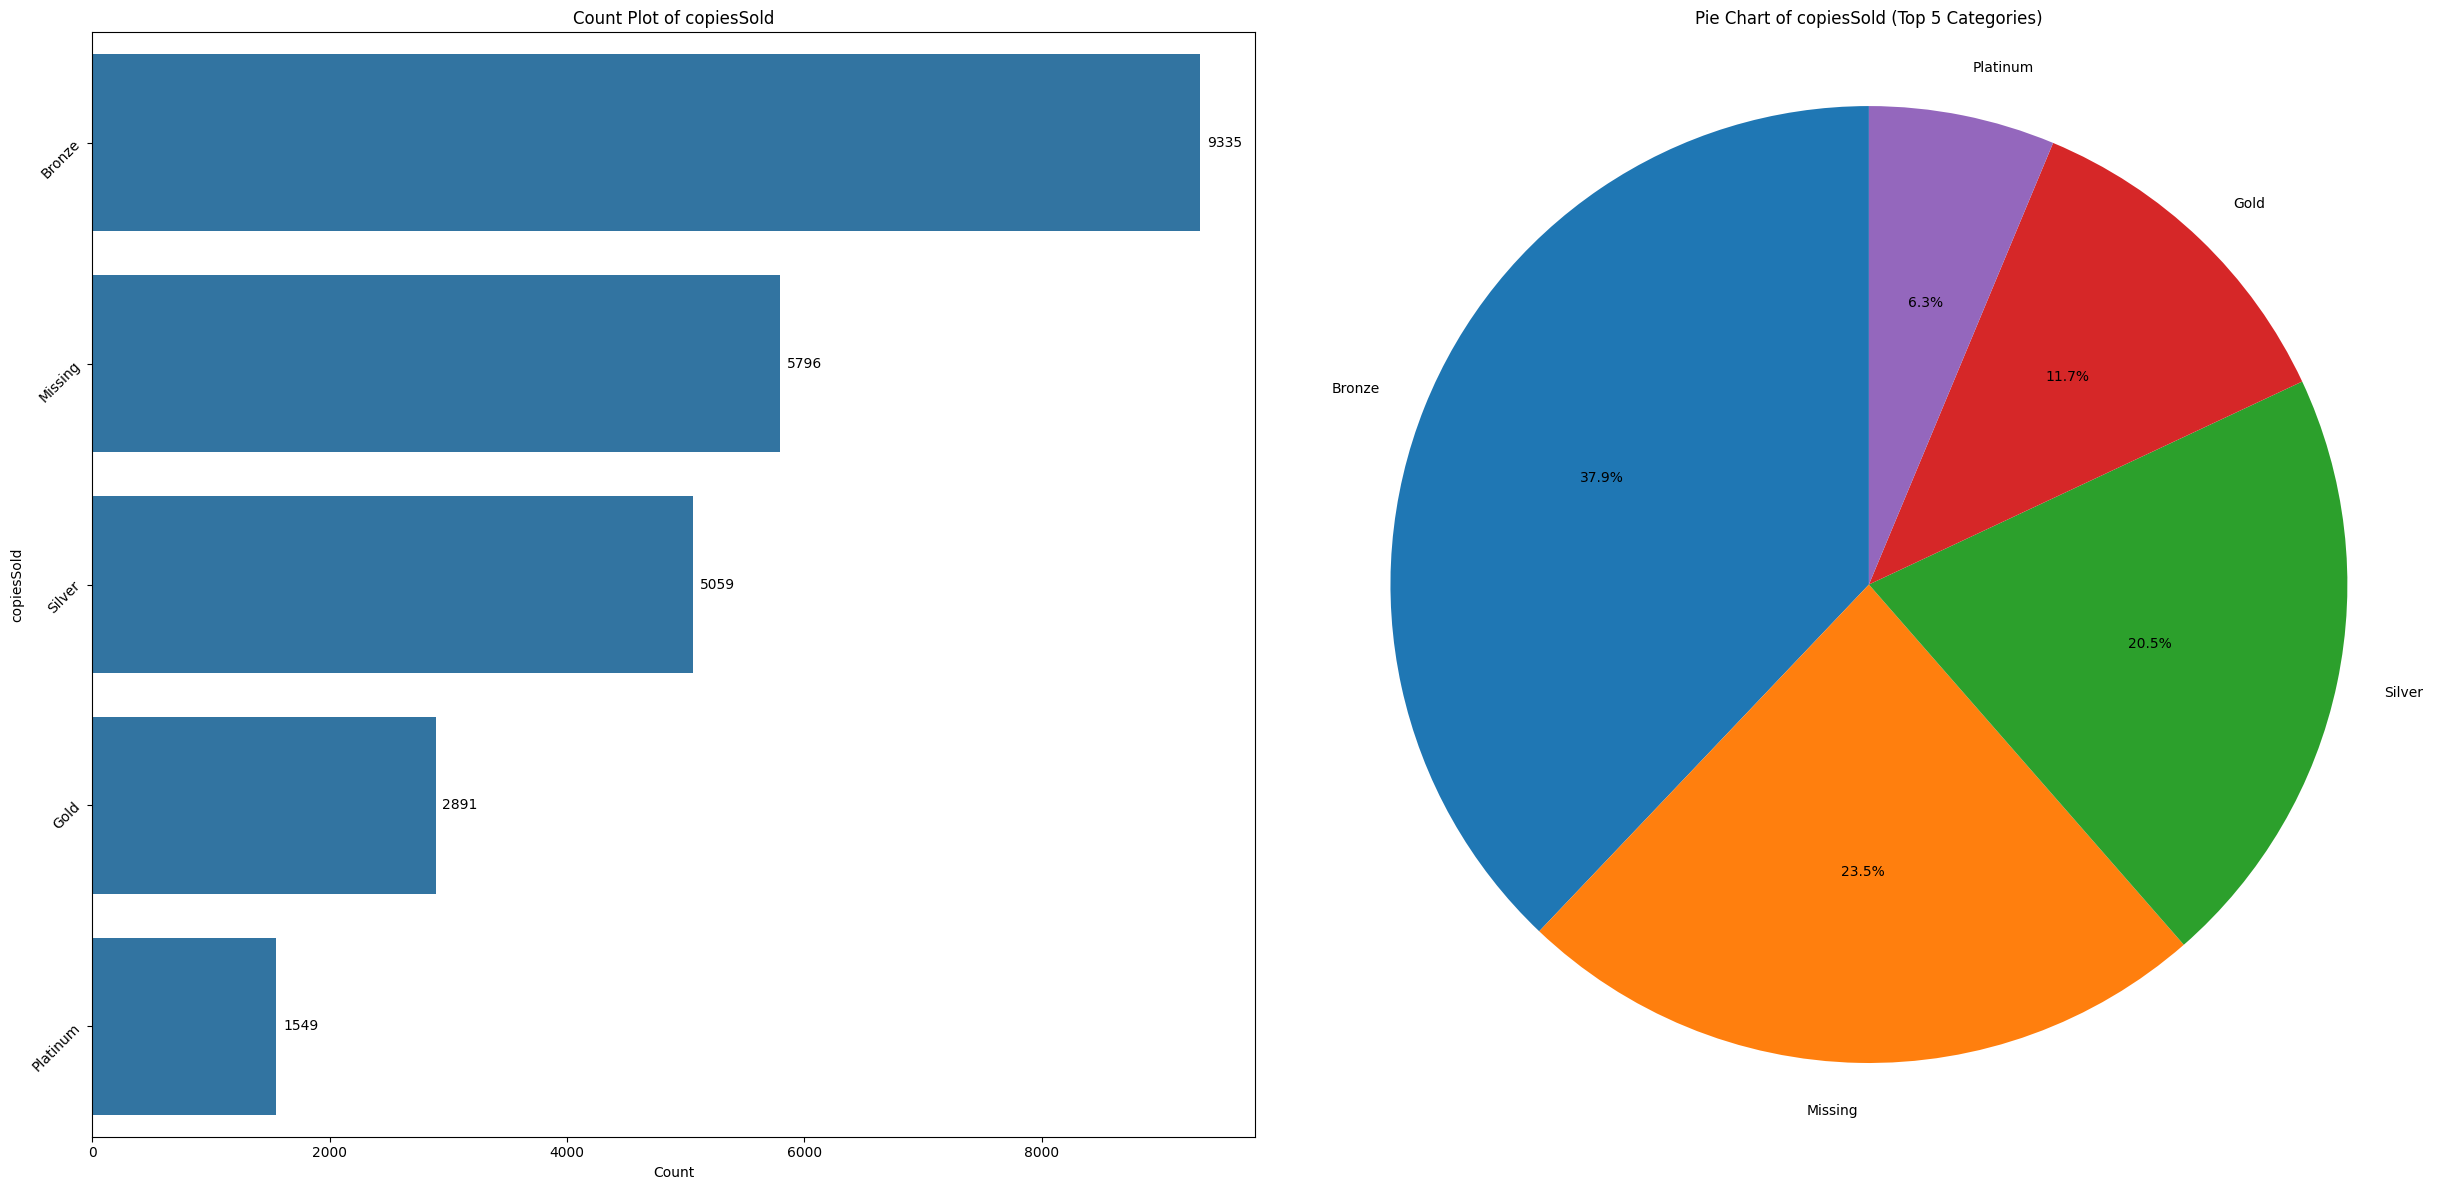

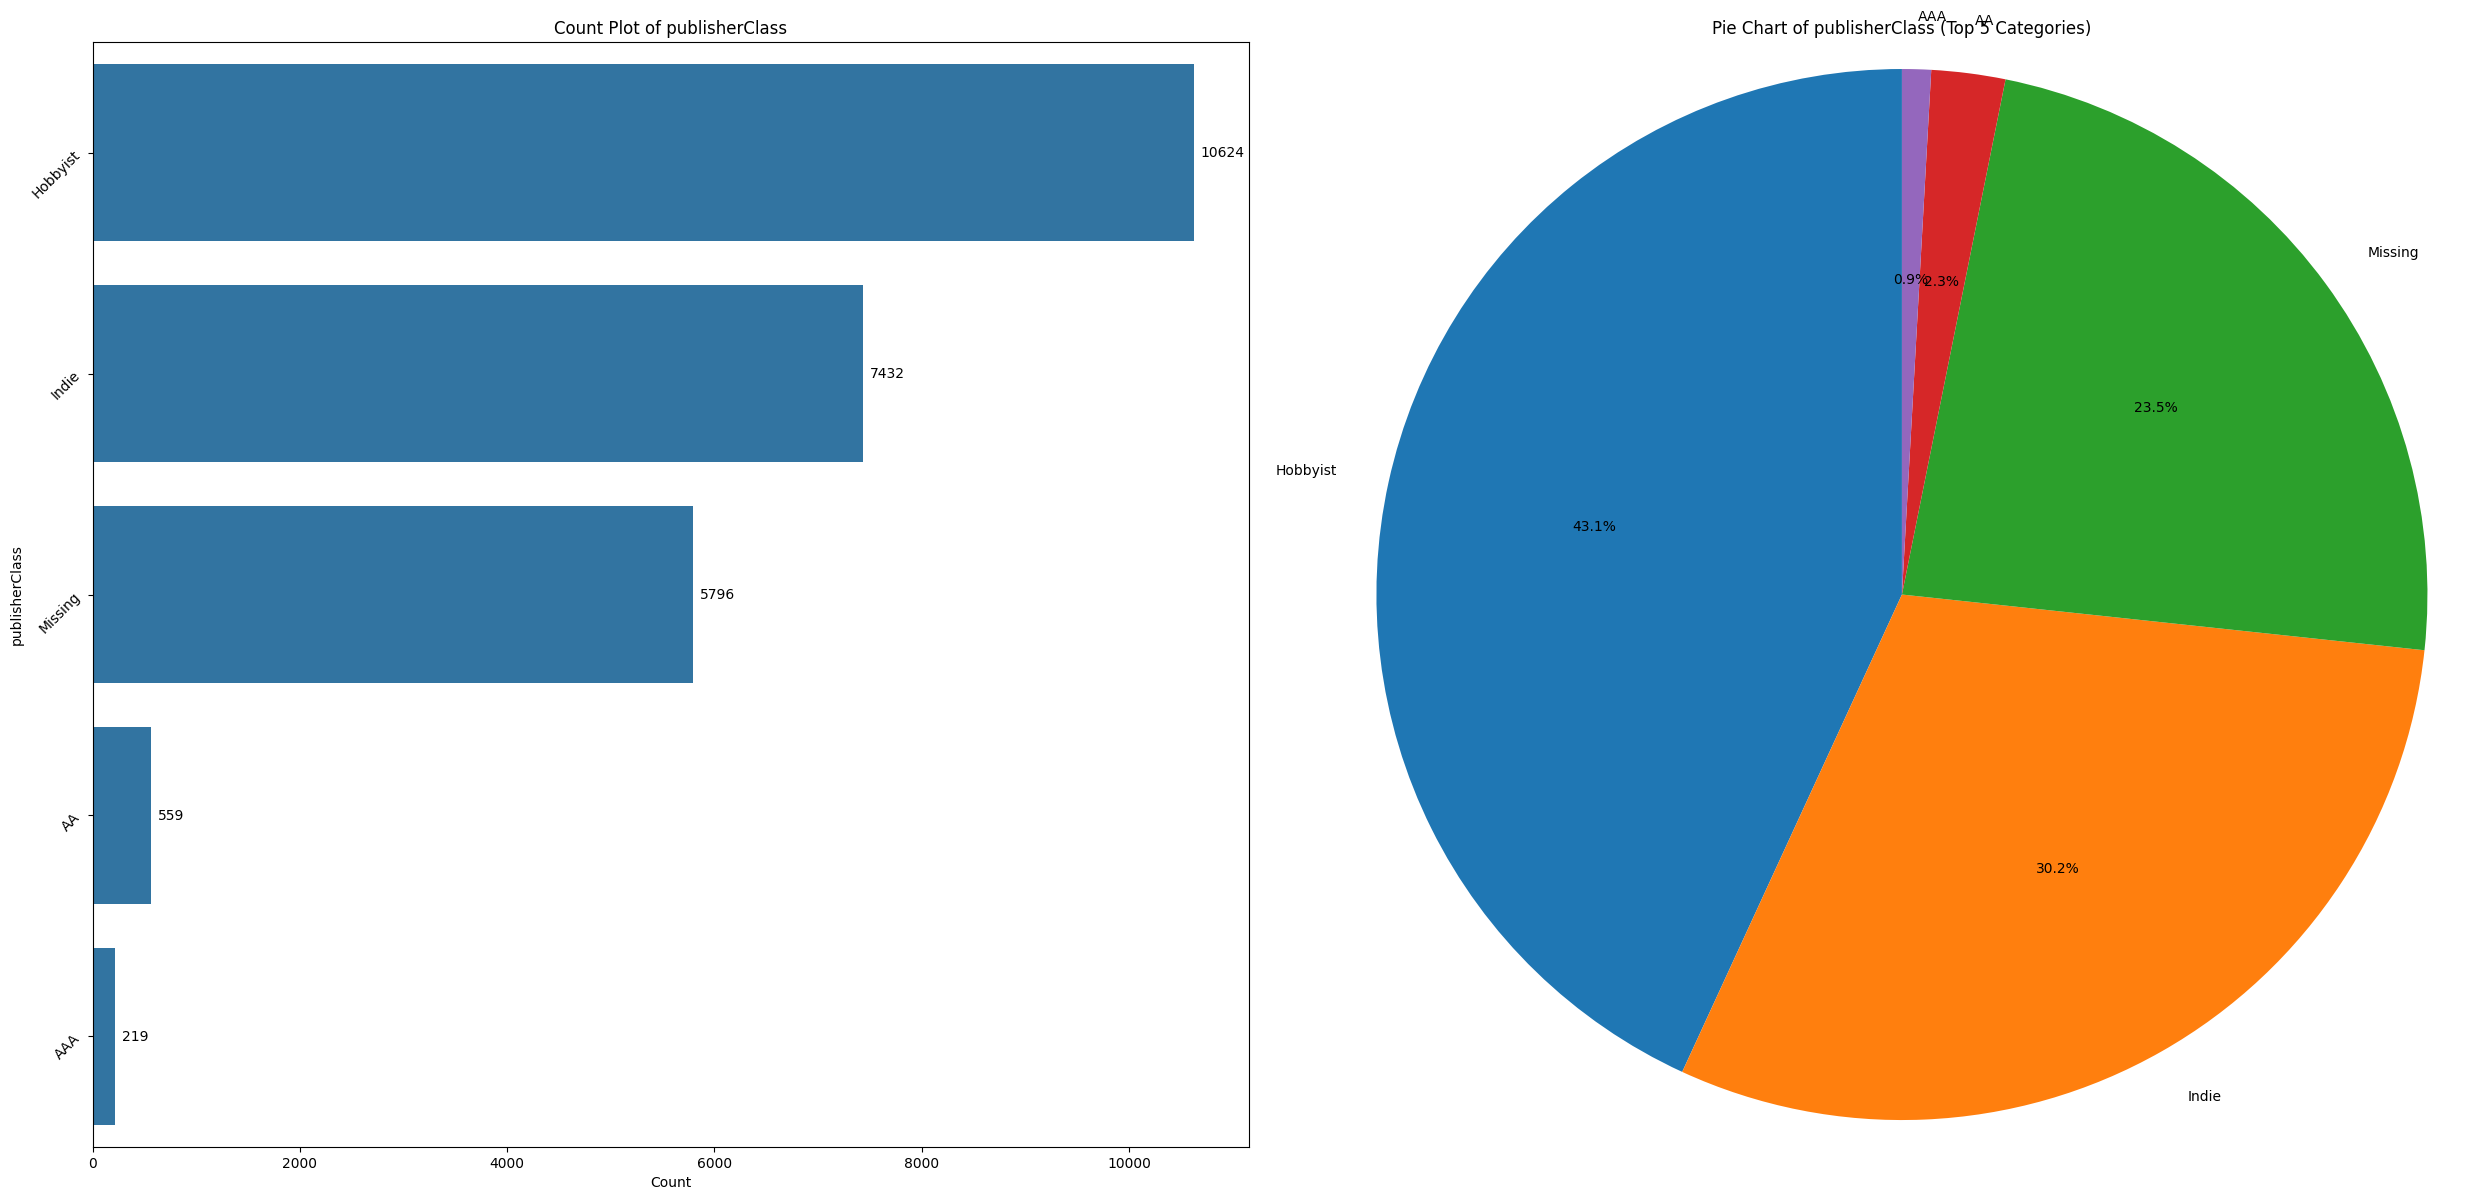

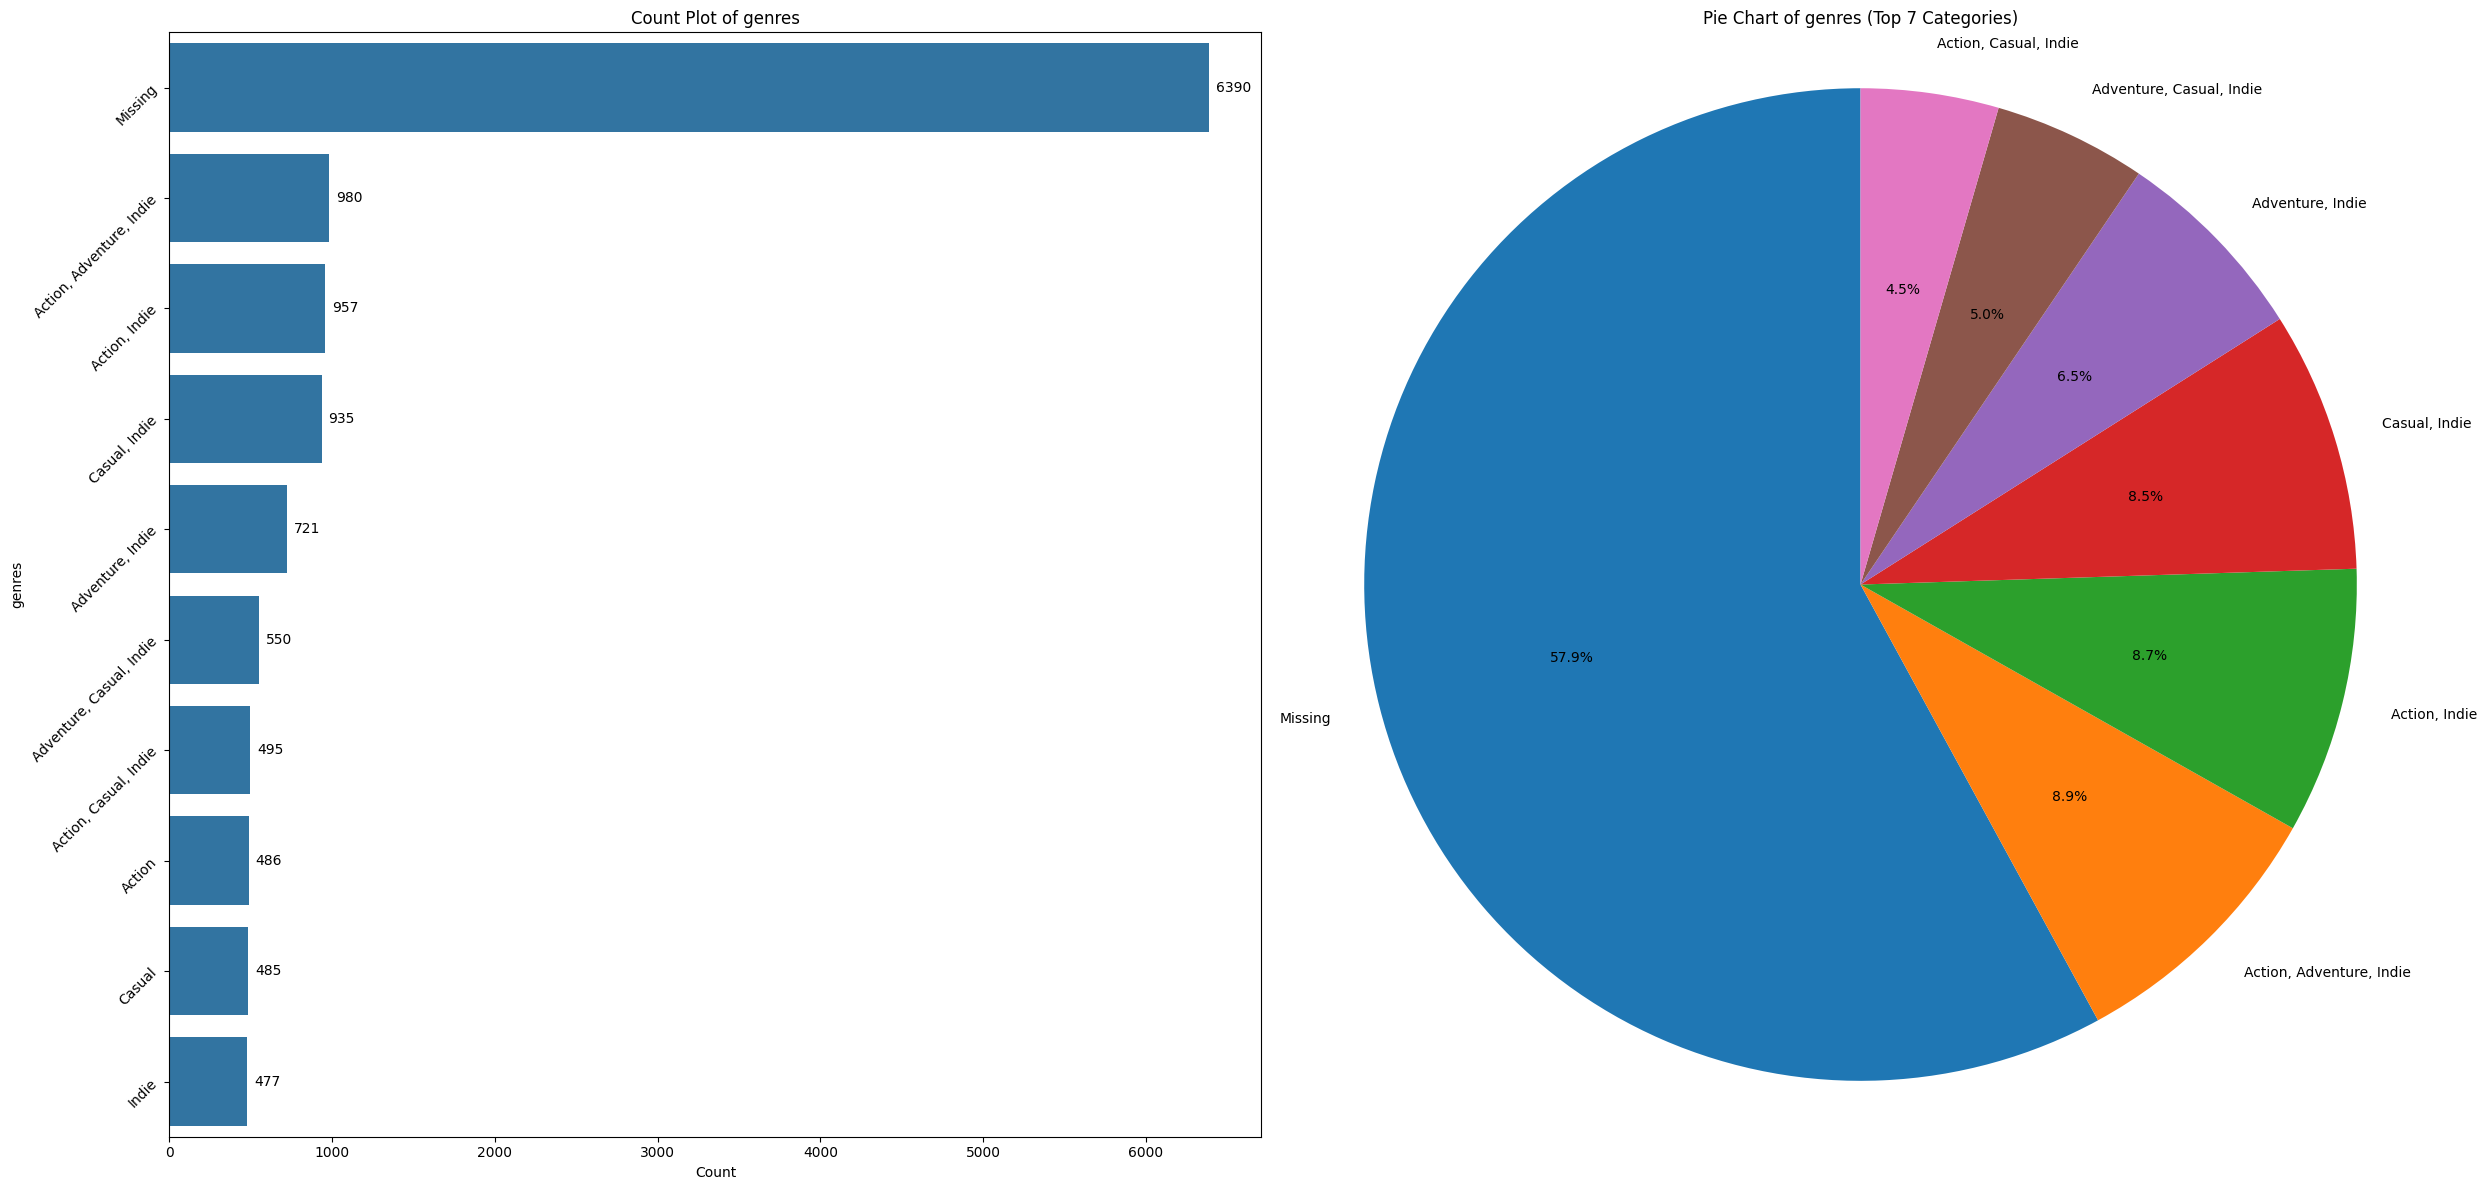

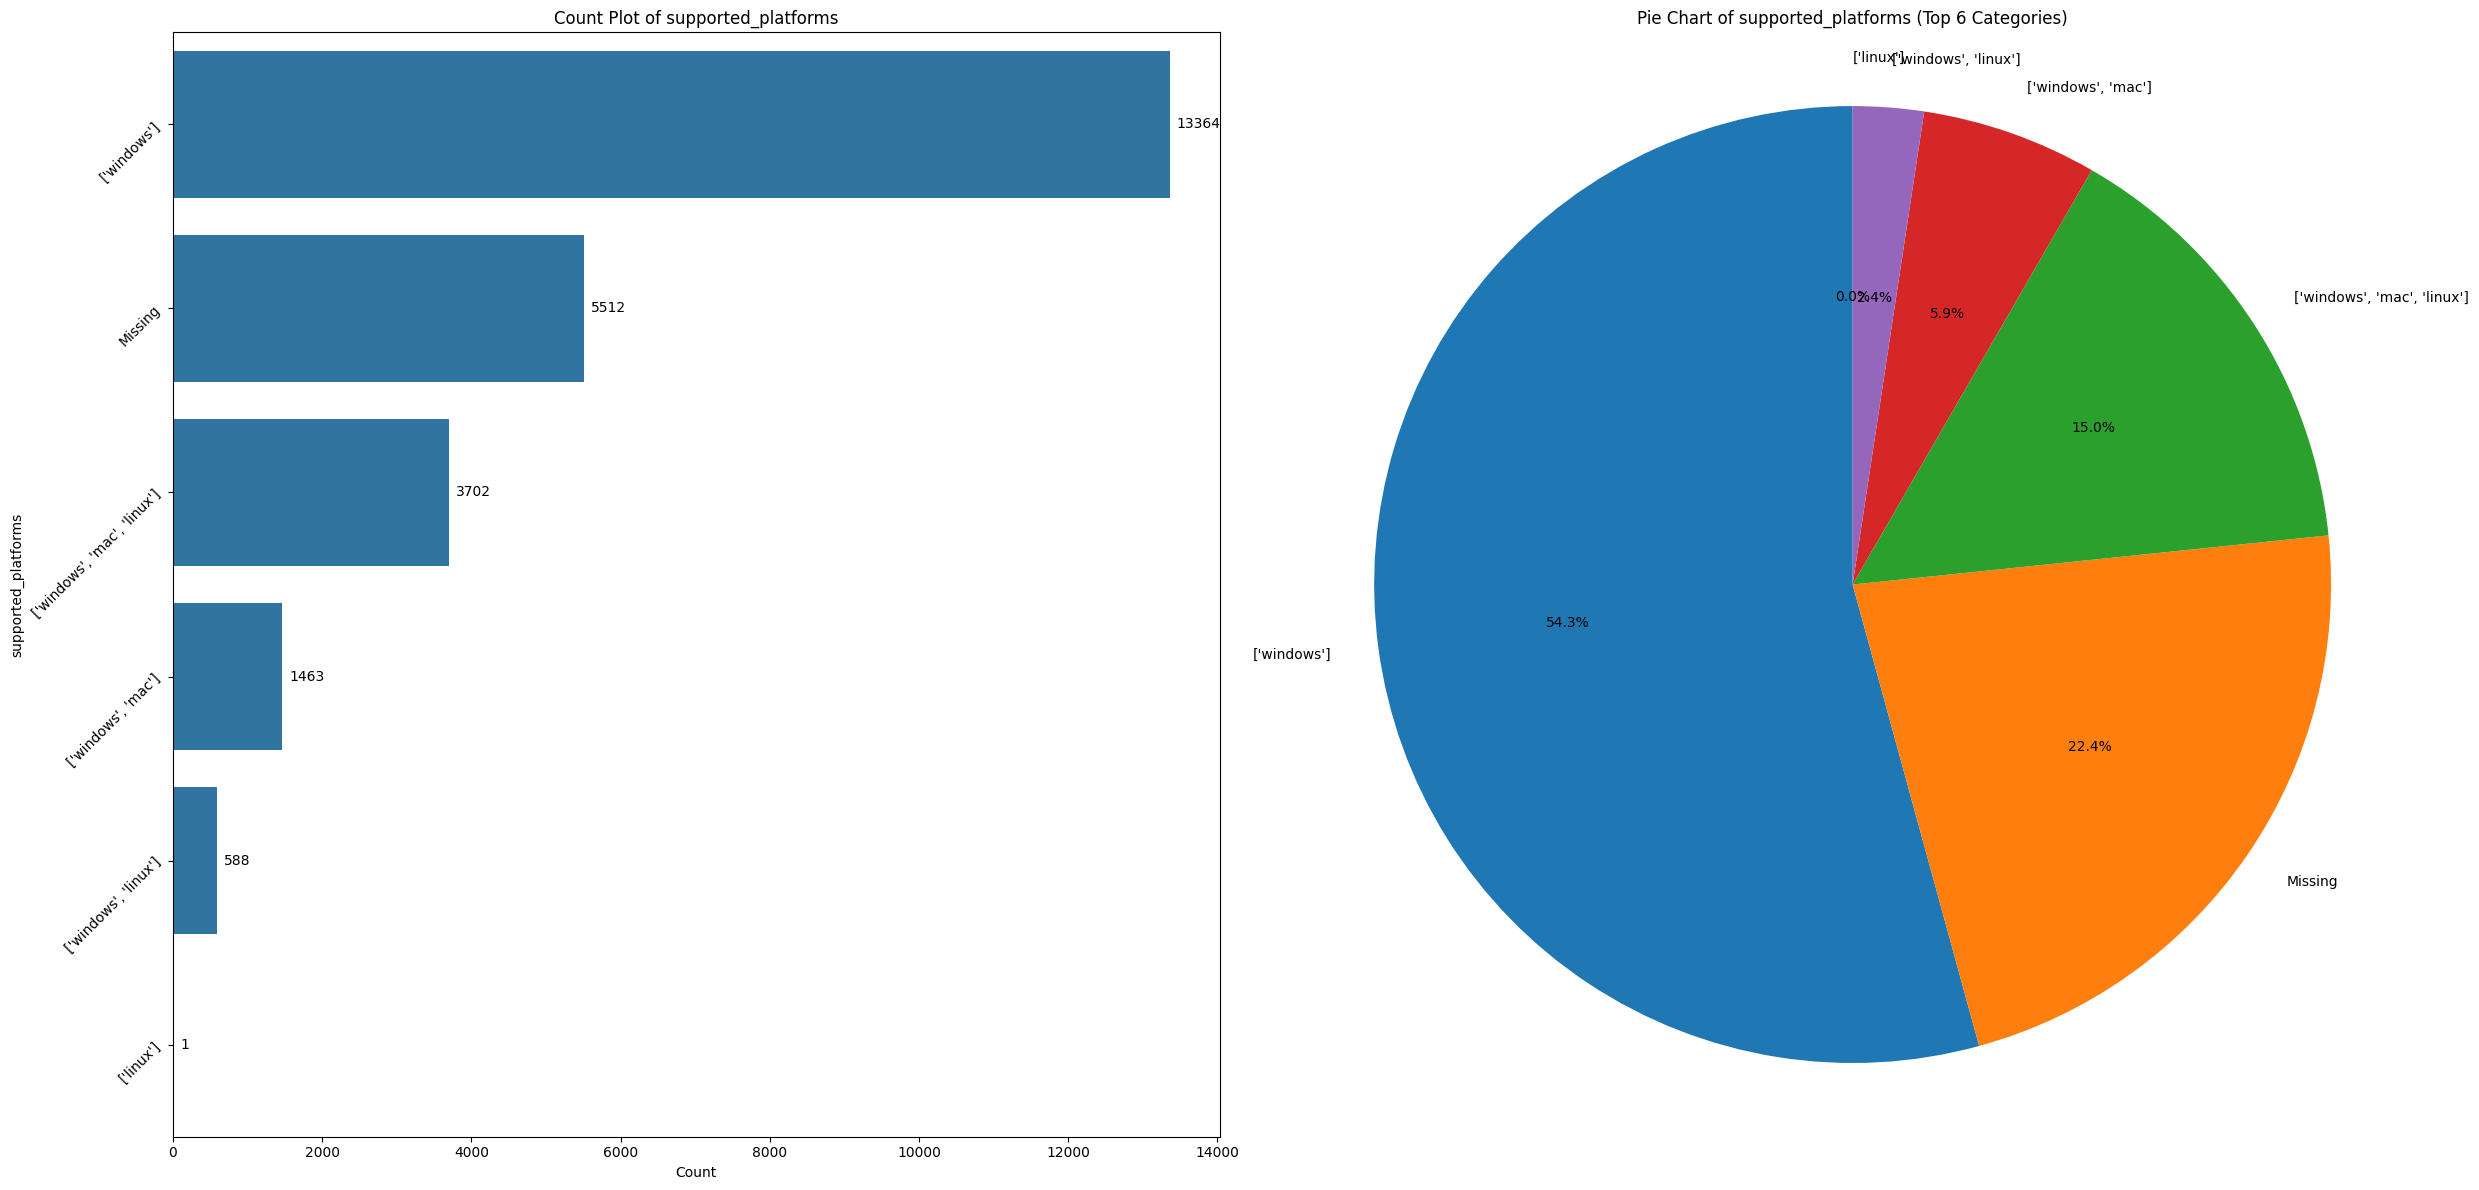

In [869]:
for col in categorical_columns1:
    col_data = test[col]
    temp_series = col_data.fillna('Missing')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))
    temp_counts = temp_series.value_counts().head(10)
    sns.countplot(y=temp_series, ax=ax1, order=temp_counts.index)
    ax1.set_title(f"Count Plot of {col}")
    ax1.set_xlabel("Count")
    ax1.set_ylabel(col)
    ax1.tick_params(axis='y', rotation=45)
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', xytext=(5, 0), textcoords='offset points')
    value_counts = temp_series.value_counts().head(7)
    ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f"Pie Chart of {col} (Top {len(value_counts)} Categories)")
    ax2.axis('equal')

    plt.tight_layout()
    plt.show()

# View The Missing Values In Categorical Data

In [870]:
#In Train Data
for col in categorical_columns:
  te_null_percentage = (train[col].isnull().sum() / len(train)) * 100
  print(f"In train Data --> Column {col}: {te_null_percentage:.2f}% null values")

In train Data --> Column copiesSold: 24.37% null values
In train Data --> Column publisherClass: 24.37% null values
In train Data --> Column genres: 25.90% null values
In train Data --> Column supported_platforms: 22.24% null values


In [871]:
#In Test Data
for col in categorical_columns1:
  te_null_percentage = (test[col].isnull().sum() / len(test)) * 100
  print(f"In Test Data --> Column {col}: {te_null_percentage:.2f}% null values")

In Test Data --> Column copiesSold: 23.53% null values
In Test Data --> Column publisherClass: 23.53% null values
In Test Data --> Column genres: 25.94% null values
In Test Data --> Column supported_platforms: 22.38% null values


# Handle With Genres Column

In [872]:
train_missing_values = train['genres'].isna() | (train['genres'] == '') | (train['genres'].str.strip() == '')
print("Number of missing or empty values:", train_missing_values.sum())

Number of missing or empty values: 25512


In [873]:
test_missing_values = test['genres'].isna() | (test['genres'] == '') | (test['genres'].str.strip() == '')
print("Number of missing or empty values:", test_missing_values.sum())

Number of missing or empty values: 6390


# Replace The Missing Values In Genres Column With Unknown and Encoding it

In [874]:
most_common = train['genres'].mode()[0]
train['genres'] = train['genres'].fillna(most_common)
test['genres'] = test['genres'].fillna(most_common)

In [875]:
# train['genres'].fillna('Unknown', inplace=True)

# test['genres'].fillna('Unknown', inplace=True)

# Handle With Supported_PlatForm Column

In [876]:
print(train['supported_platforms'].isnull().sum())

print(test['supported_platforms'].isnull().sum())

21910
5512


# Replace Missing Values With Mode

In [877]:
most_common = train['supported_platforms'].mode()[0]
train['supported_platforms'] = train['supported_platforms'].fillna(most_common)
test['supported_platforms'] = test['supported_platforms'].fillna(most_common)

In [878]:
print(train['supported_platforms'].isnull().sum())

print(test['supported_platforms'].isnull().sum())

0
0


# Replace Missing Values With Default

In [879]:
# train['supported_platforms'] = train['supported_platforms'].fillna(['windows'])


# test['supported_platforms'] = test['supported_platforms'].fillna(['windows'])

# Handle Publisher_Class Column

# display the number of NUlls in it

In [880]:
trmissing_values = train['publisherClass'].isnull().sum()
print(f"Number of missing values in publisherClass In Train Data: {trmissing_values}")

temissing_values = test['publisherClass'].isnull().sum()
print(f"Number of missing values in publisherClass in Test Data: {temissing_values}")

Number of missing values in publisherClass In Train Data: 24012
Number of missing values in publisherClass in Test Data: 5796


# Replace The Missing Values with Mode

In [881]:
mode_value = train['publisherClass'].mode()[0]
train['publisherClass'].fillna(mode_value, inplace=True)
test['publisherClass'].fillna(mode_value, inplace=True)

# Replace The Missing Values With String "UnKnown"

In [882]:
# train['publisherClass'].fillna('Unknown', inplace=True)

# test['publisherClass'].fillna('Unknown', inplace=True)

# Handle Outliers In Categorical Data

In [883]:
# Method 1: Frequency-based outlier replacement (train and test)
def handle_categorical_outliers_frequency(train_df, test_df, column, min_freq_threshold=0.05):
    freq = train_df[column].value_counts(normalize=True)
    rare_categories = freq[freq < min_freq_threshold].index
    most_frequent = freq.idxmax()
    train_df[column] = train_df[column].replace(rare_categories, most_frequent)
    test_df[column] = test_df[column].replace(rare_categories, most_frequent)
    return train_df, test_df

In [884]:
for col in categorical_columns:
  if col in train.columns:
    train, test = handle_categorical_outliers_frequency(train.copy(), test.copy(), col, min_freq_threshold=0.05)
    print("Training data after frequency-based replacement:")
    print(train[col].value_counts())
    print("\nTest data after frequency-based replacement:")
    print(test[col].value_counts())

Training data after frequency-based replacement:
copiesSold
Bronze      36920
Silver      19905
Gold        11814
Platinum     5865
Name: count, dtype: int64

Test data after frequency-based replacement:
copiesSold
Bronze      9335
Silver      5059
Gold        2891
Platinum    1549
Name: count, dtype: int64
Training data after frequency-based replacement:
publisherClass
Hobbyist    68644
Indie       29872
Name: count, dtype: int64

Test data after frequency-based replacement:
publisherClass
Hobbyist    17198
Indie        7432
Name: count, dtype: int64
Training data after frequency-based replacement:
genres
Action, Adventure, Indie    98516
Name: count, dtype: int64

Test data after frequency-based replacement:
genres
Action, Adventure, Indie                                                                                           24338
Software Training, Early Access                                                                                        3
Action, Casual, Free To Play, M

In [885]:
# # Method 2: Grouping rare categories into 'Other' (train and test)
# def handle_categorical_outliers_grouping(train_df, test_df, column, min_freq_threshold=0.05):
#     freq = train_df[column].value_counts(normalize=True)
#     rare_categories = freq[freq < min_freq_threshold].index
#     train_df[column] = train_df[column].where(~train_df[column].isin(rare_categories), 'Other')
#     test_df[column] = test_df[column].where(~test_df[column].isin(rare_categories), 'Other')
#     return train_df, test_df

In [886]:
# for col in categorical_columns:
#   if col in train.columns:
#     train, test = handle_categorical_outliers_grouping(train.copy(), test.copy(), col , min_freq_threshold=0.05)
#     print("\nTraining data after grouping rare categories:")
#     print(train_df_group['fruit'].value_counts())
#     print("\nTest data after grouping rare categories:")
#     print(test_df_group['fruit'].value_counts())

# Validate This Step

In [887]:
trmissing_values = train['publisherClass'].isnull().sum()
print(f"Number of missing values in publisherClass In Train Data: {trmissing_values}")

temissing_values = test['publisherClass'].isnull().sum()
print(f"Number of missing values in publisherClass in Test Data: {temissing_values}")

Number of missing values in publisherClass In Train Data: 0
Number of missing values in publisherClass in Test Data: 0


# Encoding The Genres Column

In [888]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import joblib
train['genres_list'] = train['genres'].str.split(',\s*')
test['genres_list'] = test['genres'].str.split(',\s*')
mlb = MultiLabelBinarizer()
genres_encoded_train = mlb.fit_transform(train['genres_list'])
genres_df_train = pd.DataFrame(genres_encoded_train, columns=mlb.classes_, index=train.index)
train = pd.concat([train, genres_df_train], axis=1)
train = train.drop(['genres', 'genres_list'], axis=1)
genres_encoded_test = mlb.transform(test['genres_list'])
genres_df_test = pd.DataFrame(genres_encoded_test, columns=mlb.classes_, index=test.index)
test = pd.concat([test, genres_df_test], axis=1)
test = test.drop(['genres', 'genres_list'], axis=1)
joblib.dump(mlb, 'mlb_genres.pkl')
print("Encoded genres columns:", mlb.classes_.tolist())
assert set(train.columns) == set(test.columns), "Train and test columns do not match!"

Encoded genres columns: ['Action', 'Adventure', 'Indie']


# Encoding the supported_platforms Column

In [889]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import joblib
train['supported_platforms'] = train['supported_platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
test['supported_platforms'] = test['supported_platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
mlb = MultiLabelBinarizer()
encoded_platforms_train = mlb.fit_transform(train['supported_platforms'])
encoded_df_train = pd.DataFrame(encoded_platforms_train, columns=mlb.classes_, index=train.index)
train = pd.concat([train.drop('supported_platforms', axis=1), encoded_df_train], axis=1)
encoded_platforms_test = mlb.transform(test['supported_platforms'])
encoded_df_test = pd.DataFrame(encoded_platforms_test, columns=mlb.classes_, index=test.index)
test = pd.concat([test.drop('supported_platforms', axis=1), encoded_df_test], axis=1)
joblib.dump(mlb, 'mlb_platforms.pkl')
print("Train columns:", train.columns.tolist())
print("Test columns:", test.columns.tolist())

Train columns: ['price', 'copiesSold', 'publisherClass', 'reviewScore', 'steam_achievements', 'steam_trading_cards', 'workshop_support', 'achievements_total', 'timestamp', 'days_since_start', 'Action', 'Adventure', 'Indie', 'linux', 'mac', 'windows']
Test columns: ['price', 'copiesSold', 'publisherClass', 'reviewScore', 'steam_achievements', 'steam_trading_cards', 'workshop_support', 'achievements_total', 'timestamp', 'days_since_start', 'Action', 'Adventure', 'Indie', 'linux', 'mac', 'windows']


# Encoding the Publisher Class Column

In [890]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
encoder = LabelEncoder()
train['publisherClass_encoded'] = encoder.fit_transform(train['publisherClass'])
train = train.drop('publisherClass', axis=1)
test['publisherClass_encoded'] = encoder.transform(test['publisherClass'])
test = test.drop('publisherClass', axis=1)
missing_cols = [col for col in train.columns if col not in test.columns]
for col in missing_cols:
    test[col] = 0
test = test[train.columns]
print("Encoded publisherClass column: publisherClass_encoded")
assert set(train.columns) == set(test.columns), "Train and test columns do not match!"

Encoded publisherClass column: publisherClass_encoded


In [891]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd
# import numpy as np
# encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)
# train_publisher = train[['publisherClass']]
# encoded_train = encoder.fit_transform(train_publisher)
# encoded_columns = [f"publisherClass_{cat}" for cat in encoder.categories_[0][1:]]
# encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=train.index)
# train = train.drop('publisherClass', axis=1)
# train = pd.concat([train, encoded_train_df], axis=1)
# test_publisher = test[['publisherClass']]
# encoded_test = encoder.transform(test_publisher)
# encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=test.index)
# test = test.drop('publisherClass', axis=1)
# test = pd.concat([test, encoded_test_df], axis=1)
# missing_cols = [col for col in train.columns if col not in test.columns]
# for col in missing_cols:
#     test[col] = 0
# test = test[train.columns]
# print("Encoded publisherClass columns:", [col for col in train.columns if col.startswith('publisherClass_encoded')])
# assert set(train.columns) == set(test.columns), "Train and test columns do not match!"

# Encoding The Target Column (CopiesSold)

In [892]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
encoder = LabelEncoder()
train['copiesSold_encoded'] = encoder.fit_transform(train['copiesSold'])
train = train.drop('copiesSold', axis=1)
test['copiesSold_encoded'] = encoder.transform(test['copiesSold'])
test = test.drop('copiesSold', axis=1)
missing_cols = [col for col in train.columns if col not in test.columns]
for col in missing_cols:
    test[col] = 0
test = test[train.columns]
print("Encoded CopiesSold column: CopiesSold_encoded")
assert set(train.columns) == set(test.columns), "Train and test columns do not match!"

Encoded CopiesSold column: CopiesSold_encoded


# Make Statistical Analysis After Handle With Categorical Columns

In [893]:
train.describe()

price   reviewScore  steam_achievements  steam_trading_cards  \
count  98516.000000  98516.000000        98516.000000         98516.000000   
mean       5.909531     74.338288            0.612043             0.137358   
std        4.629598     18.463764            0.487287             0.344227   
min        0.000000     36.500000            0.000000             0.000000   
25%        2.990000     68.000000            0.000000             0.000000   
50%        4.990000     71.879094            1.000000             0.000000   
75%        7.990000     89.000000            1.000000             0.000000   
max       15.490000    100.000000            1.000000             1.000000   

       workshop_support  achievements_total     timestamp  days_since_start  \
count      98516.000000             98516.0  9.851600e+04      98516.000000   
mean           0.105922                18.0  1.681594e+18      19463.893357   
std            0.307739                 0.0  8.236475e+16        953.295724   
min            0.000000                18.0 -8.640000e+13          0.000000   
25%            0.000000                18.0  1.665706e+18      19280.000000   
50%            0.000000                18.0  1.722470e+18      19937.000000   
75%            0.000000                18.0  1.722470e+18      19937.000000   
max            1.000000                18.0  1.974931e+18      22859.000000   

        Action  Adventure    Indie         linux           mac  windows  \
count  98516.0    98516.0  98516.0  98516.000000  98516.000000  98516.0   
mean       1.0        1.0      1.0      0.151437      0.209205      1.0   
std        0.0        0.0      0.0      0.358476      0.406743      0.0   
min        1.0        1.0      1.0      0.000000      0.000000      1.0   
25%        1.0        1.0      1.0      0.000000      0.000000      1.0   
50%        1.0        1.0      1.0      0.000000      0.000000      1.0   
75%        1.0        1.0      1.0      0.000000      0.000000      1.0   
max        1.0        1.0      1.0      1.000000      1.000000      1.0   

       publisherClass_encoded  copiesSold_encoded  
count            98516.000000        98516.000000  
mean                 0.303220            1.820080  
std                  0.459652            1.662414  
min                  0.000000            0.000000  
25%                  0.000000            0.000000  
50%                  0.000000            2.000000  
75%                  1.000000            3.000000  
max                  1.000000            4.000000

In [894]:
train.dtypes

price                     float64
reviewScore               float64
steam_achievements          int64
steam_trading_cards         int64
workshop_support            int64
achievements_total        float64
timestamp                   int64
days_since_start            int64
Action                      int64
Adventure                   int64
Indie                       int64
linux                       int64
mac                         int64
windows                     int64
publisherClass_encoded      int64
copiesSold_encoded          int64
dtype: object

In [895]:
test.describe()

price   reviewScore  steam_achievements  steam_trading_cards  \
count  24630.000000  24630.000000        24630.000000         24630.000000   
mean       5.875659     74.470005            0.608283             0.135526   
std        4.640212     18.681166            0.488144             0.342291   
min        0.000000     36.500000            0.000000             0.000000   
25%        1.990000     67.000000            0.000000             0.000000   
50%        4.990000     71.879094            1.000000             0.000000   
75%        7.990000     89.000000            1.000000             0.000000   
max       15.490000    100.000000            1.000000             1.000000   

       workshop_support  achievements_total     timestamp  days_since_start  \
count      24630.000000             24630.0  2.463000e+04      24630.000000   
mean           0.104222                18.0  1.681996e+18       8918.549168   
std            0.305555                 0.0  8.160975e+16        944.557326   
min            0.000000                18.0  9.114336e+17          0.000000   
25%            0.000000                18.0  1.668730e+18       8765.000000   
50%            0.000000                18.0  1.722470e+18       9387.000000   
75%            0.000000                18.0  1.722470e+18       9387.000000   
max            1.000000                18.0  1.848701e+18      10848.000000   

             Action     Adventure         Indie         linux           mac  \
count  24630.000000  24630.000000  24630.000000  24630.000000  24630.000000   
mean       0.993707      0.992814      0.993707      0.150305      0.209704   
std        0.079081      0.084469      0.079081      0.357377      0.407105   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       windows  publisherClass_encoded  copiesSold_encoded  
count  24630.0            24630.000000        24630.000000  
mean       1.0                0.301746            1.800650  
std        0.0                0.459025            1.655438  
min        1.0                0.000000            0.000000  
25%        1.0                0.000000            0.000000  
50%        1.0                0.000000            2.000000  
75%        1.0                1.000000            3.000000  
max        1.0                1.000000            4.000000

In [896]:
test.dtypes

price                     float64
reviewScore               float64
steam_achievements          int64
steam_trading_cards         int64
workshop_support            int64
achievements_total        float64
timestamp                   int64
days_since_start            int64
Action                      int64
Adventure                   int64
Indie                       int64
linux                       int64
mac                         int64
windows                     int64
publisherClass_encoded      int64
copiesSold_encoded          int64
dtype: object

# Validate That No Missing Values In all Columns

In [897]:
for col in train.columns:
  trrr_null_percentage = (train[col].isnull().sum() / len(train)) * 100
  print(f"In Train Data --> Column {col}: {trrr_null_percentage:.2f}% null values")

In Train Data --> Column price: 0.00% null values
In Train Data --> Column reviewScore: 0.00% null values
In Train Data --> Column steam_achievements: 0.00% null values
In Train Data --> Column steam_trading_cards: 0.00% null values
In Train Data --> Column workshop_support: 0.00% null values
In Train Data --> Column achievements_total: 0.00% null values
In Train Data --> Column timestamp: 0.00% null values
In Train Data --> Column days_since_start: 0.00% null values
In Train Data --> Column Action: 0.00% null values
In Train Data --> Column Adventure: 0.00% null values
In Train Data --> Column Indie: 0.00% null values
In Train Data --> Column linux: 0.00% null values
In Train Data --> Column mac: 0.00% null values
In Train Data --> Column windows: 0.00% null values
In Train Data --> Column publisherClass_encoded: 0.00% null values
In Train Data --> Column copiesSold_encoded: 0.00% null values


In [898]:
for col in test.columns:
  teee_null_percentage = (test[col].isnull().sum() / len(test)) * 100
  print(f"In Test Data --> Column {col}: {teee_null_percentage:.2f}% null values")

In Test Data --> Column price: 0.00% null values
In Test Data --> Column reviewScore: 0.00% null values
In Test Data --> Column steam_achievements: 0.00% null values
In Test Data --> Column steam_trading_cards: 0.00% null values
In Test Data --> Column workshop_support: 0.00% null values
In Test Data --> Column achievements_total: 0.00% null values
In Test Data --> Column timestamp: 0.00% null values
In Test Data --> Column days_since_start: 0.00% null values
In Test Data --> Column Action: 0.00% null values
In Test Data --> Column Adventure: 0.00% null values
In Test Data --> Column Indie: 0.00% null values
In Test Data --> Column linux: 0.00% null values
In Test Data --> Column mac: 0.00% null values
In Test Data --> Column windows: 0.00% null values
In Test Data --> Column publisherClass_encoded: 0.00% null values
In Test Data --> Column copiesSold_encoded: 0.00% null values


In [899]:
test.to_csv('test.csv', index=False)

# Make Visualization For All data

## Make in Train

Skewness of price: 0.820 (Highly skewed)


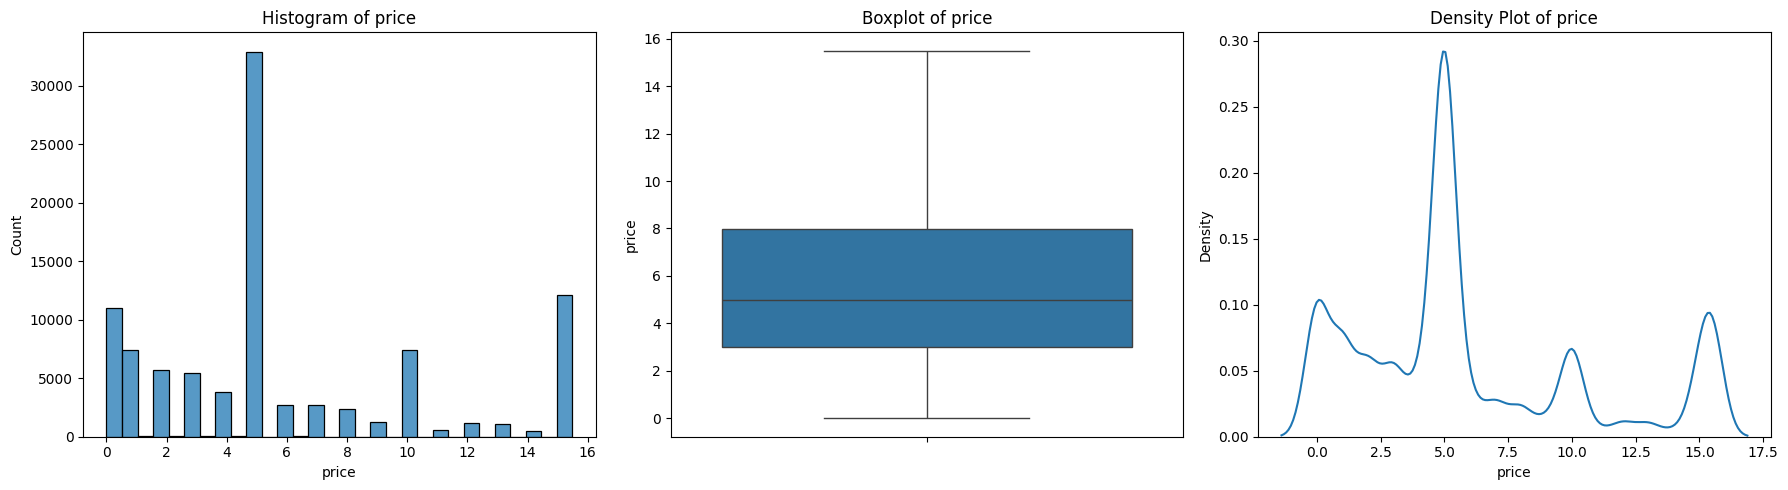

Skewness of reviewScore: -0.533 


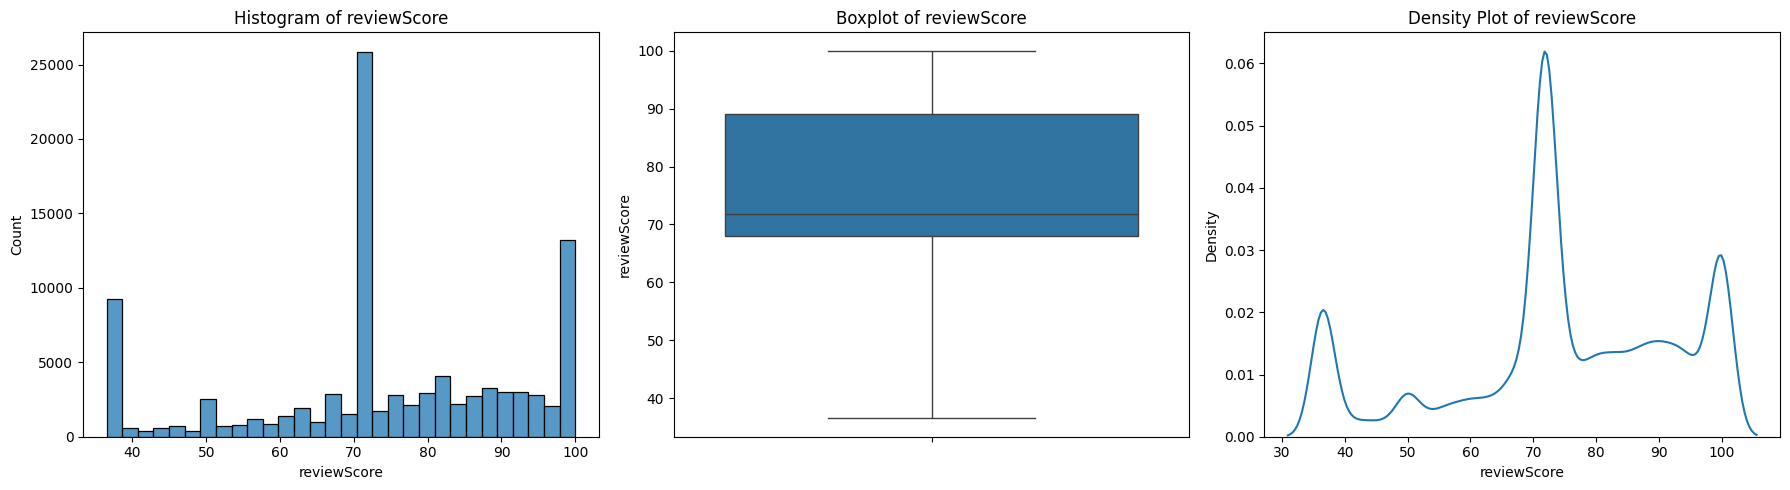

Skewness of steam_achievements: -0.460 


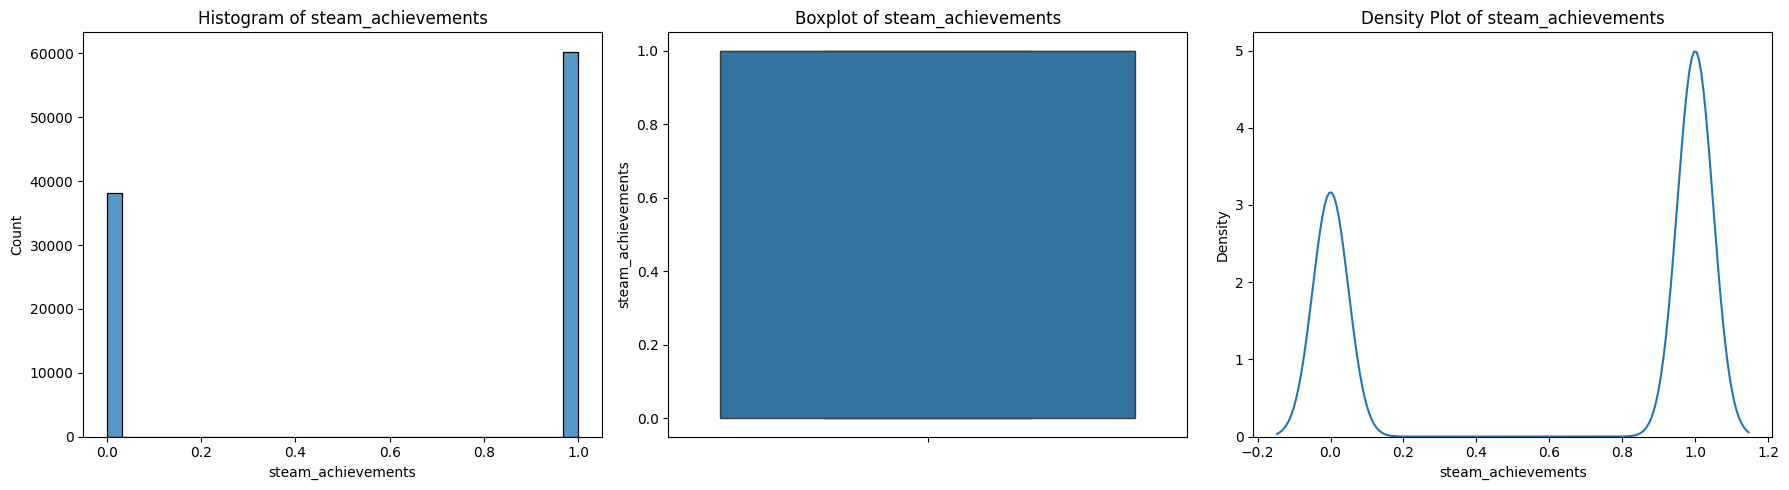

Skewness of steam_trading_cards: 2.107 (Highly skewed)


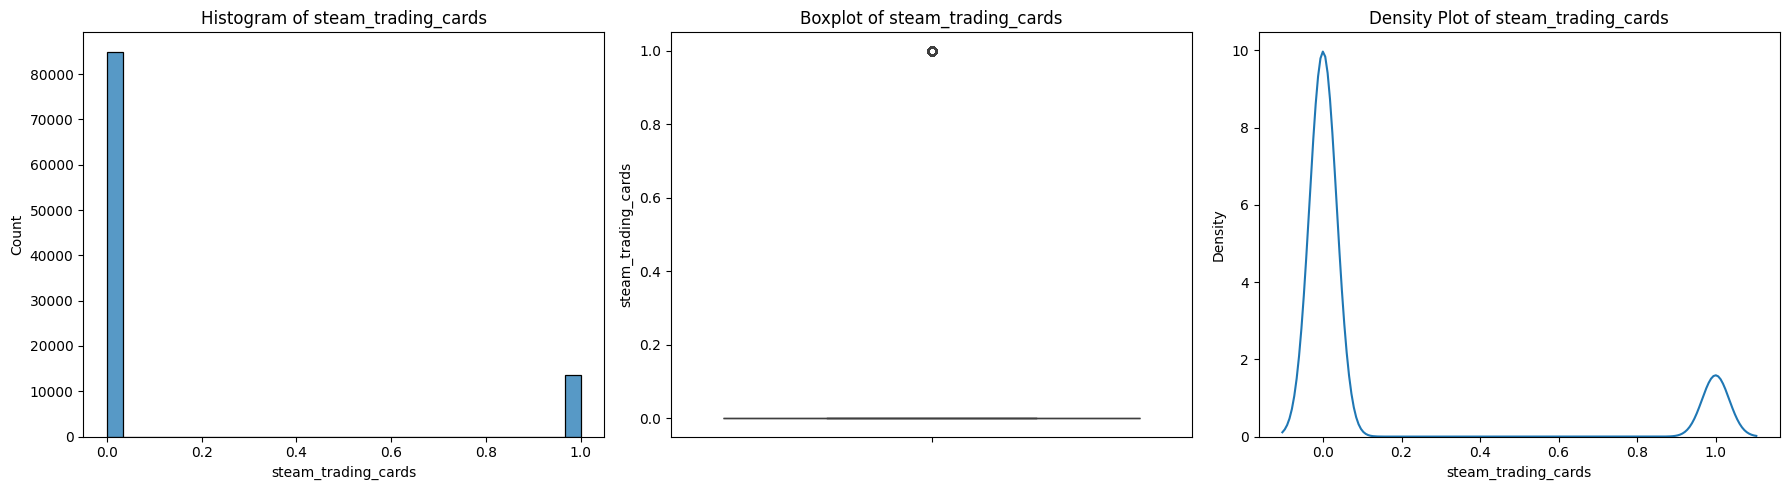

Skewness of workshop_support: 2.561 (Highly skewed)


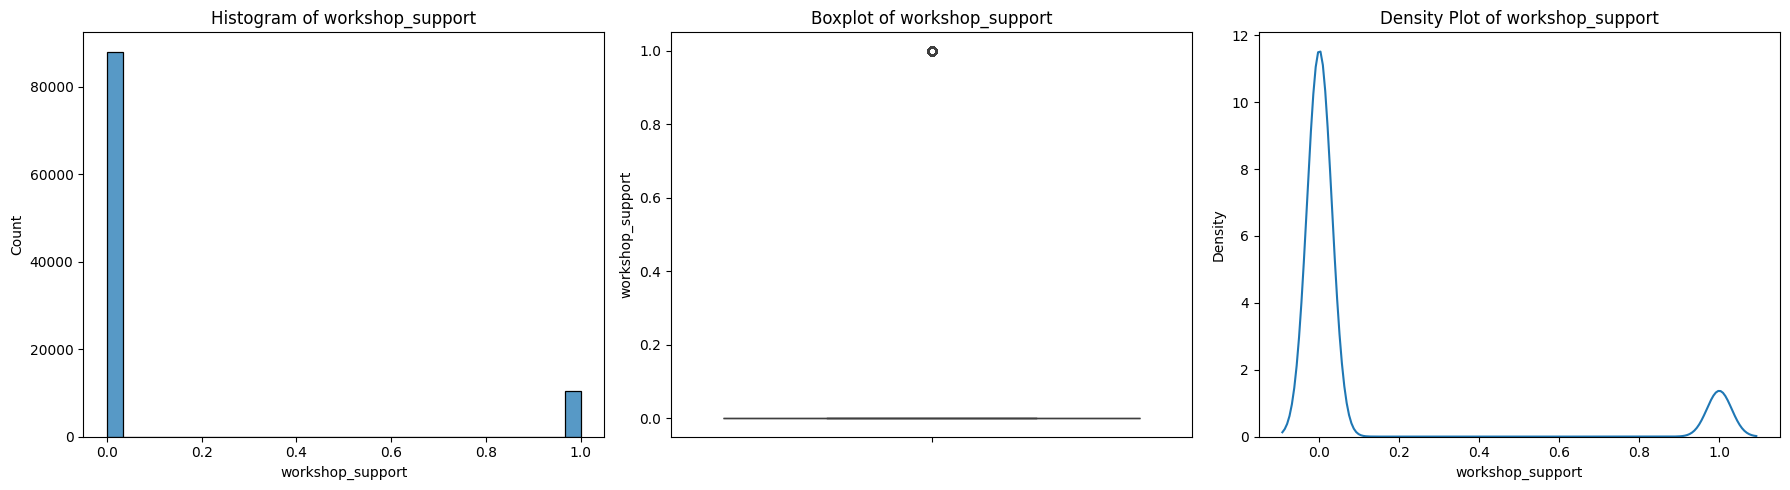

Skewness of achievements_total: nan 


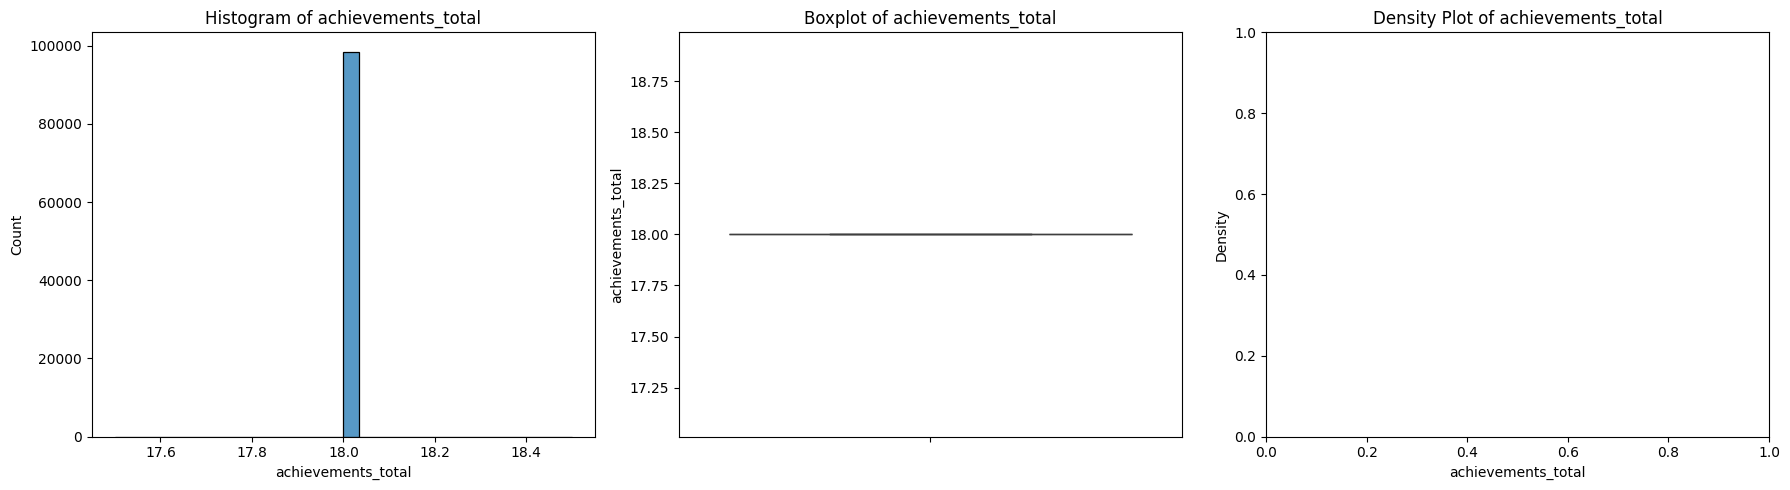

Skewness of timestamp: -2.451 (Highly skewed)


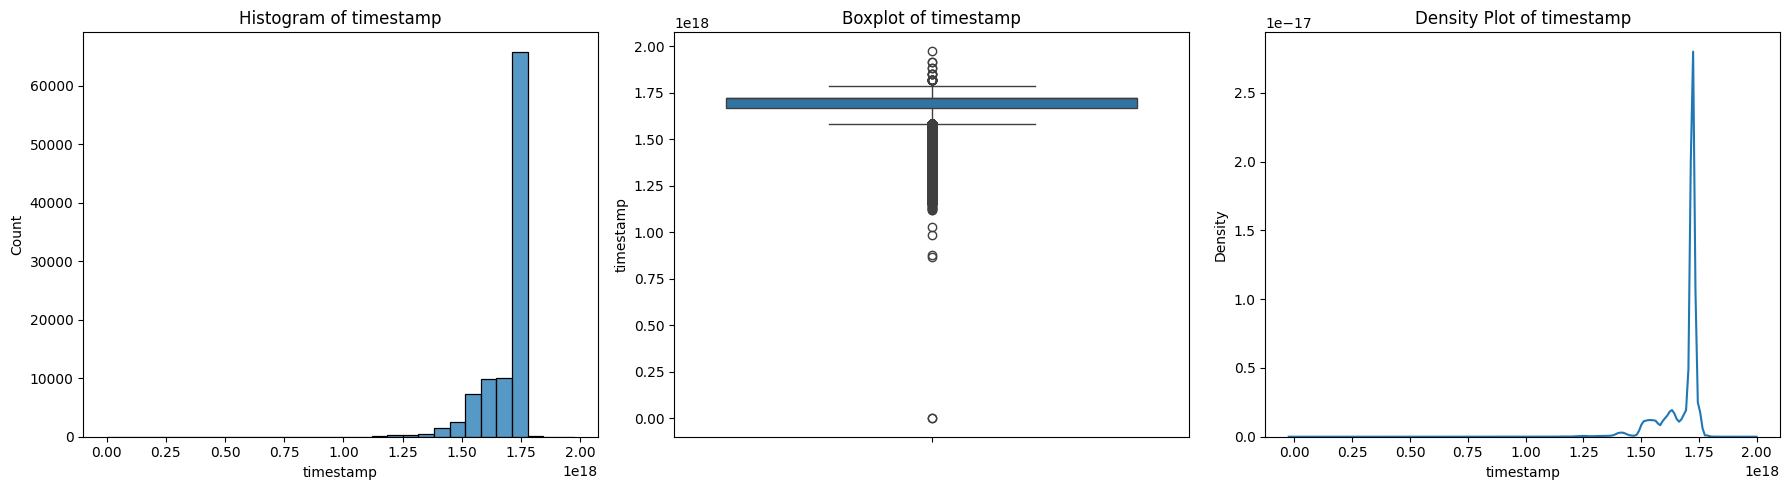

Skewness of days_since_start: -2.451 (Highly skewed)


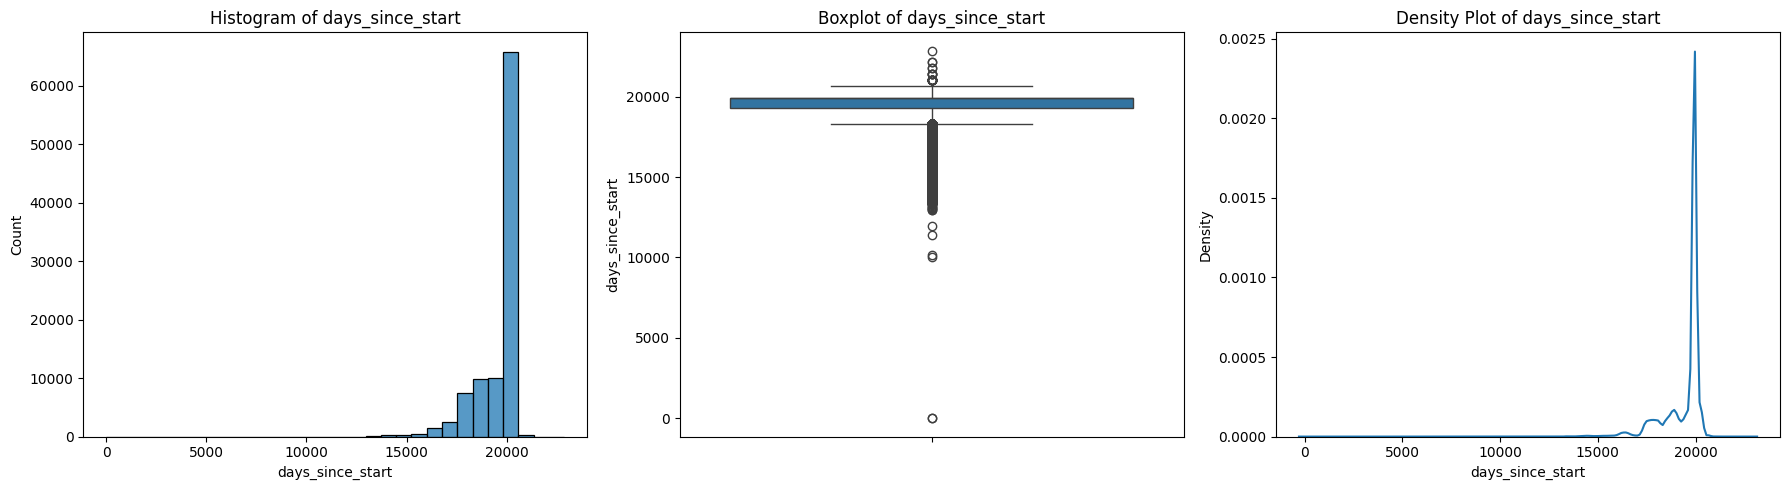

Skewness of Action: nan 


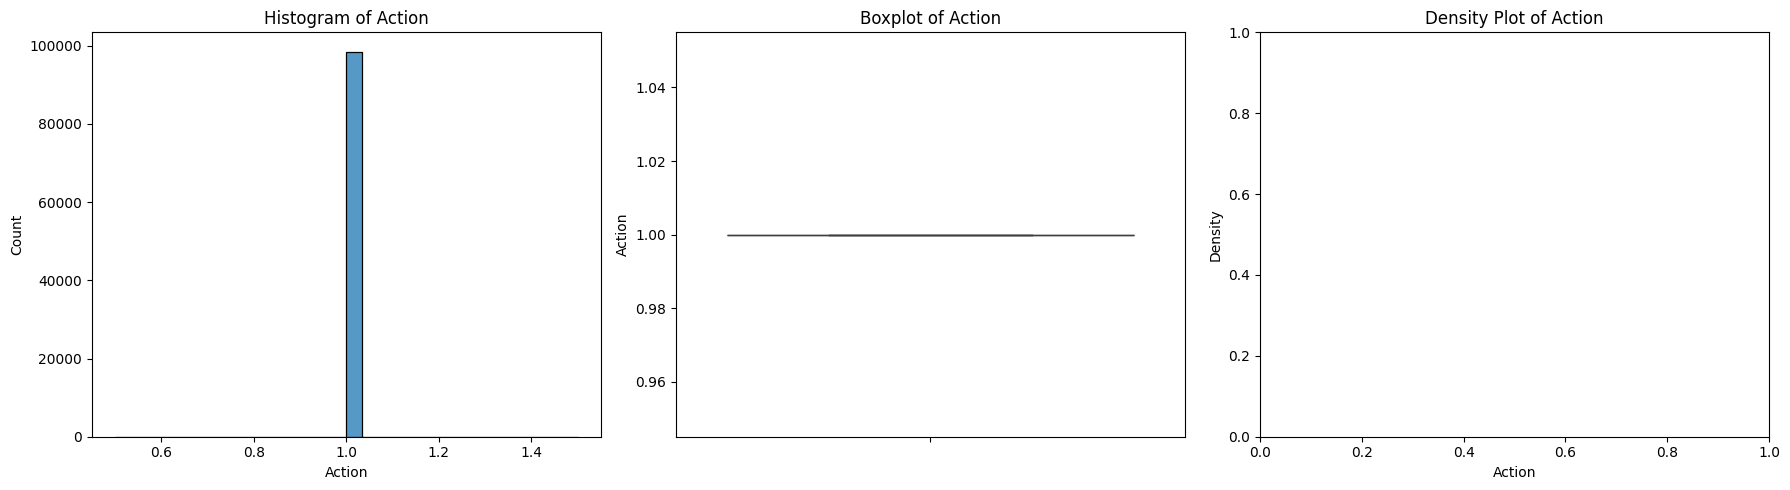

Skewness of Adventure: nan 


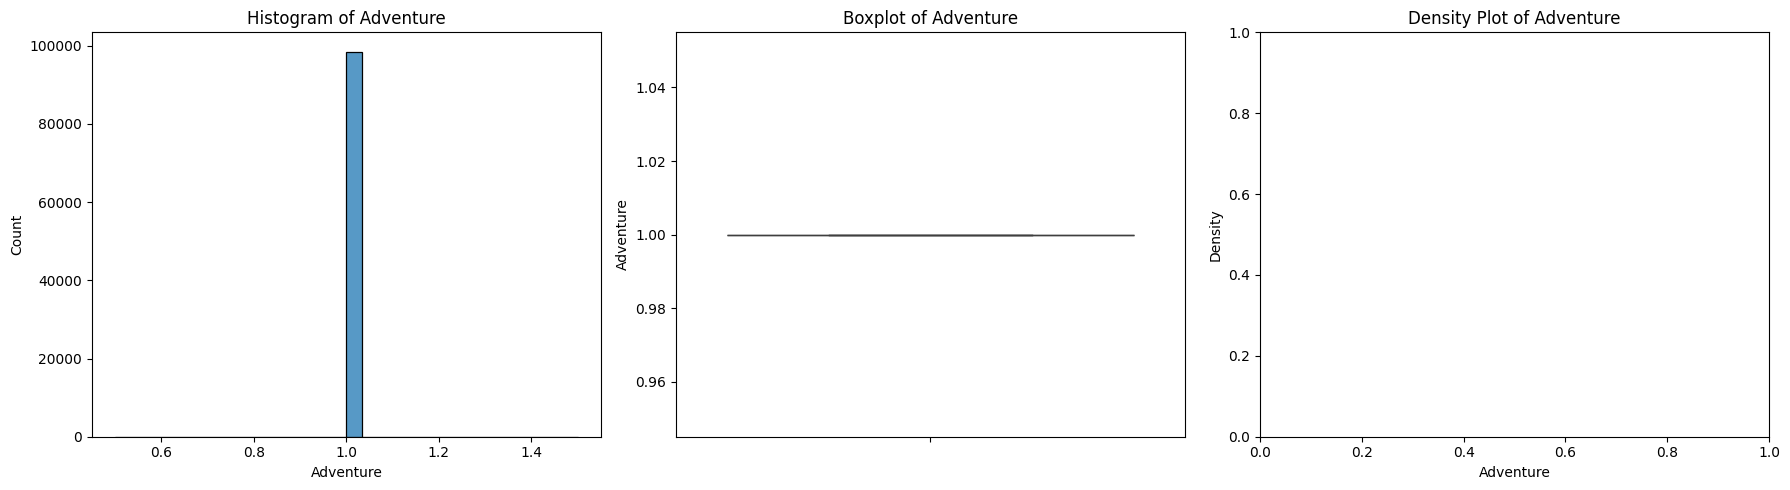

Skewness of Indie: nan 


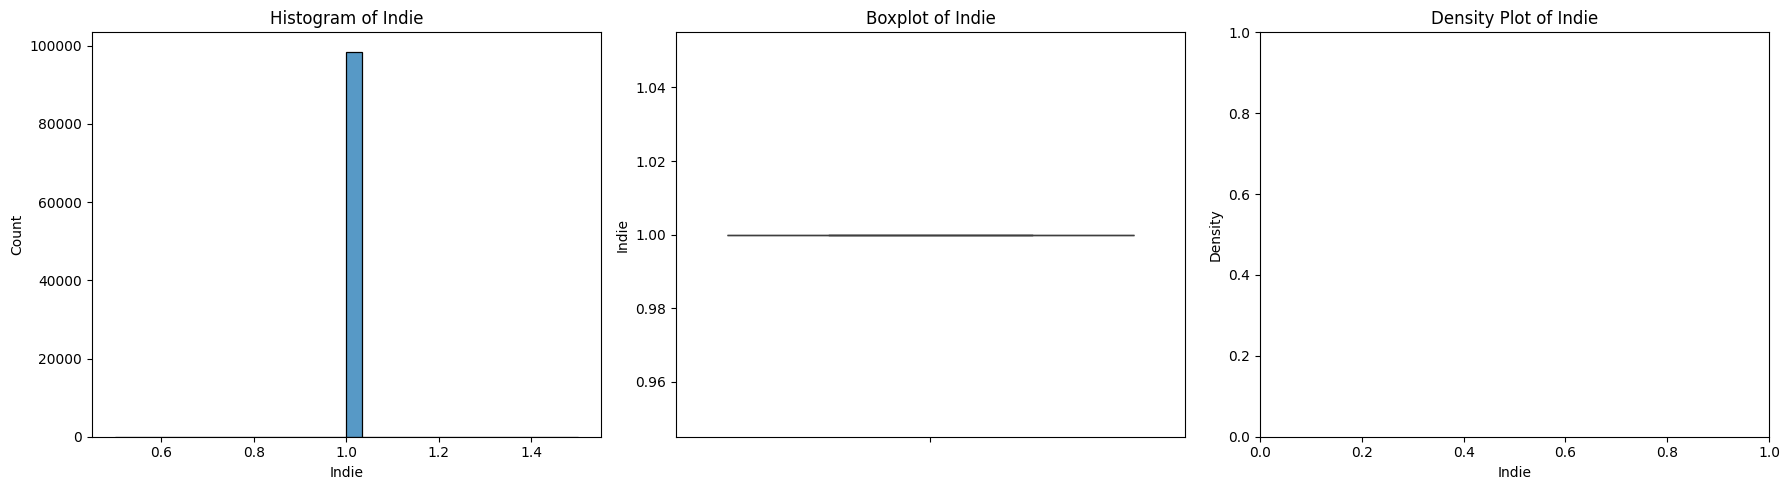

Skewness of linux: 1.945 (Highly skewed)


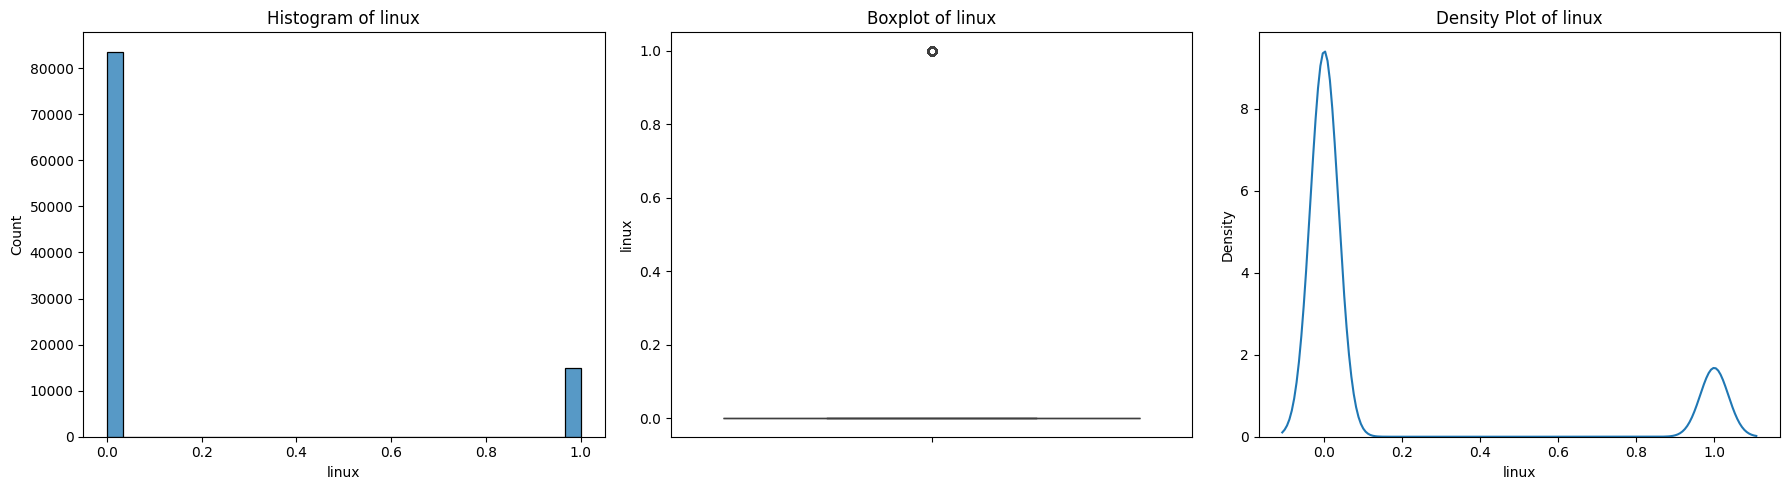

Skewness of mac: 1.430 (Highly skewed)


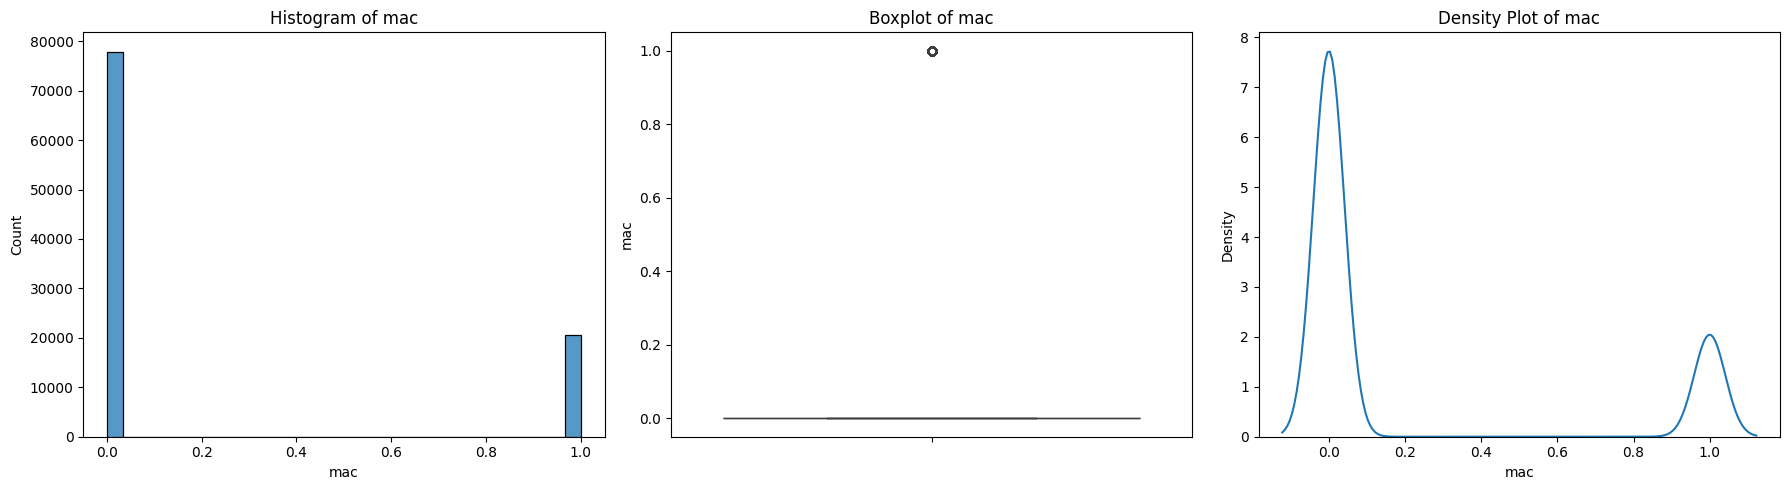

Skewness of windows: nan 


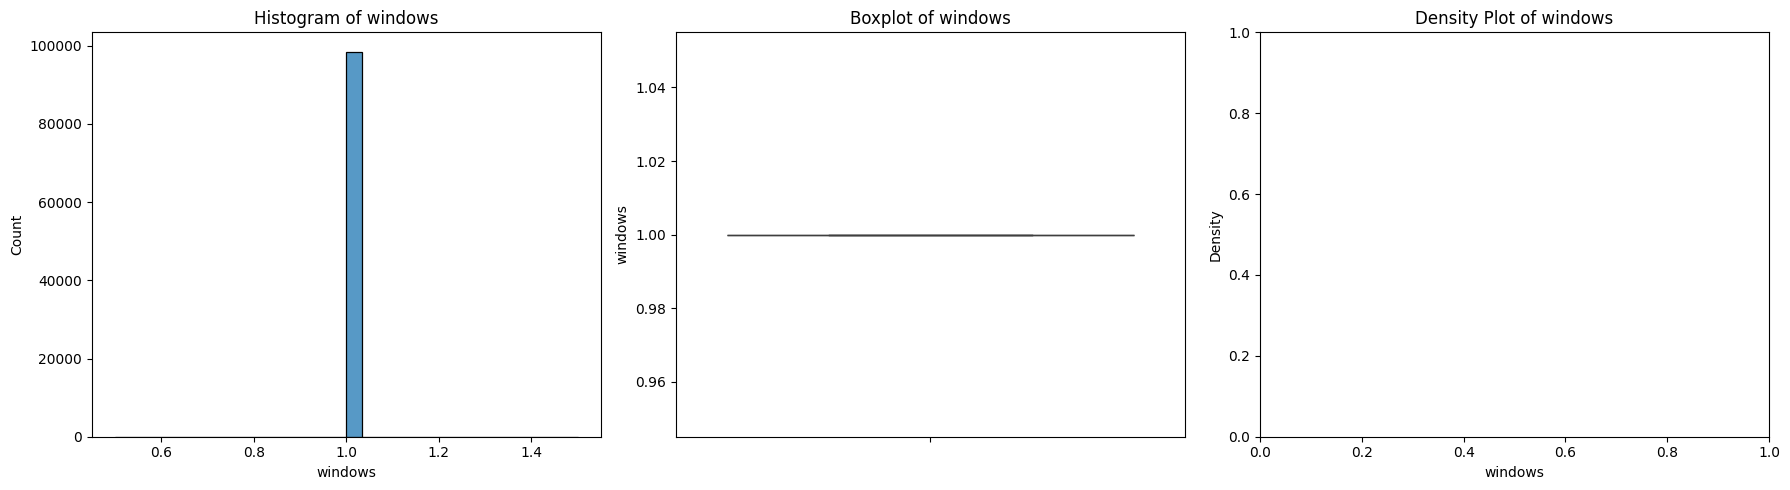

Skewness of publisherClass_encoded: 0.856 (Highly skewed)


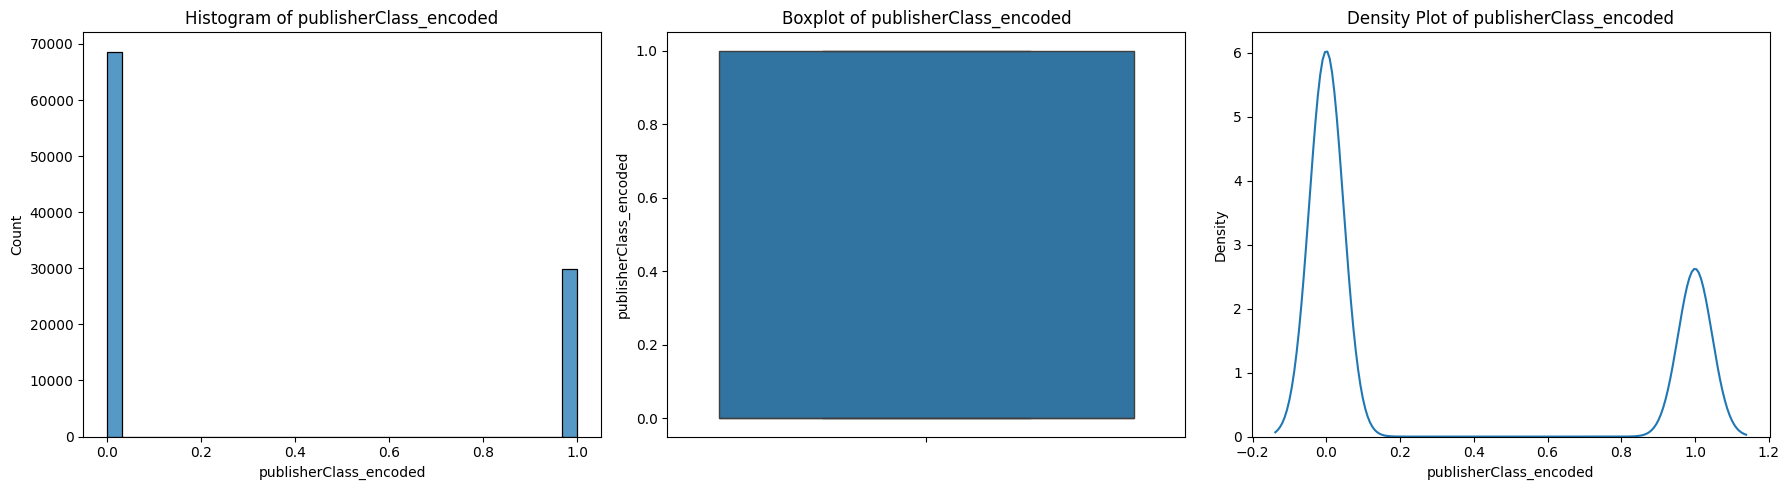

In [900]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Set skew threshold
skew_threshold = 0.75

# Identify numerical columns (exclude one-hot encoded columns and non-numeric)
numerical_cols = [col for col in train.columns
                 if not col.startswith('copiesSold_')
                 and train[col].dtype in ['int64', 'float64']]

# Visualize each numerical column with error handling
for col in numerical_cols:
    try:
        # Check for sufficient data (at least 2 non-null values)
        if train[col].dropna().count() < 2:
            print(f"Skipping {col}: Insufficient non-null data (< 2 values).")
            continue

        # Check for finite values
        if not np.isfinite(train[col].dropna()).all():
            print(f"Skipping {col}: Contains non-finite values (inf or NaN).")
            continue

        # Calculate skewness
        skewness = skew(train[col].dropna())
        print(f"Skewness of {col}: {skewness:.3f} {'(Highly skewed)' if abs(skewness) > skew_threshold else ''}")

        # Create subplots
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

        # Histogram
        sns.histplot(train[col].dropna(), bins=30, ax=ax1)
        ax1.set_title(f"Histogram of {col}")
        ax1.set_xlabel(col)
        ax1.set_ylabel("Count")

        # Boxplot
        sns.boxplot(y=train[col], ax=ax2)
        ax2.set_title(f"Boxplot of {col}")
        ax2.set_ylabel(col)

        # Density plot
        sns.kdeplot(train[col].dropna(), ax=ax3)
        ax3.set_title(f"Density Plot of {col}")
        ax3.set_xlabel(col)
        ax3.set_ylabel("Density")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting {col}: {str(e)}")
        continue

## Make in Test

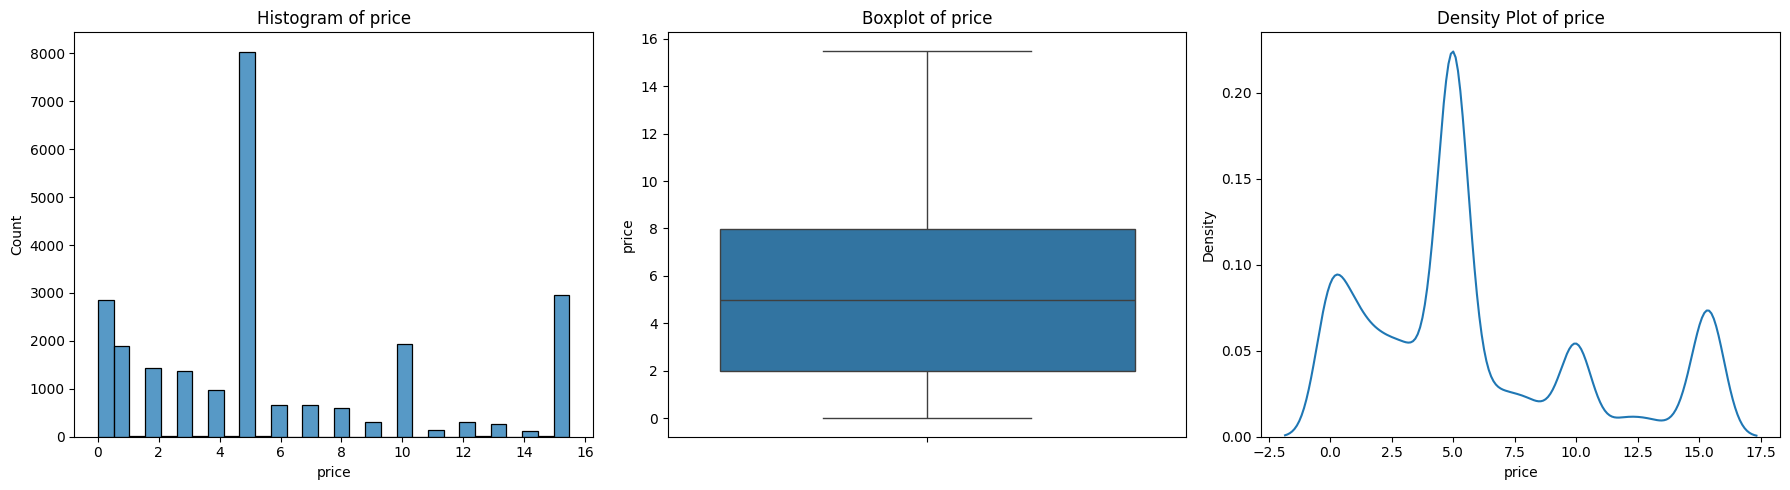

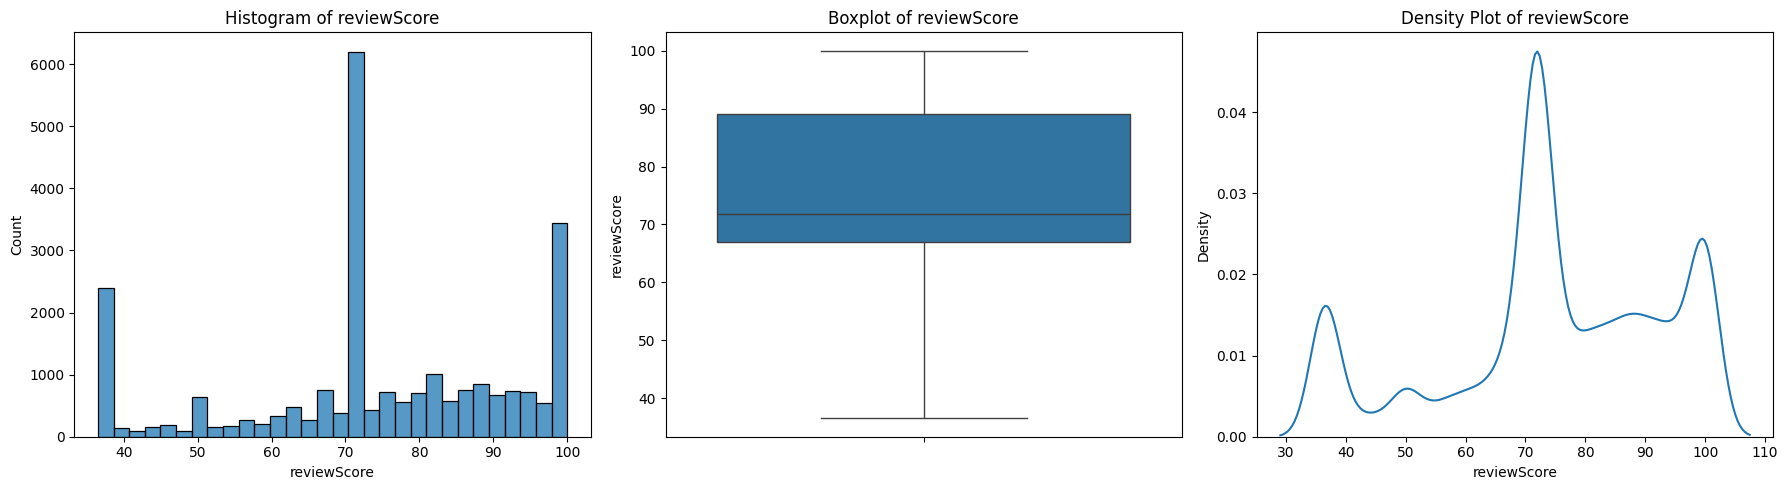

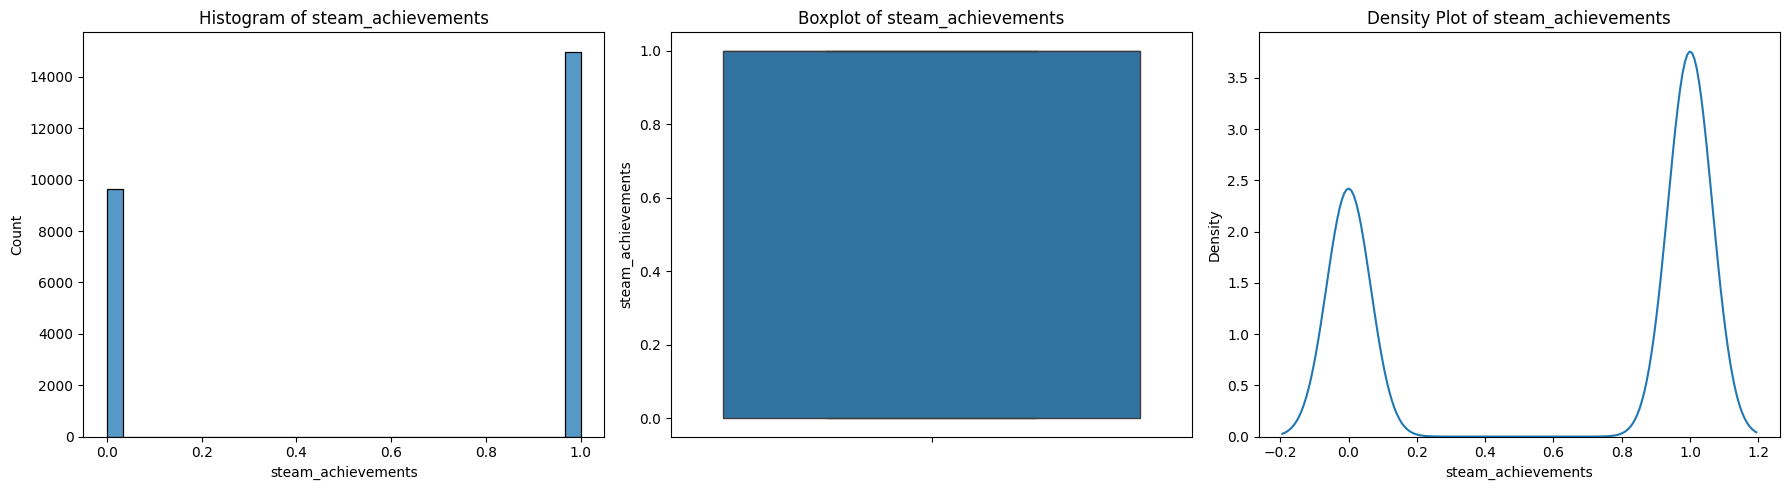

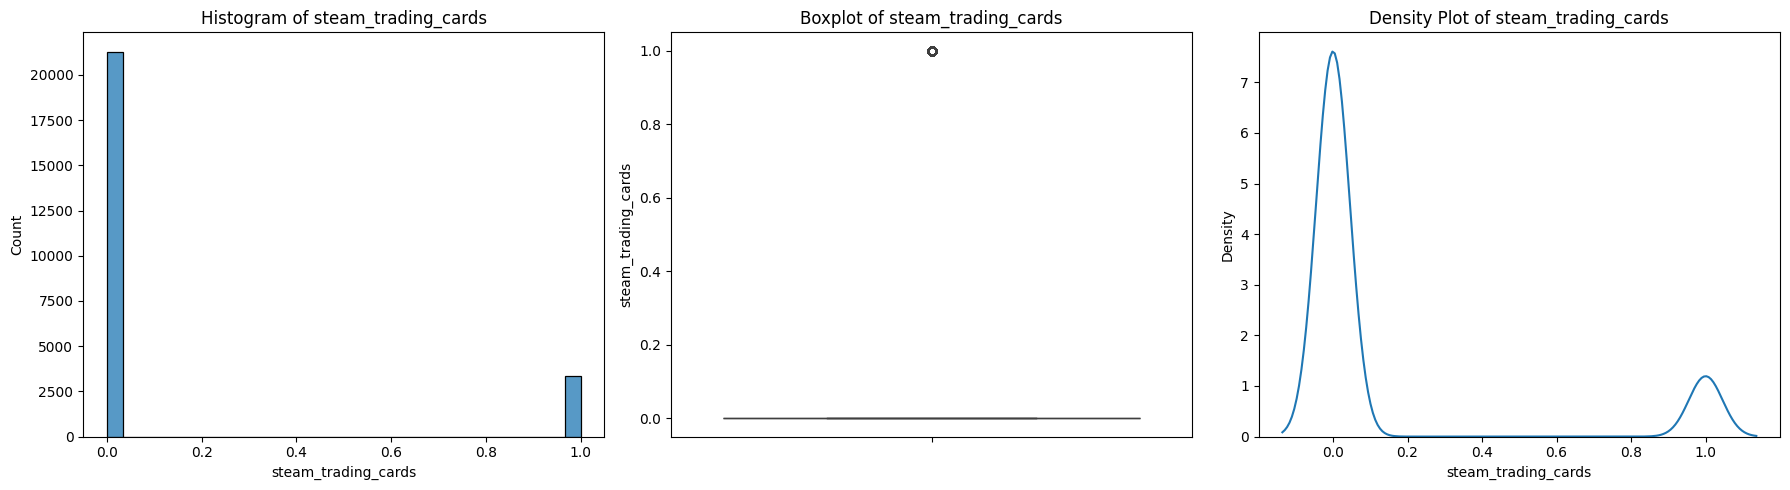

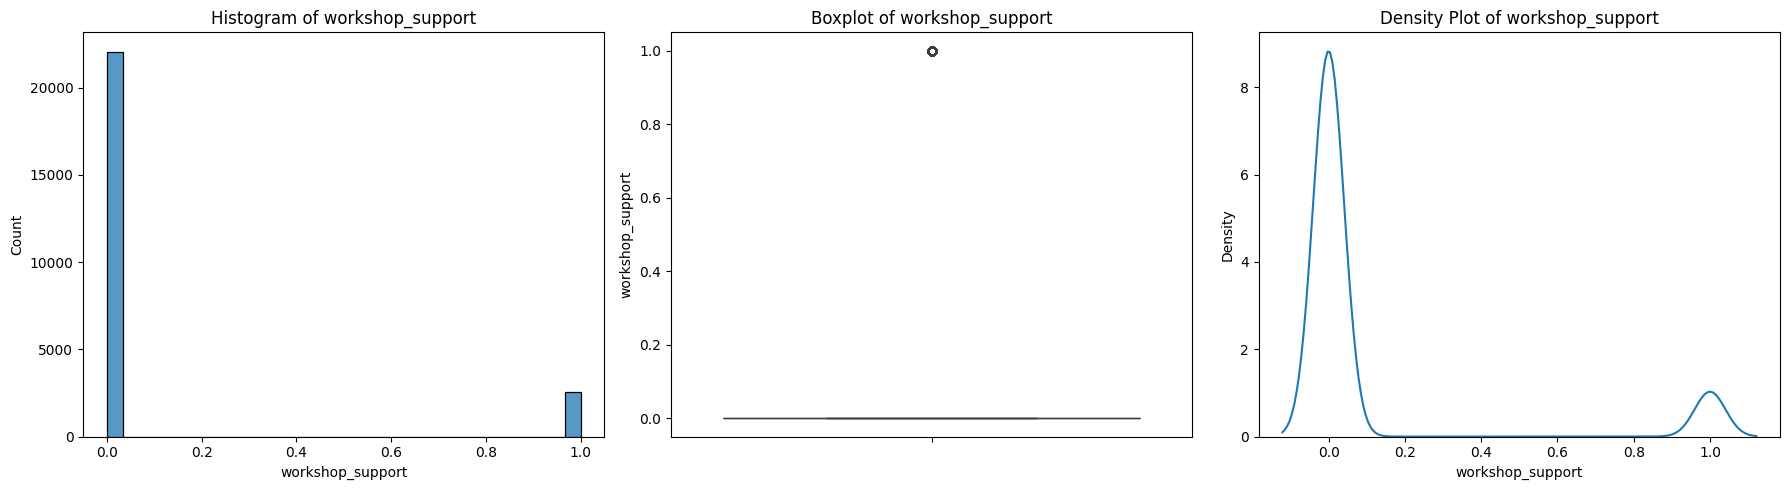

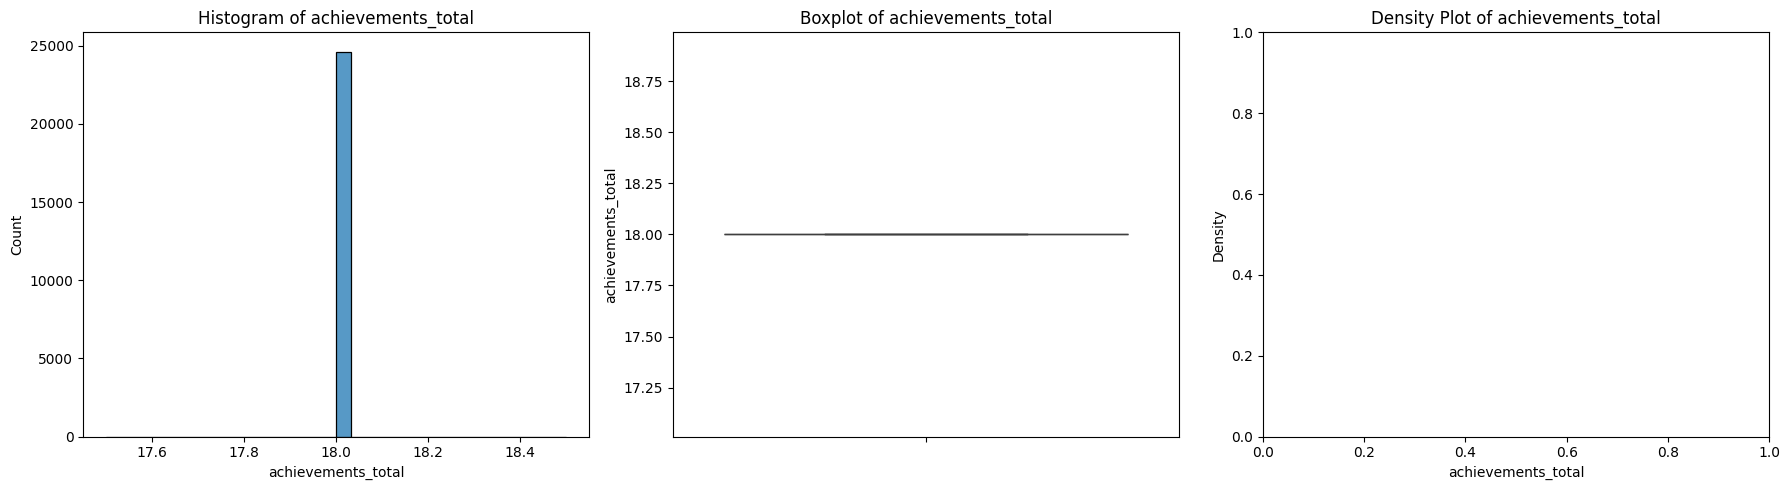

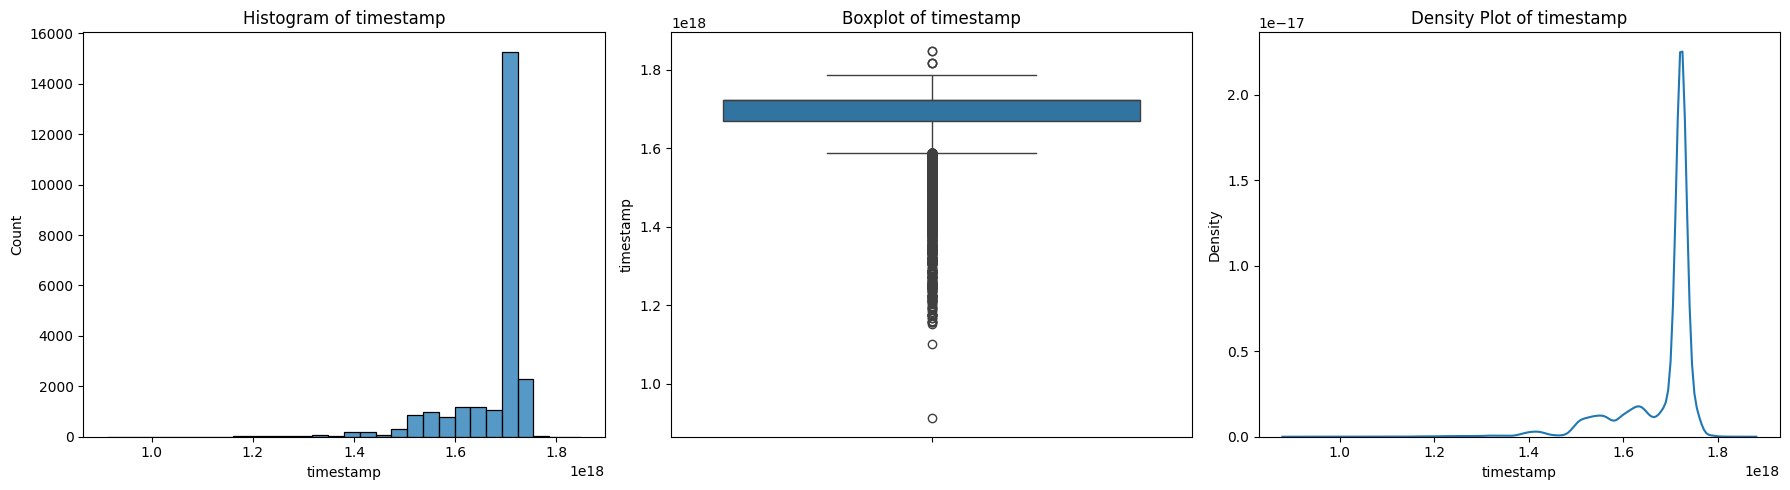

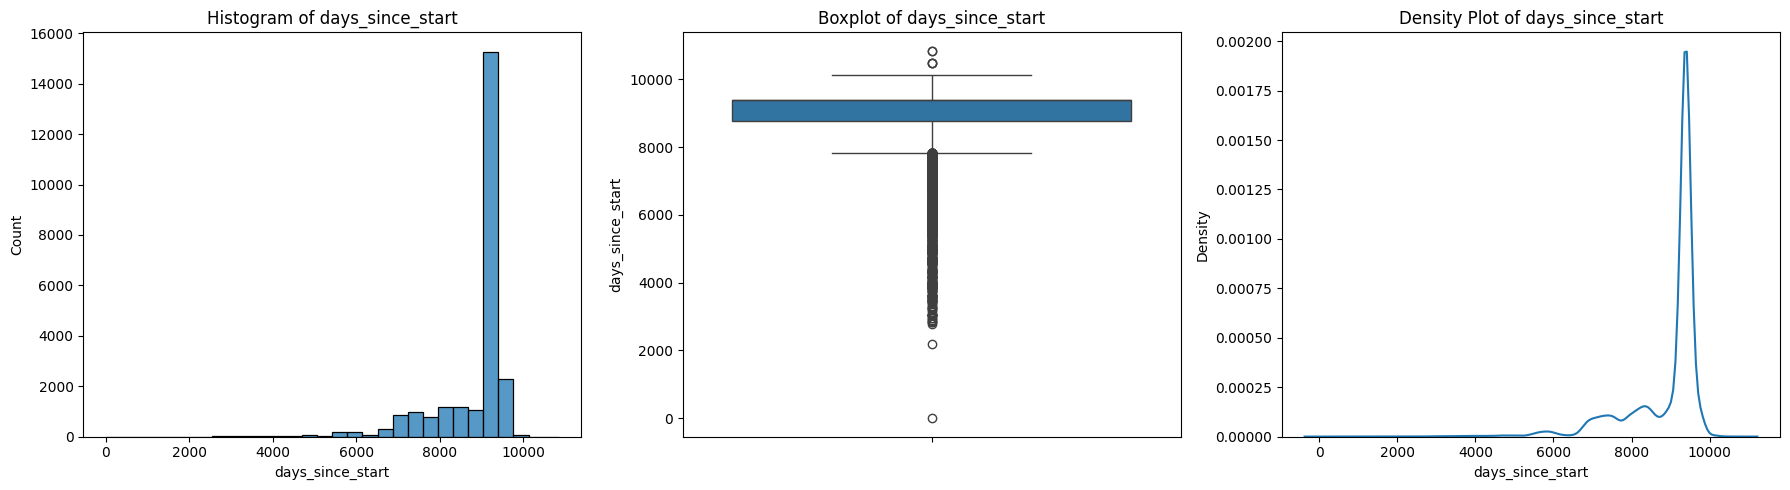

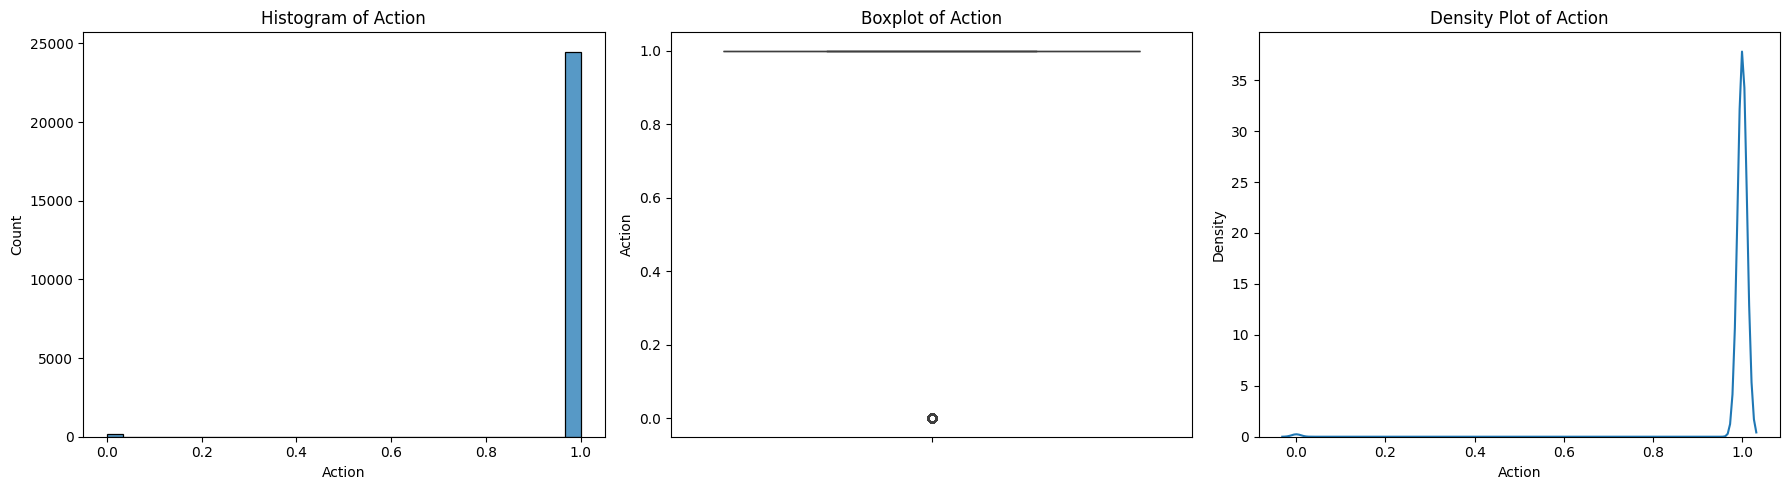

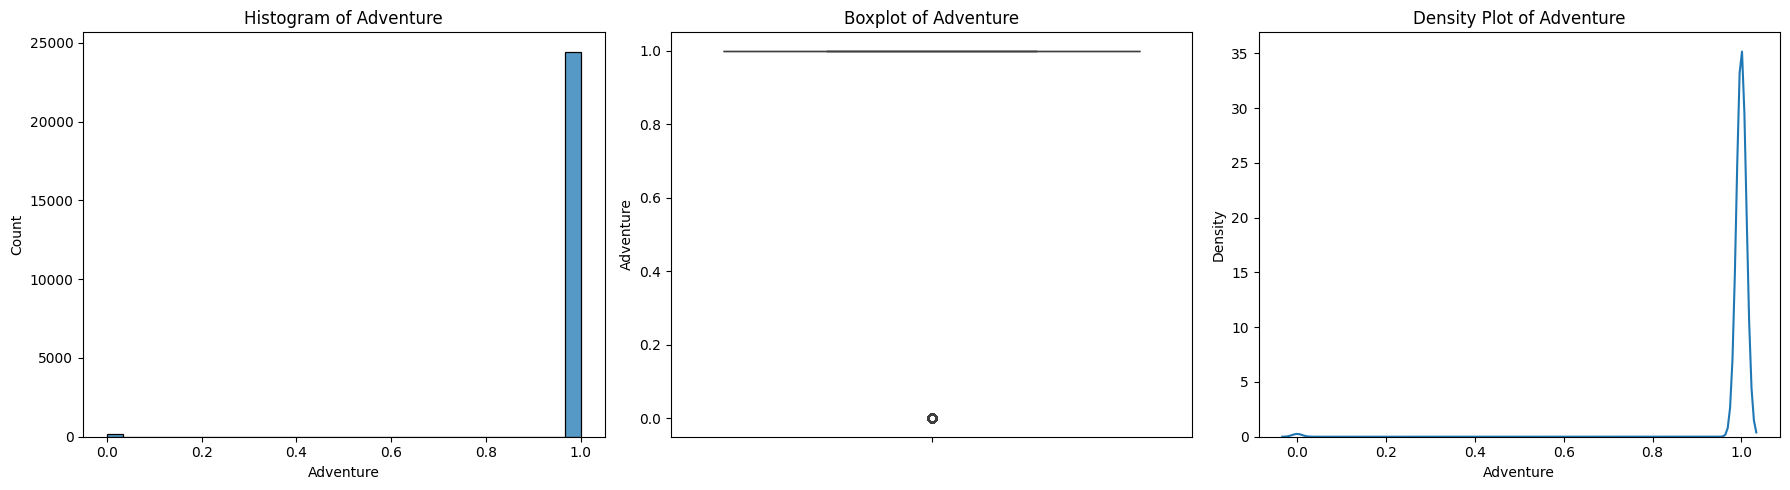

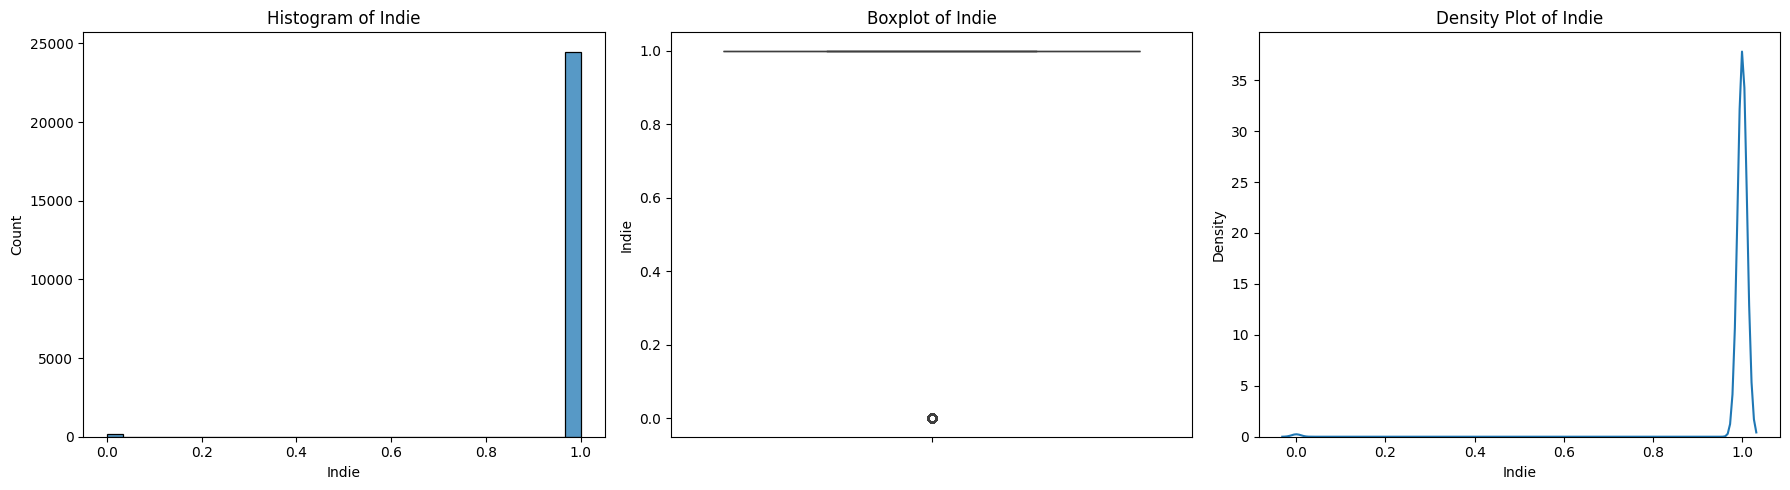

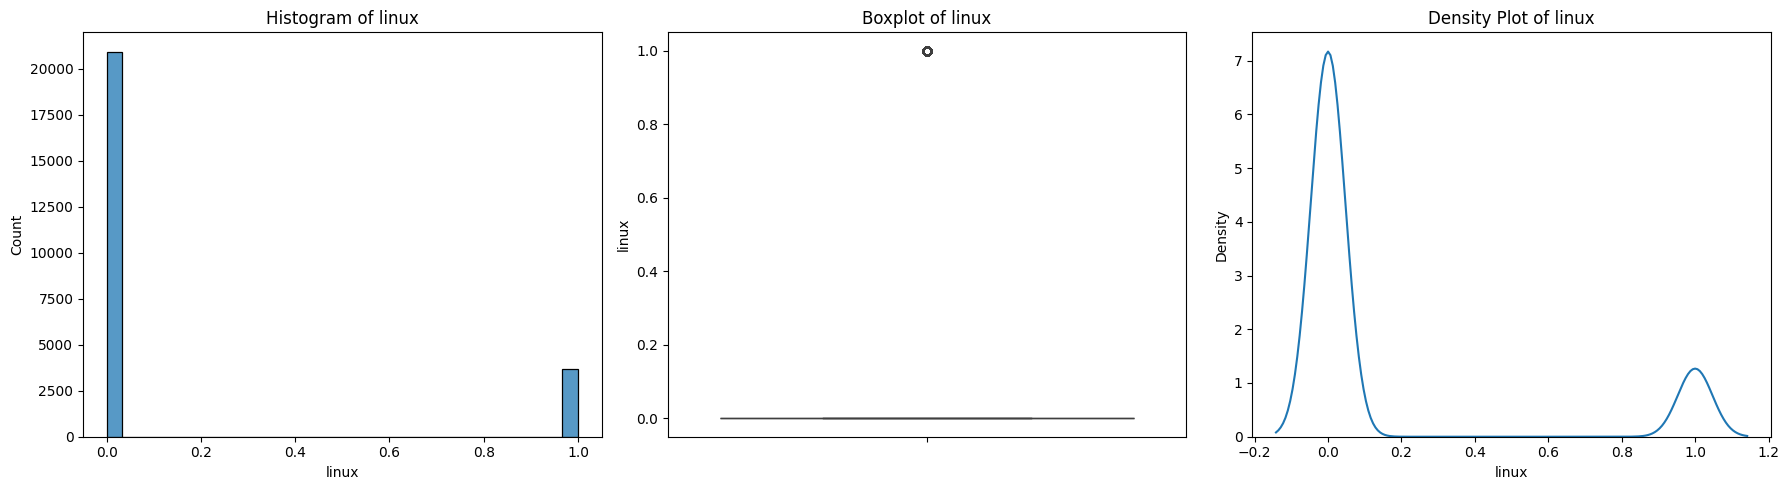

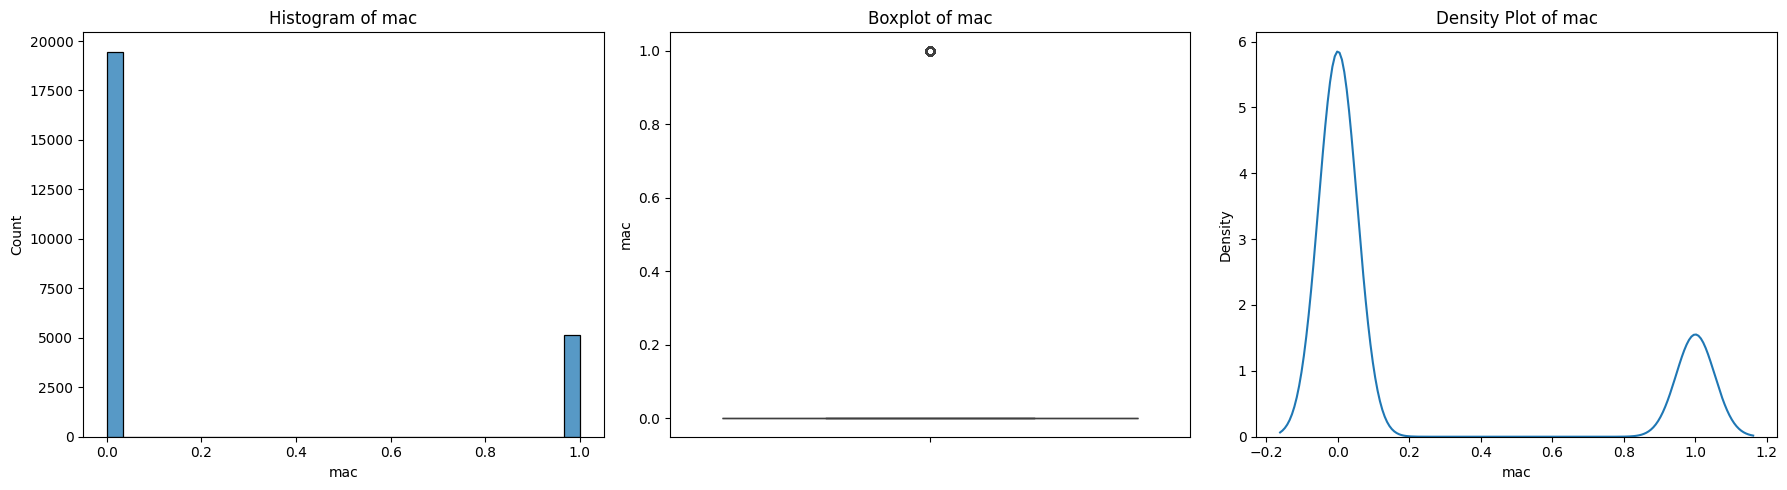

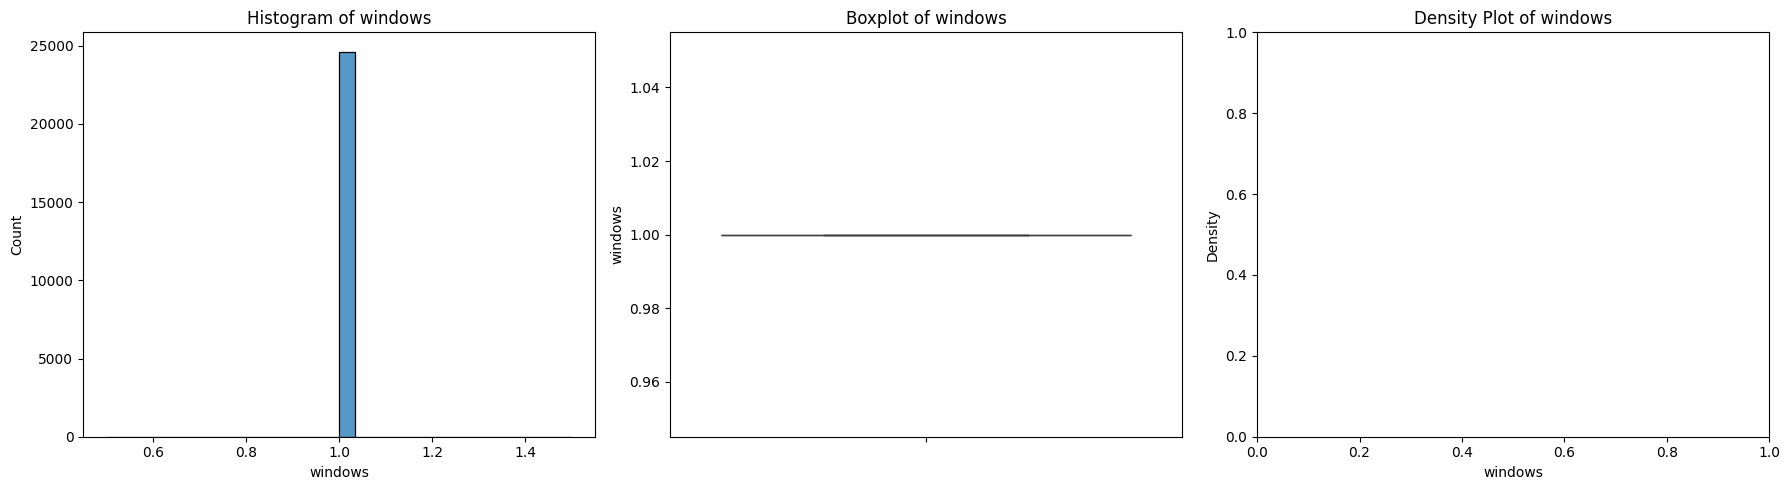

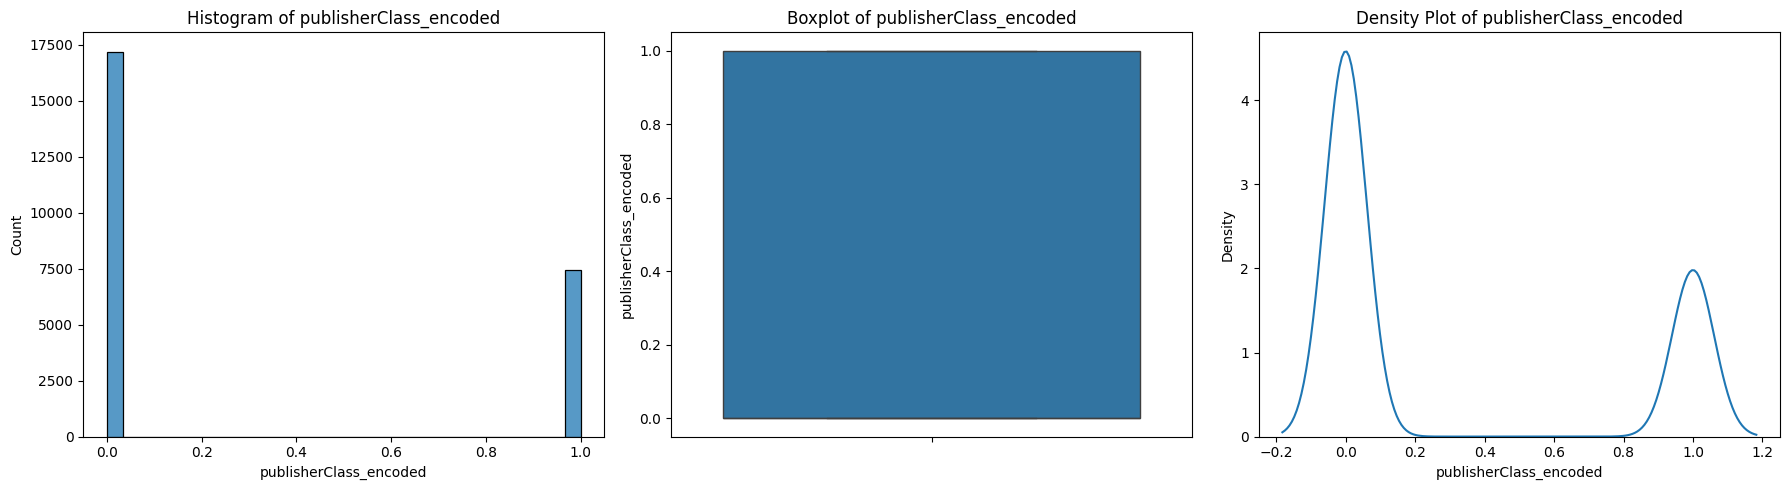

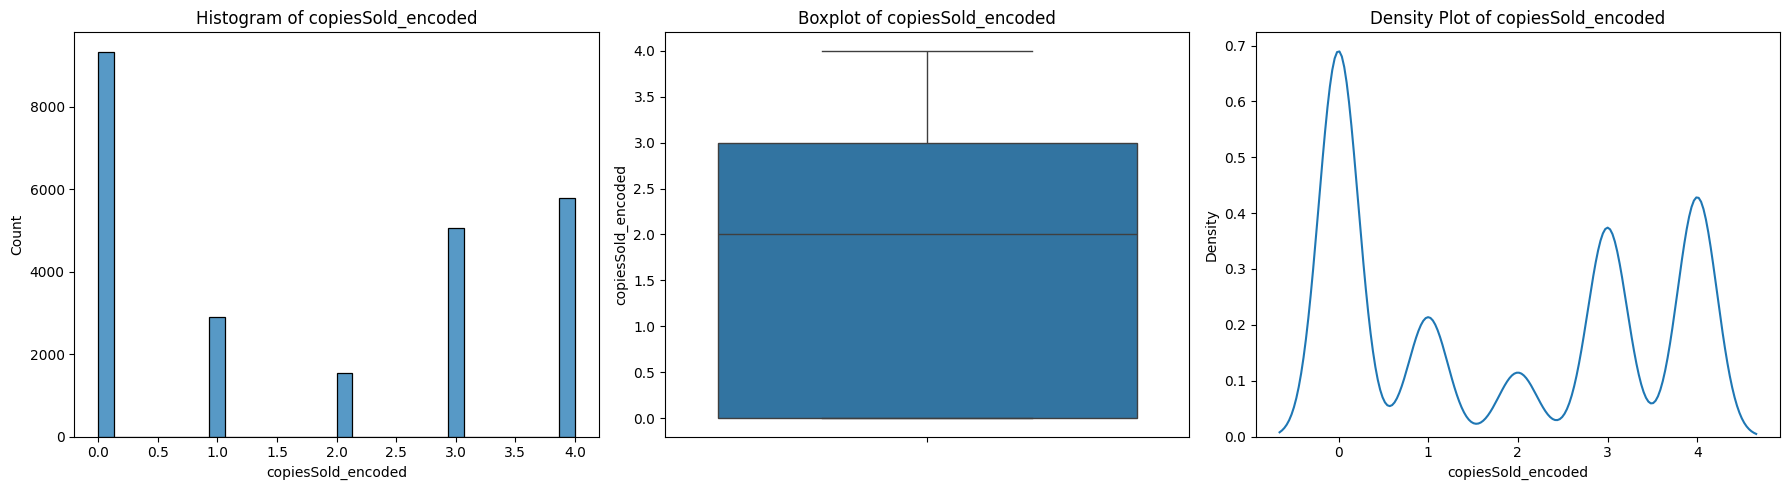

In [901]:
for col in test.columns:
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
  sns.histplot(test[col].dropna(), bins=30, ax=ax1)
  ax1.set_title(f"Histogram of {col}")
  ax1.set_xlabel(col)
  ax1.set_ylabel("Count")

  sns.boxplot(y=test[col], ax=ax2)
  ax2.set_title(f"Boxplot of {col}")
  ax2.set_ylabel(col)

  sns.kdeplot(test[col].dropna(), ax=ax3)
  ax3.set_title(f"Density Plot of {col}")
  ax3.set_xlabel(col)
  ax3.set_ylabel("Density")

  plt.tight_layout()
  plt.show()

# Make Feature Selection

In [902]:
train.head()

price  reviewScore  steam_achievements  steam_trading_cards  \
0   1.99    38.000000                   0                    0   
1   4.99   100.000000                   1                    0   
2   4.99    71.879094                   1                    0   
3  14.99   100.000000                   1                    0   
4   4.99    71.879094                   1                    0   

   workshop_support  achievements_total            timestamp  \
0                 0                18.0  1528761600000000000   
1                 0                18.0  1715904000000000000   
2                 0                18.0  1722470400000000000   
3                 0                18.0  1722470400000000000   
4                 0                18.0  1722470400000000000   

   days_since_start  Action  Adventure  Indie  linux  mac  windows  \
0             17695       1          1      1      0    0        1   
1             19861       1          1      1      0    0        1   
2             19937       1          1      1      0    0        1   
3             19937       1          1      1      0    0        1   
4             19937       1          1      1      0    0        1   

   publisherClass_encoded  copiesSold_encoded  
0                       0                   0  
1                       0                   0  
2                       0                   4  
3                       0                   0  
4                       0                   4

# Separate features and target

In [903]:
X_train = train.drop(columns=['copiesSold_encoded'])
y_train = train['copiesSold_encoded']
X_test = test.drop(columns=['copiesSold_encoded'])
y_test = test['copiesSold_encoded']

# Mutual Information Feature Selection

In [904]:
# import pandas as pd
# from sklearn.feature_selection import mutual_info_regression
# import numpy as np
# feature_cols = [col for col in train.columns if col not in ['copiesSold']]
# if X_train.isna().any().any() or X_train.isin([float('inf'), -float('inf')]).any().any():
#     print("Warning: X_train contains NaN or Inf, imputing with median")
#     X_train = X_train.fillna(X_train.median())
#     X_test = X_test.fillna(X_train.median())
# if y_train.isna().any() or y_train.isin([float('inf'), -float('inf')]).any():
#     print("Warning: y_train contains NaN or Inf, imputing with median")
#     y_train = y_train.fillna(y_train.median())
#     y_test = y_test.fillna(y_train.median())
# mi_scores = mutual_info_regression(X_train, y_train, random_state=42)
# feature_names = X_train.columns
# print(f"Length of feature_names: {len(feature_names)}")
# print(f"Length of mi_scores: {len(mi_scores)}")
# assert len(feature_names) == len(mi_scores), "Feature names and mutual information scores length mismatch"
# importance_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information': mi_scores})
# importance_df = importance_df.sort_values(by='Mutual Information', ascending=False)
# print("Mutual Information Ranking:")
# print(importance_df)
# top_n = 5
# selected_features = importance_df['Feature'].head(top_n).values
# print(f"\nTop {top_n} selected features:", selected_features)
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

# Decision Tree Feature Selection

In [905]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# feature_cols = [col for col in train.columns if col not in ['copiesSold']]
# if X_train.isna().any().any() or X_train.isin([float('inf'), -float('inf')]).any().any():
#     print("Warning: X_train contains NaN or Inf, imputing with median")
#     X_train = X_train.fillna(X_train.median())
#     X_test = X_test.fillna(X_train.median())
# if y_train.isna().any() or y_train.isin([float('inf'), -float('inf')]).any():
#     print("Warning: y_train contains NaN or Inf, imputing with median")
#     y_train = y_train.fillna(y_train.median())
#     y_test = y_test.fillna(y_train.median())
# dt = DecisionTreeRegressor(random_state=42)
# dt.fit(X_train, y_train)
# feature_names = X_train.columns
# feature_importances = dt.feature_importances_
# print(f"Length of feature_names: {len(feature_names)}")
# print(f"Length of feature_importances: {len(feature_importances)}")
# assert len(feature_names) == len(feature_importances), "Feature names and importances length mismatch"
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# print("Feature Importance Ranking:")
# print(importance_df)
# top_n = 7
# selected_features = importance_df['Feature'].head(top_n).values
# print(f"\nTop {top_n} selected features:", selected_features)
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

# Lasso Feature Selection

In [906]:
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import joblib
pre_selector = SelectKBest(score_func=f_regression, k=50)
X_train_selected = pre_selector.fit_transform(X_train, y_train)
X_test_selected = pre_selector.transform(X_test)
pre_selected_features = X_train.columns[pre_selector.get_support()].tolist()
model = Lasso(alpha=0.01, random_state=42)
selector = SelectFromModel(model)
X_train_final = selector.fit_transform(X_train_selected, y_train)
X_test_final = selector.transform(X_test_selected)
selected_features = np.array(pre_selected_features)[selector.get_support()].tolist()
X_train = pd.DataFrame(X_train_final, columns=selected_features, index=X_train.index)
X_test = pd.DataFrame(X_test_final, columns=selected_features, index=X_test.index)
joblib.dump(pre_selector, 'select_kbest.pkl')
joblib.dump(selector, 'lasso_selector.pkl')
print("Pre-selected features (SelectKBest):", pre_selected_features)
print("Final selected features (Lasso):", selected_features)
assert X_train.columns.tolist() == X_test.columns.tolist(), "Columns do not match!"

Pre-selected features (SelectKBest): ['price', 'reviewScore', 'steam_achievements', 'steam_trading_cards', 'workshop_support', 'achievements_total', 'timestamp', 'days_since_start', 'Action', 'Adventure', 'Indie', 'linux', 'mac', 'windows', 'publisherClass_encoded']
Final selected features (Lasso): ['price', 'reviewScore', 'steam_achievements', 'steam_trading_cards', 'workshop_support', 'mac', 'publisherClass_encoded']


In [907]:
X_train.head()

price  reviewScore  steam_achievements  steam_trading_cards  \
0   1.99    38.000000                 0.0                  0.0   
1   4.99   100.000000                 1.0                  0.0   
2   4.99    71.879094                 1.0                  0.0   
3  14.99   100.000000                 1.0                  0.0   
4   4.99    71.879094                 1.0                  0.0   

   workshop_support  mac  publisherClass_encoded  
0               0.0  0.0                     0.0  
1               0.0  0.0                     0.0  
2               0.0  0.0                     0.0  
3               0.0  0.0                     0.0  
4               0.0  0.0                     0.0

In [908]:
X_test.head()

price  reviewScore  steam_achievements  steam_trading_cards  \
0   3.99         50.0                 0.0                  0.0   
1   9.99         83.0                 0.0                  1.0   
2   1.99         82.0                 1.0                  0.0   
3  14.99         36.5                 1.0                  0.0   
4   3.99         72.0                 0.0                  0.0   

   workshop_support  mac  publisherClass_encoded  
0               0.0  0.0                     0.0  
1               0.0  1.0                     1.0  
2               0.0  0.0                     0.0  
3               0.0  0.0                     1.0  
4               0.0  0.0                     1.0

# Compute correlation matrix

# Apply LightGBM Model

In [909]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 15,
    'learning_rate': 0.05,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': -1
}

# Make Training

In [910]:
train_data = lgb.Dataset(X_train, label=y_train, feature_name=X_train.columns.tolist())
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, feature_name=X_test.columns.tolist())
train_data.construct()
test_data.construct()

bst = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20)]
)

y_train_pred = bst.predict(X_train, num_iteration=bst.best_iteration)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100

tolerance = 0.1
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100

print("Training Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance}): {train_accuracy:.2f}%")

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 0.909387
Training Metrics:
Train RMSE: 0.9055
Train R2 Score: 70.33%
Train MAE: 0.6455
Train MAPE: 43.29%
Train Tolerance-Based Accuracy (within ±0.1): 32.01%


# Make Tesing and Evaluation

In [911]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.where(y_test != 0, y_test, 1))) * 100

print(f"Test RMSE (simplified model): {rmse:.4f}")
print(f"Test R2 Score (simplified model): {r2*100:.2f}%")
print(f"Test MAE (simplified model): {mae:.4f}")
print(f"Test MAPE (simplified model): {mape:.2f}%")

Test RMSE (simplified model): 0.9094
Test R2 Score (simplified model): 69.82%
Test MAE (simplified model): 0.6492
Test MAPE (simplified model): 43.19%


# Apply Linear Regression Model

# Make Training

In [912]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100

tolerance = 0.1
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100
print("Training Metrics (Linear Regression):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance}): {train_accuracy:.2f}%")

Training Metrics (Linear Regression):
Train RMSE: 1.6436
Train R2 Score: 2.26%
Train MAE: 1.5393
Train MAPE: 98.78%
Train Tolerance-Based Accuracy (within ±0.1): 0.80%


# Make Testing

In [913]:
y_test_pred = lr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / np.where(y_test != 0, y_test, 1))) * 100
tolerance = 0.1
test_correct = np.abs(y_test - y_test_pred) <= tolerance
test_accuracy = np.mean(test_correct) * 100
print("Test Metrics (Linear Regression):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2*100:.2f}%")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test Tolerance-Based Accuracy (within ±{tolerance}): {test_accuracy:.2f}%")

Test Metrics (Linear Regression):
Test RMSE: 1.6393
Test R2 Score: 1.94%
Test MAE: 1.5339
Test MAPE: 99.24%
Test Tolerance-Based Accuracy (within ±0.1): 0.92%


# Apply XGBoost Model

# Make Train

In [914]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dvalid, 'valid')],
    early_stopping_rounds=20,
    verbose_eval=False
)

y_train_pred = bst.predict(dtrain)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100

tolerance = 0.1
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100

print("Training Metrics (XGBoost):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance}): {train_accuracy:.2f}%")

Training Metrics (XGBoost):
Train RMSE: 0.8881
Train R2 Score: 71.46%
Train MAE: 0.6133
Train MAPE: 41.18%
Train Tolerance-Based Accuracy (within ±0.1): 37.48%


# Make Testing

In [915]:
dtest = xgb.DMatrix(X_test)
y_test_pred = bst.predict(dtest)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / np.where(y_test != 0, y_test, 1))) * 100

tolerance = 0.1
test_correct = np.abs(y_test - y_test_pred) <= tolerance
test_accuracy = np.mean(test_correct) * 100

print("Test Metrics (XGBoost):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2*100:.2f}%")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test Tolerance-Based Accuracy (within ±{tolerance}): {test_accuracy:.2f}%")

Test Metrics (XGBoost):
Test RMSE: 0.8984
Test R2 Score: 70.55%
Test MAE: 0.6207
Test MAPE: 41.34%
Test Tolerance-Based Accuracy (within ±0.1): 36.83%


# Apply Decision Tree Model

# Make training

In [916]:
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100

tolerance = 0.1
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100


print("Training Metrics (Decision Tree):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance}): {train_accuracy:.2f}%")

Training Metrics (Decision Tree):
Train RMSE: 0.9290
Train R2 Score: 68.77%
Train MAE: 0.6489
Train MAPE: 43.74%
Train Tolerance-Based Accuracy (within ±0.1): 34.62%


# Make Testing

In [917]:
y_test_pred = dt.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / np.where(y_test != 0, y_test, 1))) * 100

tolerance = 0.1
test_correct = np.abs(y_test - y_test_pred) <= tolerance
test_accuracy = np.mean(test_correct) * 100

print("Test Metrics (Decision Tree):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2*100:.2f}%")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test Tolerance-Based Accuracy (within ±{tolerance}): {test_accuracy:.2f}%")

Test Metrics (Decision Tree):
Test RMSE: 0.9316
Test R2 Score: 68.33%
Test MAE: 0.6517
Test MAPE: 43.60%
Test Tolerance-Based Accuracy (within ±0.1): 34.08%


# Apply Random Forest

In [918]:
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100

tolerance = 0.1
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100

print("Training Metrics (Random Forest):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance}): {train_accuracy:.2f}%")

Training Metrics (Random Forest):
Train RMSE: 0.9271
Train R2 Score: 68.90%
Train MAE: 0.6478
Train MAPE: 43.63%
Train Tolerance-Based Accuracy (within ±0.1): 35.16%


# Make Testing

In [919]:
y_test_pred = rf.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / np.where(y_test != 0, y_test, 1))) * 100

tolerance = 0.1
test_correct = np.abs(y_test - y_test_pred) <= tolerance
test_accuracy = np.mean(test_correct) * 100

print("Test Metrics (Random Forest):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2*100:.2f}%")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test Tolerance-Based Accuracy (within ±{tolerance}): {test_accuracy:.2f}%")

Test Metrics (Random Forest):
Test RMSE: 0.9301
Test R2 Score: 68.43%
Test MAE: 0.6508
Test MAPE: 43.50%
Test Tolerance-Based Accuracy (within ±0.1): 34.58%


# Apply Gradient Boosting

# Make Training

In [920]:
gb = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42,
    n_iter_no_change=20,
    validation_fraction=0.1
)
gb.fit(X_train, y_train)

y_train_pred = gb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100

tolerance = 0.1
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100

print("Training Metrics (Gradient Boosting):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance}): {train_accuracy:.2f}%")

Training Metrics (Gradient Boosting):
Train RMSE: 0.8807
Train R2 Score: 71.93%
Train MAE: 0.6017
Train MAPE: 40.39%
Train Tolerance-Based Accuracy (within ±0.1): 37.57%


# Make Testing

In [921]:
y_test_pred = gb.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / np.where(y_test != 0, y_test, 1))) * 100

tolerance = 0.1
test_correct = np.abs(y_test - y_test_pred) <= tolerance
test_accuracy = np.mean(test_correct) * 100

print("Test Metrics (Gradient Boosting):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2*100:.2f}%")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test Tolerance-Based Accuracy (within ±{tolerance}): {test_accuracy:.2f}%")

Test Metrics (Gradient Boosting):
Test RMSE: 0.8953
Test R2 Score: 70.75%
Test MAE: 0.6120
Test MAPE: 40.73%
Test Tolerance-Based Accuracy (within ±0.1): 36.89%


# Apply Bayesian Ridge Regression

# Make Training

In [922]:
br = BayesianRidge()
br.fit(X_train, y_train)

y_train_pred = br.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100

tolerance = 0.1
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100

print("Training Metrics (Bayesian Ridge):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance}): {train_accuracy:.2f}%")

Training Metrics (Bayesian Ridge):
Train RMSE: 1.6436
Train R2 Score: 2.26%
Train MAE: 1.5394
Train MAPE: 98.78%
Train Tolerance-Based Accuracy (within ±0.1): 0.81%


# Make Testing

In [923]:
y_test_pred = br.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / np.where(y_test != 0, y_test, 1))) * 100

tolerance = 0.1
test_correct = np.abs(y_test - y_test_pred) <= tolerance
test_accuracy = np.mean(test_correct) * 100

print("Test Metrics (Bayesian Ridge):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2*100:.2f}%")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test Tolerance-Based Accuracy (within ±{tolerance}): {test_accuracy:.2f}%")

Test Metrics (Bayesian Ridge):
Test RMSE: 1.6393
Test R2 Score: 1.94%
Test MAE: 1.5339
Test MAPE: 99.24%
Test Tolerance-Based Accuracy (within ±0.1): 0.93%


# Make The Logistic Regression

# Make Training

In [924]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / np.where(y_train != 0, y_train, 1))) * 100
tolerance = 0.1 * (y_train.max() - y_train.min())
train_correct = np.abs(y_train - y_train_pred) <= tolerance
train_accuracy = np.mean(train_correct) * 100

print("Training Metrics (Linear Regression):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2 Score: {train_r2*100:.2f}%")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Train Tolerance-Based Accuracy (within ±{tolerance:.4f}): {train_accuracy:.2f}%")

Training Metrics (Linear Regression):
Train RMSE: 1.6436
Train R2 Score: 2.26%
Train MAE: 1.5393
Train MAPE: 98.78%
Train Tolerance-Based Accuracy (within ±0.4000): 3.88%


# Make Testing

In [925]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
epsilon = 1e-10
test_mape = np.mean(np.abs((y_test - y_test_pred) / (np.abs(y_test) + epsilon))) * 100
tolerance = 0.1 * (y_test.max() - y_test.min())
test_correct = np.abs(y_test - y_test_pred) <= tolerance
test_accuracy = np.mean(test_correct) * 100

print("\nTest Metrics (Linear Regression):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2*100:.2f}%")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test Tolerance-Based Accuracy (within ±{tolerance:.4f}): {test_accuracy:.2f}%")


Test Metrics (Linear Regression):
Test RMSE: 1.6393
Test R2 Score: 1.94%
Test MAE: 1.5339
Test MAPE: 697242863876.41%
Test Tolerance-Based Accuracy (within ±0.4000): 4.15%


# Apply Classification Models

In [926]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Model

# Make Training

In [927]:
for n in [3 , 5 , 7 , 9]:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"n_neighbors={n}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")
print("Experiment 2: Varying weights (Training)")
def custom_weights(distances):
    return 1 / (distances ** 2 + 1e-6)

for weight in ['uniform', 'distance', custom_weights]:
    knn = KNeighborsClassifier(n_neighbors=3, weights=weight, metric='euclidean')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"weights={weight}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")

n_neighbors=3:
  Training Accuracy: 0.7444

n_neighbors=5:
  Training Accuracy: 0.7454

n_neighbors=7:
  Training Accuracy: 0.7476

n_neighbors=9:
  Training Accuracy: 0.7471

Experiment 2: Varying weights (Training)
weights=uniform:
  Training Accuracy: 0.7444

weights=distance:
  Training Accuracy: 0.7584

weights=<function custom_weights at 0x7b138fc2e020>:
  Training Accuracy: 0.7584



# Make Testing

In [928]:
for n in [3, 5, 7 , 9]:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"n_neighbors={n}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")
print("Experiment 2: Varying weights (Testing)")
def custom_weights(distances):
    return 1 / (distances ** 2 + 1e-6)

for weight in ['uniform', 'distance', custom_weights]:
    knn = KNeighborsClassifier(n_neighbors=3, weights=weight, metric='euclidean')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"weights={weight}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")

n_neighbors=3:
  Test Accuracy: 0.6968

n_neighbors=5:
  Test Accuracy: 0.6996

n_neighbors=7:
  Test Accuracy: 0.7063

n_neighbors=9:
  Test Accuracy: 0.7116

Experiment 2: Varying weights (Testing)
weights=uniform:
  Test Accuracy: 0.6968

weights=distance:
  Test Accuracy: 0.6950

weights=<function custom_weights at 0x7b139ba423e0>:
  Test Accuracy: 0.6958



## Naive Bayes Model

# Make Training

In [929]:
for var_smooth in [1e-9, 1e-7, 1e-5]:
    nb = GaussianNB(var_smoothing=var_smooth)
    nb.fit(X_train, y_train)
    y_train_pred = nb.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"var_smoothing={var_smooth}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")
print("Experiment 2: Varying scaling approach (with var_smoothing=1e-9, Training)")
scaling_methods = {
    'No scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

for name, scaler in scaling_methods.items():
    if scaler is None:
        X_train_proc = X_train
    else:
        X_train_proc = scaler.fit_transform(X_train)
    nb = GaussianNB(var_smoothing=1e-9)
    nb.fit(X_train_proc, y_train)
    y_train_pred = nb.predict(X_train_proc)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Scaling={name}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")

var_smoothing=1e-09:
  Training Accuracy: 0.6559

var_smoothing=1e-07:
  Training Accuracy: 0.6559

var_smoothing=1e-05:
  Training Accuracy: 0.6558

Experiment 2: Varying scaling approach (with var_smoothing=1e-9, Training)
Scaling=No scaling:
  Training Accuracy: 0.6559

Scaling=StandardScaler:
  Training Accuracy: 0.6559

Scaling=MinMaxScaler:
  Training Accuracy: 0.6559



# Make Testing

In [930]:
for var_smooth in [1e-9, 1e-7, 1e-5]:
    nb = GaussianNB(var_smoothing=var_smooth)
    nb.fit(X_train, y_train)
    y_test_pred = nb.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"var_smoothing={var_smooth}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")
print("Experiment 2: Varying scaling approach (with var_smoothing=1e-9, Testing)")
scaling_methods = {
    'No scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

for name, scaler in scaling_methods.items():
    if scaler is None:
        X_train_proc, X_test_proc = X_train, X_test
    else:
        X_train_proc = scaler.fit_transform(X_train)
        X_test_proc = scaler.transform(X_test)
    nb = GaussianNB(var_smoothing=1e-9)
    nb.fit(X_train_proc, y_train)
    y_test_pred = nb.predict(X_test_proc)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Scaling={name}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")

var_smoothing=1e-09:
  Test Accuracy: 0.6530

var_smoothing=1e-07:
  Test Accuracy: 0.6530

var_smoothing=1e-05:
  Test Accuracy: 0.6529

Experiment 2: Varying scaling approach (with var_smoothing=1e-9, Testing)
Scaling=No scaling:
  Test Accuracy: 0.6530

Scaling=StandardScaler:
  Test Accuracy: 0.6530

Scaling=MinMaxScaler:
  Test Accuracy: 0.6530



## Random Forest Model

# Make Training

In [931]:
for n_est in [50, 100, 200]:
    rf = RandomForestClassifier(
        n_estimators=n_est,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"n_estimators={n_est}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")
print("Experiment 2: Varying max_depth (Training)")
for depth in [10, 20, None]:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"max_depth={depth}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")

n_estimators=50:
  Training Accuracy: 0.7866

n_estimators=100:
  Training Accuracy: 0.7867

n_estimators=200:
  Training Accuracy: 0.7867

Experiment 2: Varying max_depth (Training)
max_depth=10:
  Training Accuracy: 0.7389

max_depth=20:
  Training Accuracy: 0.7847

max_depth=None:
  Training Accuracy: 0.7867



# Make Testing

In [932]:
for n_est in [50, 100, 200]:
    rf = RandomForestClassifier(
        n_estimators=n_est,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"n_estimators={n_est}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")
print("Experiment 2: Varying max_depth (Testing)")
for depth in [10, 20, None]:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"max_depth={depth}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")

n_estimators=50:
  Test Accuracy: 0.7191

n_estimators=100:
  Test Accuracy: 0.7197

n_estimators=200:
  Test Accuracy: 0.7193

Experiment 2: Varying max_depth (Testing)
max_depth=10:
  Test Accuracy: 0.7294

max_depth=20:
  Test Accuracy: 0.7231

max_depth=None:
  Test Accuracy: 0.7197



## Logistic Regression Model

# Make Training

In [933]:
for c in [0.01, 1.0, 100.0]:
    lr = LogisticRegression(
        C=c,
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"C={c}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")
print("Experiment 2: Varying penalty (Training)")
for pen in ['l1', 'l2', 'elasticnet']:
    if pen == 'elasticnet':
        lr = LogisticRegression(
            C=1.0,
            penalty=pen,
            solver='saga',
            l1_ratio=0.5,
            max_iter=1000,
            random_state=42
        )
    else:
        lr = LogisticRegression(
            C=1.0,
            penalty=pen,
            solver='saga',
            max_iter=1000,
            random_state=42
        )
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"penalty={pen}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")

C=0.01:
  Training Accuracy: 0.4164

C=1.0:
  Training Accuracy: 0.4134

C=100.0:
  Training Accuracy: 0.4137

Experiment 2: Varying penalty (Training)
penalty=l1:
  Training Accuracy: 0.4134

penalty=l2:
  Training Accuracy: 0.4134

penalty=elasticnet:
  Training Accuracy: 0.4134



# Make Testing

In [935]:
for c in [0.01, 1.0, 100.0]:
    lr = LogisticRegression(
        C=c,
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"C={c}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")

print("Experiment 2: Varying penalty (Testing)")
for pen in ['l1', 'l2', 'elasticnet']:
    if pen == 'elasticnet':
        lr = LogisticRegression(
            C=1.0,
            penalty=pen,
            solver='saga',
            l1_ratio=0.5,
            max_iter=1000,
            random_state=42
        )
    else:
        lr = LogisticRegression(
            C=1.0,
            penalty=pen,
            solver='saga',
            max_iter=1000,
            random_state=42
        )
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"penalty={pen}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")

C=0.01:
  Test Accuracy: 0.4155

C=1.0:
  Test Accuracy: 0.4128

C=100.0:
  Test Accuracy: 0.4131

Experiment 2: Varying penalty (Testing)
penalty=l1:
  Test Accuracy: 0.4129

penalty=l2:
  Test Accuracy: 0.4128

penalty=elasticnet:
  Test Accuracy: 0.4128



# Apply decision tree Model

# Make Training

In [936]:
for depth in [5, 10, 15 ,None]:
    dt = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        criterion='gini',
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"max_depth={depth}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")
print("Experiment 2: Varying min_samples_split (Training)")
for split in [2, 10, 20]:
    dt = DecisionTreeClassifier(
        max_depth=None,
        min_samples_split=split,
        min_samples_leaf=1,
        criterion='gini',
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"min_samples_split={split}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")

max_depth=5:
  Training Accuracy: 0.7169

max_depth=10:
  Training Accuracy: 0.7408

max_depth=15:
  Training Accuracy: 0.7645

max_depth=None:
  Training Accuracy: 0.7867

Experiment 2: Varying min_samples_split (Training)
min_samples_split=2:
  Training Accuracy: 0.7867

min_samples_split=10:
  Training Accuracy: 0.7753

min_samples_split=20:
  Training Accuracy: 0.7675



# Make Testing

In [937]:
for depth in [5, 10, 15,None]:
    dt = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        criterion='gini',
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_test_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"max_depth={depth}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")
print("Experiment 2: Varying min_samples_split (Testing)")
for split in [2, 10, 20]:
    dt = DecisionTreeClassifier(
        max_depth=None,
        min_samples_split=split,
        min_samples_leaf=1,
        criterion='gini',
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_test_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"min_samples_split={split}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")

max_depth=5:
  Test Accuracy: 0.7145

max_depth=10:
  Test Accuracy: 0.7334

max_depth=15:
  Test Accuracy: 0.7258

max_depth=None:
  Test Accuracy: 0.7166

Experiment 2: Varying min_samples_split (Testing)
min_samples_split=2:
  Test Accuracy: 0.7166

min_samples_split=10:
  Test Accuracy: 0.7192

min_samples_split=20:
  Test Accuracy: 0.7242



## SVM Linear Model

# Make Training

In [938]:
print("Experiment 1: Varying C (Training)")
for c in [0.01, 1.0, 100.0]:
    svm = LinearSVC(
        C=c,
        penalty='l2',
        dual='auto',
        tol=1e-4,
        max_iter=1000,
        random_state=42
    )
    svm.fit(X_train, y_train)
    y_train_pred = svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"C={c}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")

print("Experiment 2: Varying tol (Training)")
for tolerance in [1e-4, 1e-3, 1e-2]:
    svm = LinearSVC(
        C=1.0,
        penalty='l2',
        dual='auto',
        tol=tolerance,
        max_iter=1000,
        random_state=42
    )
    svm.fit(X_train, y_train)
    y_train_pred = svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"tol={tolerance}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}\n")

Experiment 1: Varying C (Training)
C=0.01:
  Training Accuracy: 0.4383

C=1.0:
  Training Accuracy: 0.4381

C=100.0:
  Training Accuracy: 0.4381

Experiment 2: Varying tol (Training)
tol=0.0001:
  Training Accuracy: 0.4381

tol=0.001:
  Training Accuracy: 0.4381

tol=0.01:
  Training Accuracy: 0.4381



# Make Testing

In [939]:
print("Experiment 1: Varying C (Testing)")
for c in [0.01, 1.0, 100.0]:
    svm = LinearSVC(
        C=c,
        penalty='l2',
        dual='auto',
        tol=1e-4,
        max_iter=1000,
        random_state=42
    )
    svm.fit(X_train, y_train)
    y_test_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"C={c}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")
print("Experiment 2: Varying tol (Testing)")
for tolerance in [1e-4, 1e-3, 1e-2]:
    svm = LinearSVC(
        C=1.0,
        penalty='l2',
        dual='auto',
        tol=tolerance,
        max_iter=1000,
        random_state=42
    )
    svm.fit(X_train, y_train)
    y_test_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"tol={tolerance}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}\n")

Experiment 1: Varying C (Testing)
C=0.01:
  Test Accuracy: 0.4387

C=1.0:
  Test Accuracy: 0.4385

C=100.0:
  Test Accuracy: 0.4385

Experiment 2: Varying tol (Testing)
tol=0.0001:
  Test Accuracy: 0.4385

tol=0.001:
  Test Accuracy: 0.4385

tol=0.01:
  Test Accuracy: 0.4385



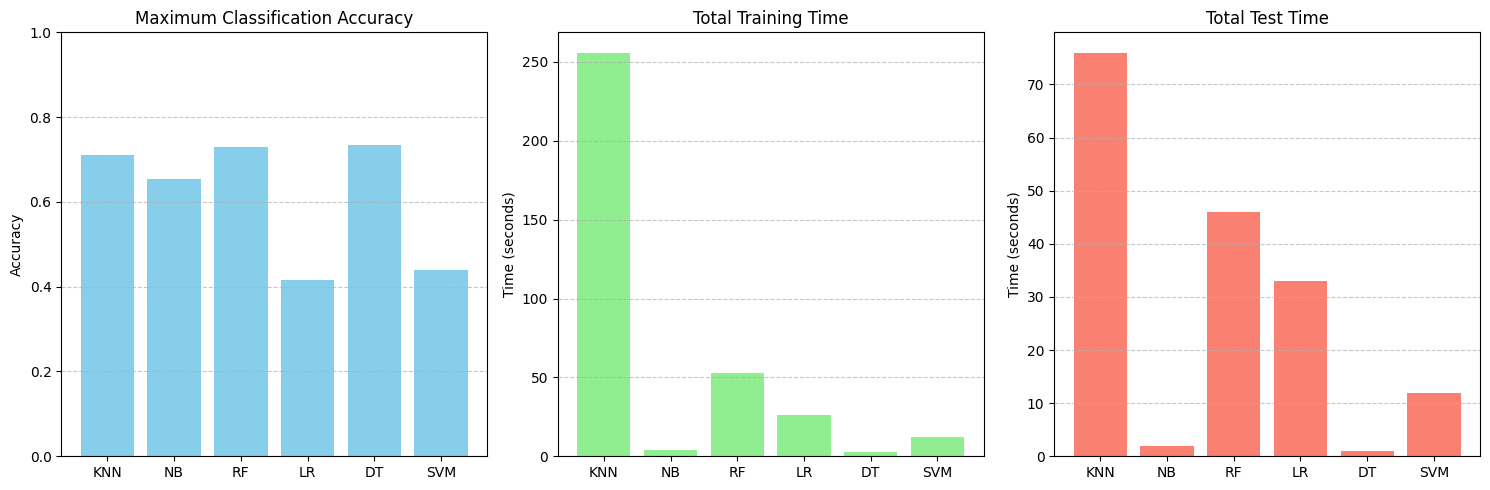

In [941]:
import matplotlib.pyplot as plt
import numpy as np

models = ['KNN', 'NB', 'RF' , 'LR' , 'DT' , 'SVM']
accuracy = [0.7116, 0.6530, 0.7294 , 0.4155 , 0.7334 , 0.4387]
training_time = [256, 4, 53 , 26 , 3 , 12]  # Training time in seconds
test_time = [76 , 2 , 46 , 33 , 1 , 12]  # Test time in seconds


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.bar(models, accuracy, color='skyblue')
ax1.set_title('Maximum Classification Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

ax2.bar(models, training_time, color='lightgreen')
ax2.set_title('Total Training Time')
ax2.set_ylabel('Time (seconds)')
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax3.bar(models, test_time, color='salmon')
ax3.set_title('Total Test Time')
ax3.set_ylabel('Time (seconds)')
ax3.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# Conclusion
## The Best Features:
## Final selected features (Lasso): ['price' , 'reviewScore' , 'steam_achievements' , 'steam_trading_cards' , 'workshop_support' , 'mac' , 'publisherClass_encoded']

## Best Classification Model:
### Decision Tree:
### Best Parameters:
* max_depth = 10
* min_samples_split = 2
* min_samples_leaf = 1
* criterion = 'gini'
* random_state =  bn≥42

## Model Final Result
### Train Accuracy: 74.08%
### Test Accuracy: 73.34%
